# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Lines** 
***

---

---

## Import Packages

In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

## Calibrate camera and undistort

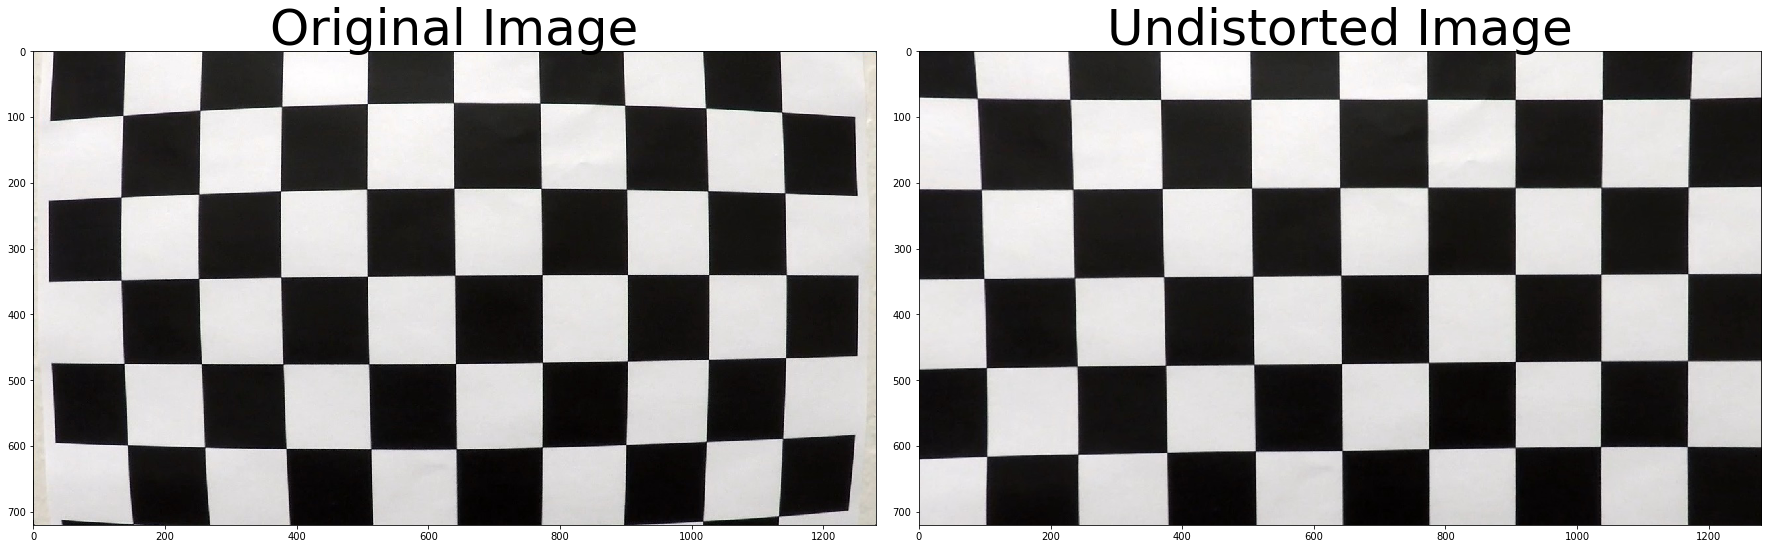

In [63]:
def calibration():

    # Read in an image
    images = glob.glob('camera_cal/calibration*.jpg')

    # prepare object points
    nx = 9
    ny = 6

    # Arrays to store object points and image points from all the images
    objpoints = [] # 3D points in real world space
    imgpoints = [] # 2D points in image plane

    # Prepare object points (for example, (3,1,0))
    objp= np.zeros((nx*ny,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    for fname in images:

        # Read in each image
        image = mpimg.imread(fname)

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # If found, draw corners
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
        
            # Draw and display the corners
            #cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
            #plt.imshow(image)
            #plt.show()

    image_test_calibration = mpimg.imread('test_images/test_image_calibration.jpg')

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, \
                                                       image_test_calibration.shape[1::-1], None, None)

    return mtx, dist, image_test_calibration

mtx, dist, image_test_calibration = calibration()

undistorted = cv2.undistort(image_test_calibration, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_test_calibration)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Distortion correction test image

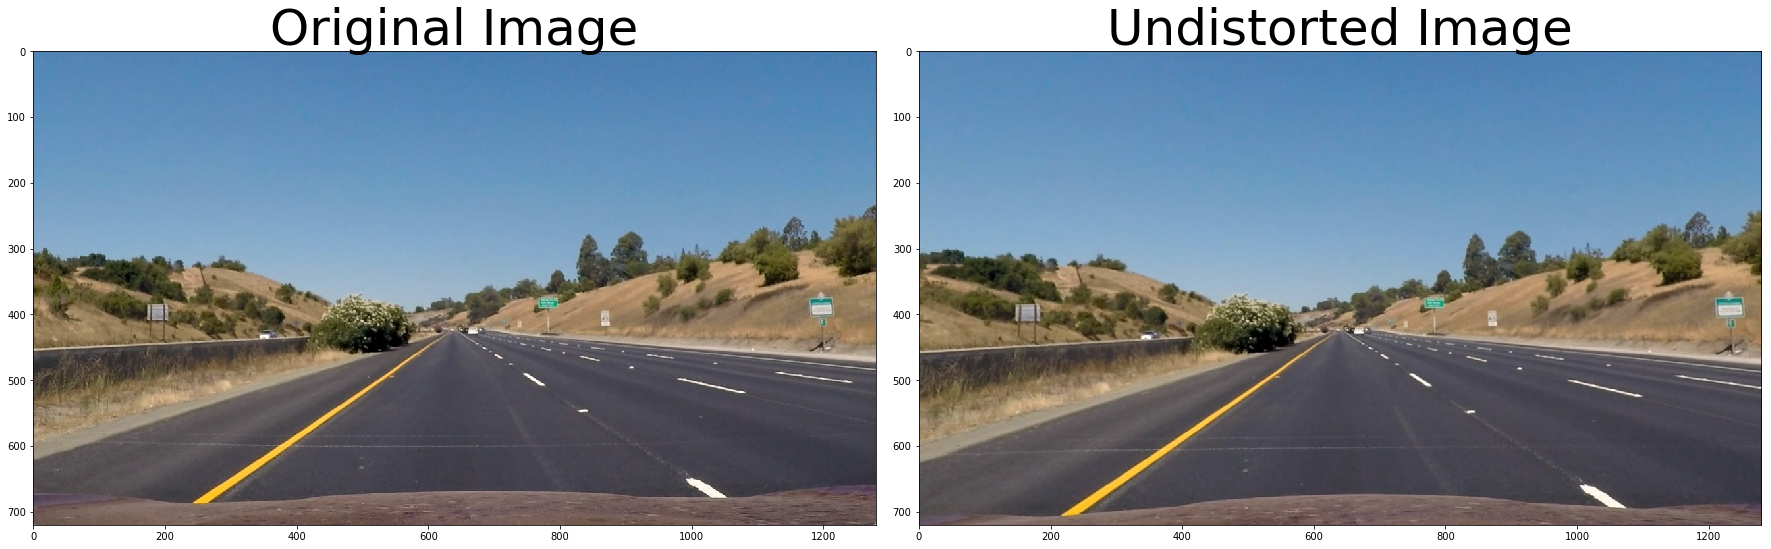

In [64]:
image_test = mpimg.imread('test_images/straight_lines1.jpg')

undistorted_test = cv2.undistort(image_test, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image_test)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted_test)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Color and gradient threshold

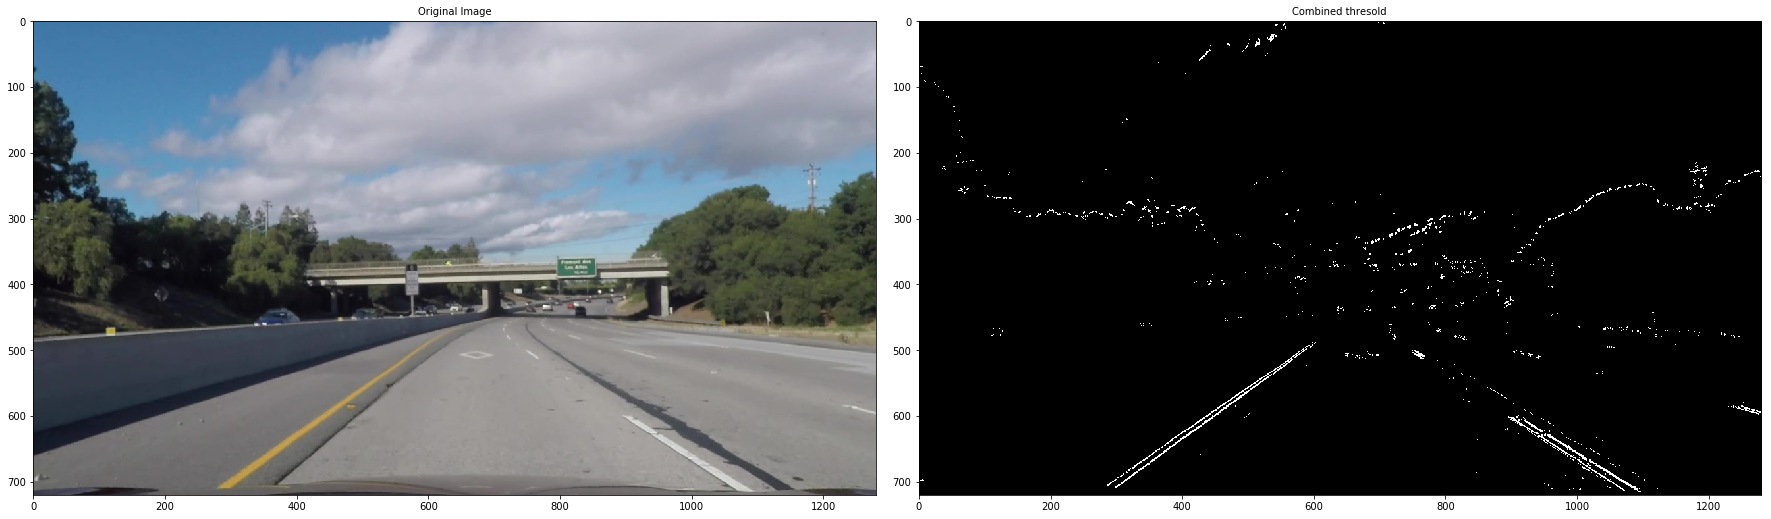

In [67]:
image = mpimg.imread('test_images/test11.jpg')

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # 5) Create a binary mask where mag thresholds are met
    sxybinary = np.zeros_like(scaled_sobel)
    sxybinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return sxybinary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Calculate gradient direction
    # Apply threshold
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_grad = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    sxybinary = np.zeros_like(dir_grad)
    sxybinary[(dir_grad > thresh[0]) & (dir_grad < thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return sxybinary

def r_threshold(img, h_thresh=(15,100)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HSV).astype(np.float)
    h_channel = hls[:,:,2]
	# Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    return h_binary

def h_threshold(img, h_thresh=(15,100)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel = hls[:,:,0]
	# Threshold color channel
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    return h_binary
	
def s_threshold(img, s_thresh=(170,255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hls[:,:,2]
	# Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    return s_binary

# Choose a Sobel kernel size
ksize = 9 # Choose a larger odd number to smooth gradient measurements

undist = cv2.undistort(image, mtx, dist, None, mtx)

# Apply each of the thresholding functions
grady = abs_sobel_thresh(undist, orient='x', sobel_kernel=ksize, thresh=(10, 90))
dir_binary = dir_threshold(undist, sobel_kernel=ksize, thresh=(0.7, 1.4))
r_binary = r_threshold(undist, h_thresh=(150,255))
h_binary = h_threshold(undist, h_thresh=(15,100))
s_binary = s_threshold(undist, s_thresh=(150,255))

combined_gradient = np.zeros_like(dir_binary)
combined_gradient[(dir_binary == 1) & (grady == 1) & (r_binary == 1)] = 1

combined_color = np.zeros_like(dir_binary)
combined_color[(h_binary == 1) & (s_binary == 1)] = 1

combined = np.zeros_like(combined_gradient)
combined[(combined_gradient == 1) | (combined_color == 1)] = 1

# Plot the result
f, (ax1, ax6) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undist)
ax1.set_title('Original Image', fontsize=10)
"""
ax2.imshow(gradx, cmap='gray')
ax2.set_title('Directional gradient X', fontsize=10)
ax3.imshow(grady, cmap='gray')
ax3.set_title('Directional gradient Y', fontsize=10)
ax4.imshow(mag_binary, cmap='gray')
ax4.set_title('Gradient magnitude', fontsize=10)
ax5.imshow(dir_binary, cmap='gray')
ax5.set_title('Thresholded Grad. Dir.', fontsize=10)
"""
ax6.imshow(combined, cmap='gray')
ax6.set_title('Combined thresold', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Perspective transform


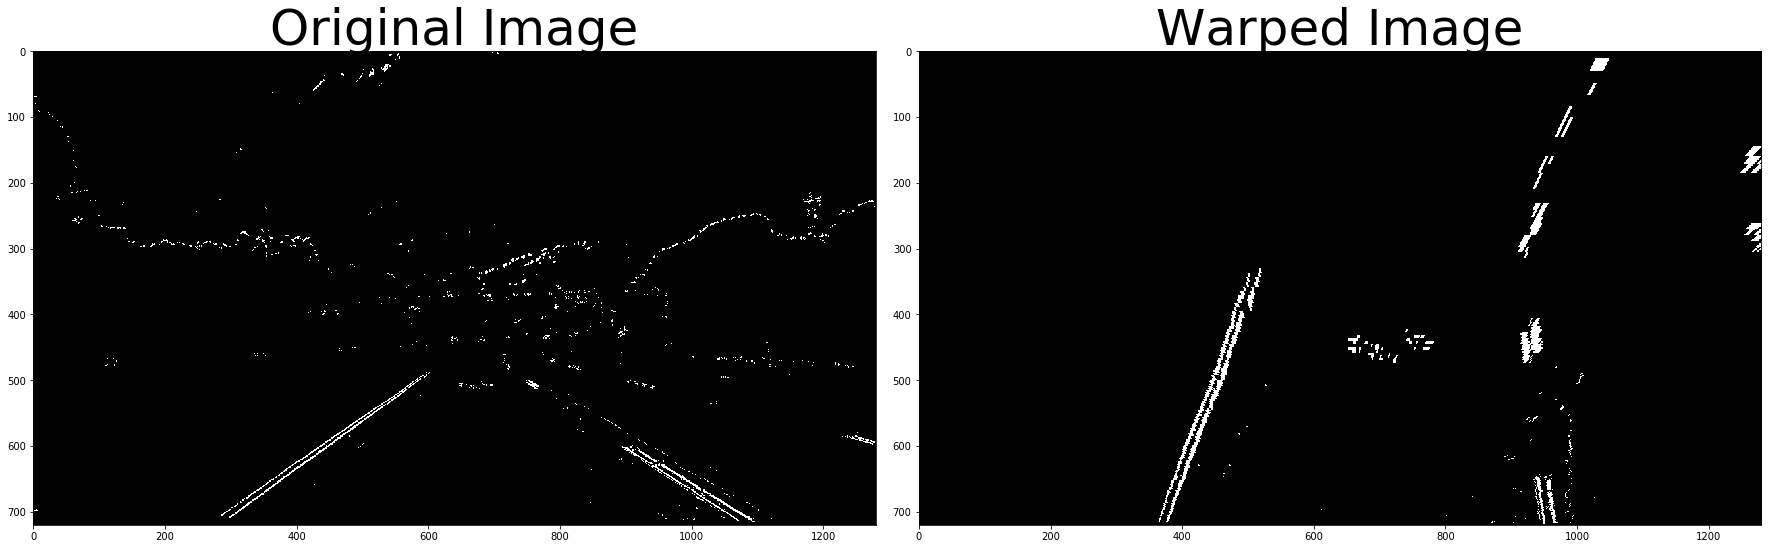

In [68]:
def warper(img, src, dst):

    # Compute and apply perpective transform
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_NEAREST)  # keep same size as input image

    return warped, Minv

src = np.float32([[206,720], [1097,720], [580,460], [700,460]])
dst = np.float32([[320,720], [960,720], [320,0], [960,0]])

binary_warped, Minv = warper(combined, src, dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(combined, cmap='gray')
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(binary_warped, cmap='gray')
ax2.set_title('Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

## Finding lines

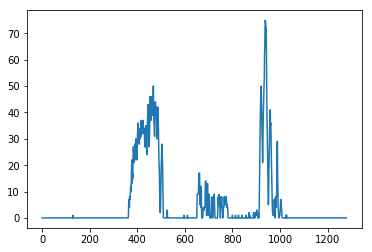

In [69]:
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.show()

## Sliding window and fit polynomial

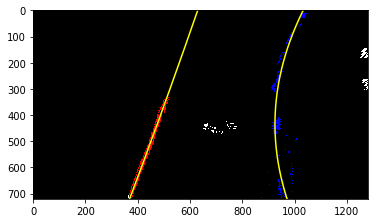

In [70]:
def slid_window_fit_poly(binary_warped, histogram):

    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Visualization

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [1, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 1]
    
    return out_img, ploty, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty

out_img, ploty, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty = \
slid_window_fit_poly(binary_warped, histogram)

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

## New binary_warped

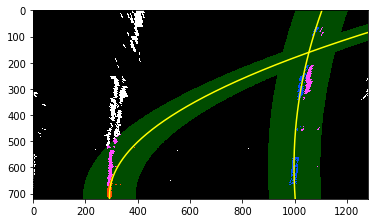

In [71]:
image = mpimg.imread('test_images/test5.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)

# Apply each of the thresholding functions
grady = abs_sobel_thresh(undist, orient='y', sobel_kernel=ksize, thresh=(20, 100))
dir_binary = dir_threshold(undist, sobel_kernel=ksize, thresh=(0.7, 1.4))
h_binary = h_threshold(undist, h_thresh=(15,100))
s_binary = s_threshold(undist, s_thresh=(170,255))

combined_gradient = np.zeros_like(dir_binary)
combined_gradient[(grady == 1) & (dir_binary == 1)] = 1

combined_color = np.zeros_like(dir_binary)
combined_color[(h_binary == 1) & (s_binary == 1)] = 1

combined = np.zeros_like(combined_gradient)
combined[(combined_gradient == 1) | (combined_color == 1)] = 1

binary_warped, Minv = warper(combined, src, dst)


def new_slid_window_fit_poly(binary_warped, left_fit, right_fit):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [1, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 1]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,1, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,1, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result, ploty, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty

result, ploty, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, righty = \
new_slid_window_fit_poly(binary_warped, left_fit, right_fit)

plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

## Measuring curvature

In [72]:
def meas_curvature(ploty, left_fit, right_fit, leftx, lefty, rightx, righty):

    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    # Example values: 1926.74 1908.48

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    dist = (right_fitx[359]+left_fitx[359]) / 2
    dist_meters = np.absolute((dist-640)*xm_per_pix)

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    
    return left_curverad, right_curverad, dist_meters

left_meas, right_meas, dist_meters = meas_curvature(ploty, left_fit, right_fit, leftx, lefty, rightx, righty)

64.8926874644 m 548.654522925 m


## View Lines

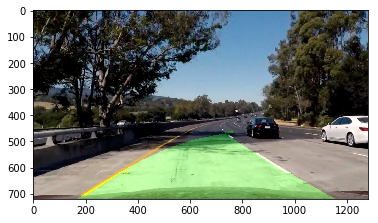

In [73]:
def view_lines(binary_warped, left_fitx, right_fitx, ploty, Minv, img, undist):

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)

    return result

result = view_lines(binary_warped, left_fitx, right_fitx, ploty, Minv, image, undist)

plt.imshow(result)
plt.show()

In [74]:
# Choose a Sobel kernel size
ksize = 9 # Choose a larger odd number to smooth gradient measurements


def pipeline(img):
        
    undist = cv2.undistort(img, pipeline.mtx, pipeline.dist, None, pipeline.mtx)

    # Apply each of the thresholding functions
    grady = abs_sobel_thresh(undist, orient='x', sobel_kernel=ksize, thresh=(10, 90))
    dir_binary = dir_threshold(undist, sobel_kernel=ksize, thresh=(0.7, 1.4))
    r_binary = r_threshold(undist, h_thresh=(150,255))
    h_binary = h_threshold(undist, h_thresh=(15,100))
    s_binary = s_threshold(undist, s_thresh=(150,255))

    combined_gradient = np.zeros_like(dir_binary)
    combined_gradient[(grady == 1) & (dir_binary == 1) & (r_binary == 1)] = 1

    combined_color = np.zeros_like(dir_binary)
    combined_color[(h_binary == 1) & (s_binary == 1)] = 1

    combined = np.zeros_like(combined_gradient)
    combined[(combined_gradient == 1) | (combined_color == 1)] = 1
    
    binary_warped, Minv = warper(combined, src, dst)
    
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    
    if pipeline.first == True:
        out_img, ploty, left_fit, right_fit, left_fitx, right_fitx, leftx, lefty, rightx, \
        righty = slid_window_fit_poly(binary_warped, histogram)
        
        pipeline.left_fit = left_fit
        pipeline.right_fit = right_fit
        pipeline.first = False
    else:
        result, ploty, pipeline.left_fit, pipeline.right_fit, left_fitx, right_fitx, leftx, lefty, rightx, \
        righty = new_slid_window_fit_poly(binary_warped, pipeline.left_fit, pipeline.right_fit)
    
    pipeline.left_curverad, pipeline.right_curverad, pipeline.dist_meters = meas_curvature\
    (ploty, pipeline.left_fit, pipeline.right_fit, leftx, lefty, rightx, righty)
    
    result = view_lines(binary_warped, left_fitx, right_fitx, ploty, Minv, img, undist)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(result, 'Radius of curvature (Left)  = %.2f m' % (pipeline.left_curverad), (10, 40), font, 1,\
                (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(result, 'Radius of curvature (Right) = %.2f m' % (pipeline.right_curverad), (10, 70), font, 1,\
                (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(result, 'Distance to center = %.2f m' % (pipeline.dist_meters), (10, 100), font, 1,\
                (255, 255, 255), 2, cv2.LINE_AA)

    return result

img = mpimg.imread('test_images/test2.jpg')

pipeline.first = True
pipeline.mtx = mtx
pipeline.dist = dist
pipeline(img)
    
        

661.575839213 m 2212.40248378 m


array([[[ 96, 145, 188],
        [ 95, 144, 187],
        [ 94, 143, 186],
        ..., 
        [ 78, 130, 180],
        [ 78, 130, 180],
        [ 78, 130, 180]],

       [[ 95, 144, 187],
        [ 94, 143, 186],
        [ 94, 143, 186],
        ..., 
        [ 78, 130, 180],
        [ 78, 130, 180],
        [ 78, 130, 180]],

       [[ 95, 144, 187],
        [ 94, 143, 186],
        [ 93, 142, 185],
        ..., 
        [ 78, 130, 179],
        [ 78, 130, 179],
        [ 78, 130, 178]],

       ..., 
       [[ 97,  83,  96],
        [ 98,  84,  97],
        [ 98,  84,  98],
        ..., 
        [122,  98,  88],
        [121,  97,  87],
        [119,  95,  85]],

       [[ 97,  84,  96],
        [ 98,  85,  97],
        [ 99,  86,  98],
        ..., 
        [121,  97,  87],
        [122,  98,  88],
        [120,  96,  86]],

       [[100,  87,  97],
        [100,  87,  97],
        [101,  88,  98],
        ..., 
        [118,  95,  85],
        [120,  96,  86],
        [119,  95,

## Video


In [79]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

project_output = 'output_videos/project_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip('project_video.mp4').subclip(15,50)
clip1 = VideoFileClip('project_video.mp4')
project_clip = clip1.fl_image(pipeline)
%time project_clip.write_videofile(project_output, audio=False)

776.406097613 m 1575.62082321 m
[MoviePy] >>>> Building video output_videos/project_video.mp4
[MoviePy] Writing video output_videos/project_video.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

730.351619266 m 1186.59339148 m


  0%|                                                                                 | 1/1261 [00:00<07:13,  2.90it/s]

658.828767091 m 1993.34551518 m


  0%|▏                                                                                | 2/1261 [00:00<07:17,  2.88it/s]

646.773759012 m 878.302939597 m


  0%|▏                                                                                | 3/1261 [00:01<07:15,  2.89it/s]

614.997741509 m 694.035562631 m


  0%|▎                                                                                | 4/1261 [00:01<07:11,  2.92it/s]

607.400862589 m 772.932677015 m


  0%|▎                                                                                | 5/1261 [00:01<07:10,  2.91it/s]

602.813409726 m 823.517077431 m


  0%|▍                                                                                | 6/1261 [00:02<07:09,  2.92it/s]

637.477148797 m 884.191897682 m


  1%|▍                                                                                | 7/1261 [00:02<07:10,  2.92it/s]

650.941783492 m 1638.15846479 m


  1%|▌                                                                                | 8/1261 [00:02<07:11,  2.90it/s]

665.673546512 m 3790.90377159 m


  1%|▌                                                                                | 9/1261 [00:03<07:13,  2.89it/s]

676.792262566 m 2240.66649483 m


  1%|▋                                                                               | 10/1261 [00:03<07:12,  2.90it/s]

712.505641521 m 1254.52574466 m


  1%|▋                                                                               | 11/1261 [00:03<07:08,  2.92it/s]

764.835987722 m 1267.05527953 m


  1%|▊                                                                               | 12/1261 [00:04<07:07,  2.92it/s]

823.302199195 m 2182.3989202 m


  1%|▊                                                                               | 13/1261 [00:04<07:12,  2.88it/s]

848.037252129 m 4583.6475984 m


  1%|▉                                                                               | 14/1261 [00:04<07:14,  2.87it/s]

866.521484303 m 931.535025092 m


  1%|▉                                                                               | 15/1261 [00:05<06:58,  2.98it/s]

901.824232727 m 820.624365534 m


  1%|█                                                                               | 16/1261 [00:05<06:43,  3.08it/s]

903.137284221 m 910.840102284 m


  1%|█                                                                               | 17/1261 [00:05<06:34,  3.16it/s]

979.447605714 m 1012.32955707 m


  1%|█▏                                                                              | 18/1261 [00:06<06:27,  3.21it/s]

1006.50203796 m 1026.0144392 m


  2%|█▏                                                                              | 19/1261 [00:06<06:29,  3.19it/s]

1135.02707807 m 1006.30533326 m


  2%|█▎                                                                              | 20/1261 [00:06<06:25,  3.22it/s]

1194.44082686 m 1094.7940252 m


  2%|█▎                                                                              | 21/1261 [00:06<06:22,  3.24it/s]

1254.32588068 m 1165.83004041 m


  2%|█▍                                                                              | 22/1261 [00:07<06:22,  3.24it/s]

1346.09033557 m 1369.20578526 m


  2%|█▍                                                                              | 23/1261 [00:07<06:19,  3.26it/s]

1200.71148136 m 1017.2202505 m


  2%|█▌                                                                              | 24/1261 [00:07<06:17,  3.28it/s]

1124.3530371 m 994.588843853 m


  2%|█▌                                                                              | 25/1261 [00:08<06:19,  3.26it/s]

1096.43932583 m 1222.3933744 m


  2%|█▋                                                                              | 26/1261 [00:08<06:19,  3.25it/s]

1032.61155427 m 868.789047221 m


  2%|█▋                                                                              | 27/1261 [00:08<06:16,  3.28it/s]

1033.94702016 m 1455.72150011 m


  2%|█▊                                                                              | 28/1261 [00:09<06:15,  3.28it/s]

923.906900679 m 948.567972592 m


  2%|█▊                                                                              | 29/1261 [00:09<06:12,  3.31it/s]

805.158047467 m 628.821818526 m


  2%|█▉                                                                              | 30/1261 [00:09<06:27,  3.18it/s]

739.682584909 m 703.671369748 m


  2%|█▉                                                                              | 31/1261 [00:10<06:40,  3.07it/s]

656.867628633 m 805.374565966 m


  3%|██                                                                              | 32/1261 [00:10<06:51,  2.98it/s]

679.173767089 m 896.679116213 m


  3%|██                                                                              | 33/1261 [00:10<06:56,  2.95it/s]

649.927896879 m 1297.31069427 m


  3%|██▏                                                                             | 34/1261 [00:11<06:42,  3.05it/s]

612.54406104 m 1184.69000606 m


  3%|██▏                                                                             | 35/1261 [00:11<06:33,  3.12it/s]

595.406453622 m 1245.91825005 m


  3%|██▎                                                                             | 36/1261 [00:11<06:25,  3.18it/s]

585.804780667 m 895.36516198 m


  3%|██▎                                                                             | 37/1261 [00:12<06:22,  3.20it/s]

545.120368713 m 998.518274675 m


  3%|██▍                                                                             | 38/1261 [00:12<06:18,  3.23it/s]

529.602979073 m 839.681680762 m


  3%|██▍                                                                             | 39/1261 [00:12<06:12,  3.28it/s]

517.764495905 m 531.400712112 m


  3%|██▌                                                                             | 40/1261 [00:12<06:10,  3.30it/s]

524.91695589 m 585.678737798 m


  3%|██▌                                                                             | 41/1261 [00:13<06:08,  3.31it/s]

510.019228358 m 595.725149493 m


  3%|██▋                                                                             | 42/1261 [00:13<06:06,  3.33it/s]

501.376515684 m 624.271423424 m


  3%|██▋                                                                             | 43/1261 [00:13<06:29,  3.13it/s]

523.626967811 m 690.128360758 m


  3%|██▊                                                                             | 44/1261 [00:14<06:28,  3.14it/s]

529.713380325 m 712.089003862 m


  4%|██▊                                                                             | 45/1261 [00:14<06:31,  3.11it/s]

545.74610416 m 1291.88300534 m


  4%|██▉                                                                             | 46/1261 [00:14<06:26,  3.15it/s]

566.967665511 m 852.697061692 m


  4%|██▉                                                                             | 47/1261 [00:15<06:24,  3.16it/s]

572.985803946 m 1235.3160121 m


  4%|███                                                                             | 48/1261 [00:15<06:23,  3.17it/s]

615.972956255 m 793.369571806 m


  4%|███                                                                             | 49/1261 [00:15<06:29,  3.11it/s]

648.477120855 m 989.526429306 m


  4%|███▏                                                                            | 50/1261 [00:16<06:34,  3.07it/s]

702.568665971 m 1047.9733987 m


  4%|███▏                                                                            | 51/1261 [00:16<06:30,  3.10it/s]

737.722906669 m 1115.81564106 m


  4%|███▎                                                                            | 52/1261 [00:16<06:29,  3.10it/s]

763.724554342 m 665.580311324 m


  4%|███▎                                                                            | 53/1261 [00:17<06:31,  3.08it/s]

859.199495466 m 643.190832688 m


  4%|███▍                                                                            | 54/1261 [00:17<06:42,  3.00it/s]

927.554433606 m 675.470621199 m


  4%|███▍                                                                            | 55/1261 [00:17<06:47,  2.96it/s]

1038.30744214 m 737.138247909 m


  4%|███▌                                                                            | 56/1261 [00:18<06:38,  3.02it/s]

1051.60707902 m 801.956871088 m


  5%|███▌                                                                            | 57/1261 [00:18<06:28,  3.10it/s]

1176.21229394 m 1084.47855212 m


  5%|███▋                                                                            | 58/1261 [00:18<06:22,  3.15it/s]

1048.42356278 m 1265.69815194 m


  5%|███▋                                                                            | 59/1261 [00:19<06:17,  3.19it/s]

1033.43752434 m 775.177835569 m


  5%|███▊                                                                            | 60/1261 [00:19<06:14,  3.21it/s]

968.954061954 m 1082.12373493 m


  5%|███▊                                                                            | 61/1261 [00:19<06:15,  3.19it/s]

895.426561678 m 1142.41240445 m


  5%|███▉                                                                            | 62/1261 [00:19<06:13,  3.21it/s]

869.085158593 m 1343.48788455 m


  5%|███▉                                                                            | 63/1261 [00:20<06:12,  3.22it/s]

858.867193359 m 612.534270662 m


  5%|████                                                                            | 64/1261 [00:20<06:08,  3.25it/s]

813.562825827 m 666.797558081 m


  5%|████                                                                            | 65/1261 [00:20<06:08,  3.25it/s]

766.21744862 m 841.1906197 m


  5%|████▏                                                                           | 66/1261 [00:21<06:06,  3.26it/s]

774.767403003 m 971.082875987 m


  5%|████▎                                                                           | 67/1261 [00:21<06:06,  3.26it/s]

734.484051417 m 1017.78329659 m


  5%|████▎                                                                           | 68/1261 [00:21<06:07,  3.25it/s]

734.812859301 m 1051.43566973 m


  5%|████▍                                                                           | 69/1261 [00:22<06:06,  3.25it/s]

752.49338656 m 1177.49038604 m


  6%|████▍                                                                           | 70/1261 [00:22<06:03,  3.27it/s]

778.506199928 m 1364.43776018 m


  6%|████▌                                                                           | 71/1261 [00:22<06:05,  3.25it/s]

937.049437163 m 1427.01728286 m


  6%|████▌                                                                           | 72/1261 [00:23<06:05,  3.25it/s]

1039.08335046 m 1363.20258872 m


  6%|████▋                                                                           | 73/1261 [00:23<06:07,  3.23it/s]

1096.31312526 m 1302.83476101 m


  6%|████▋                                                                           | 74/1261 [00:23<06:04,  3.26it/s]

1077.94408064 m 1219.87229923 m


  6%|████▊                                                                           | 75/1261 [00:23<06:04,  3.25it/s]

1304.78041234 m 2097.66304939 m


  6%|████▊                                                                           | 76/1261 [00:24<06:03,  3.26it/s]

1571.17009514 m 1040.13055914 m


  6%|████▉                                                                           | 77/1261 [00:24<06:07,  3.22it/s]

1812.8626379 m 1268.2701566 m


  6%|████▉                                                                           | 78/1261 [00:24<06:02,  3.26it/s]

2024.39635427 m 584.038279811 m


  6%|█████                                                                           | 79/1261 [00:25<06:02,  3.26it/s]

1857.82718559 m 632.797552167 m


  6%|█████                                                                           | 80/1261 [00:25<06:03,  3.25it/s]

2160.96859521 m 718.254758141 m


  6%|█████▏                                                                          | 81/1261 [00:25<06:01,  3.26it/s]

2239.16415864 m 722.119041962 m


  7%|█████▏                                                                          | 82/1261 [00:26<06:03,  3.24it/s]

1850.67643891 m 915.561289867 m


  7%|█████▎                                                                          | 83/1261 [00:26<06:02,  3.25it/s]

1621.7920839 m 1735.37243321 m


  7%|█████▎                                                                          | 84/1261 [00:26<06:00,  3.27it/s]

1260.15563116 m 2935.30479449 m


  7%|█████▍                                                                          | 85/1261 [00:27<05:57,  3.29it/s]

1182.0697446 m 1464.08135016 m


  7%|█████▍                                                                          | 86/1261 [00:27<06:00,  3.26it/s]

1061.56019134 m 1288.98382448 m


  7%|█████▌                                                                          | 87/1261 [00:27<06:01,  3.25it/s]

861.647647238 m 13638.7750247 m


  7%|█████▌                                                                          | 88/1261 [00:27<05:57,  3.28it/s]

816.586323158 m 2966.69556863 m


  7%|█████▋                                                                          | 89/1261 [00:28<06:00,  3.25it/s]

722.979401888 m 759.40751243 m


  7%|█████▋                                                                          | 90/1261 [00:28<06:03,  3.22it/s]

747.748779226 m 707.819957735 m


  7%|█████▊                                                                          | 91/1261 [00:28<06:01,  3.24it/s]

759.720256939 m 839.532098762 m


  7%|█████▊                                                                          | 92/1261 [00:29<05:57,  3.27it/s]

721.503103148 m 845.214234967 m


  7%|█████▉                                                                          | 93/1261 [00:29<05:56,  3.28it/s]

703.4292649 m 1016.36021742 m


  7%|█████▉                                                                          | 94/1261 [00:29<05:53,  3.30it/s]

705.469107407 m 1049.01609292 m


  8%|██████                                                                          | 95/1261 [00:30<05:50,  3.32it/s]

707.796442441 m 1221.85473048 m


  8%|██████                                                                          | 96/1261 [00:30<05:49,  3.33it/s]

719.763759007 m 1207.22008152 m


  8%|██████▏                                                                         | 97/1261 [00:30<05:56,  3.26it/s]

742.619587009 m 1359.1997865 m


  8%|██████▏                                                                         | 98/1261 [00:30<05:54,  3.28it/s]

726.942979933 m 915.199154822 m


  8%|██████▎                                                                         | 99/1261 [00:31<05:54,  3.28it/s]

753.576850099 m 1121.02380725 m


  8%|██████▎                                                                        | 100/1261 [00:31<05:54,  3.28it/s]

760.490219971 m 1147.61195736 m


  8%|██████▎                                                                        | 101/1261 [00:31<05:58,  3.24it/s]

791.740977482 m 967.079005972 m


  8%|██████▍                                                                        | 102/1261 [00:32<05:56,  3.25it/s]

794.504067328 m 647.15799055 m


  8%|██████▍                                                                        | 103/1261 [00:32<05:54,  3.26it/s]

824.409664423 m 673.726429691 m


  8%|██████▌                                                                        | 104/1261 [00:32<05:55,  3.25it/s]

853.822977003 m 692.739242158 m


  8%|██████▌                                                                        | 105/1261 [00:33<05:58,  3.23it/s]

939.292323935 m 794.353419351 m


  8%|██████▋                                                                        | 106/1261 [00:33<05:58,  3.23it/s]

923.722833522 m 734.44773631 m


  8%|██████▋                                                                        | 107/1261 [00:33<06:01,  3.19it/s]

820.009944979 m 891.445009737 m


  9%|██████▊                                                                        | 108/1261 [00:34<05:59,  3.21it/s]

797.598320576 m 5485.14260917 m


  9%|██████▊                                                                        | 109/1261 [00:34<05:59,  3.20it/s]

768.073885351 m 978.180848306 m


  9%|██████▉                                                                        | 110/1261 [00:34<05:55,  3.24it/s]

741.276370278 m 1955.85919635 m


  9%|██████▉                                                                        | 111/1261 [00:35<05:58,  3.20it/s]

773.077640936 m 1537.49106582 m


  9%|███████                                                                        | 112/1261 [00:35<05:53,  3.25it/s]

735.976413779 m 848.601016711 m


  9%|███████                                                                        | 113/1261 [00:35<05:56,  3.22it/s]

714.080789228 m 1298.15222008 m


  9%|███████▏                                                                       | 114/1261 [00:35<05:53,  3.24it/s]

684.472008562 m 1337.73889923 m


  9%|███████▏                                                                       | 115/1261 [00:36<05:50,  3.27it/s]

671.966122983 m 508.733509008 m


  9%|███████▎                                                                       | 116/1261 [00:36<05:47,  3.30it/s]

665.87474573 m 557.209918106 m


  9%|███████▎                                                                       | 117/1261 [00:36<05:55,  3.22it/s]

649.622052892 m 597.219200365 m


  9%|███████▍                                                                       | 118/1261 [00:37<05:50,  3.26it/s]

647.157093613 m 615.259943321 m


  9%|███████▍                                                                       | 119/1261 [00:37<05:51,  3.25it/s]

633.657559421 m 608.301184643 m


 10%|███████▌                                                                       | 120/1261 [00:37<05:52,  3.24it/s]

644.039288105 m 676.423129008 m


 10%|███████▌                                                                       | 121/1261 [00:38<05:49,  3.27it/s]

638.053149162 m 779.319878005 m


 10%|███████▋                                                                       | 122/1261 [00:38<05:51,  3.24it/s]

610.876744926 m 715.937004838 m


 10%|███████▋                                                                       | 123/1261 [00:38<05:50,  3.24it/s]

613.830263548 m 927.296793274 m


 10%|███████▊                                                                       | 124/1261 [00:39<05:50,  3.24it/s]

614.154655154 m 619.266212046 m


 10%|███████▊                                                                       | 125/1261 [00:39<05:50,  3.24it/s]

643.707906009 m 899.36061226 m


 10%|███████▉                                                                       | 126/1261 [00:39<05:49,  3.24it/s]

642.295707736 m 532.192969451 m


 10%|███████▉                                                                       | 127/1261 [00:39<05:51,  3.23it/s]

675.628225531 m 525.078460324 m


 10%|████████                                                                       | 128/1261 [00:40<05:47,  3.26it/s]

659.095429984 m 584.687346672 m


 10%|████████                                                                       | 129/1261 [00:40<05:46,  3.26it/s]

672.393439886 m 637.432390065 m


 10%|████████▏                                                                      | 130/1261 [00:40<05:52,  3.21it/s]

702.606160767 m 694.31752561 m


 10%|████████▏                                                                      | 131/1261 [00:41<05:52,  3.21it/s]

696.060886579 m 707.890718687 m


 10%|████████▎                                                                      | 132/1261 [00:41<05:52,  3.20it/s]

723.011317118 m 721.993939356 m


 11%|████████▎                                                                      | 133/1261 [00:41<05:56,  3.16it/s]

702.892144704 m 1652.11931434 m


 11%|████████▍                                                                      | 134/1261 [00:42<05:56,  3.16it/s]

723.103054782 m 815.949614259 m


 11%|████████▍                                                                      | 135/1261 [00:42<05:56,  3.15it/s]

729.117541421 m 1340.42787876 m


 11%|████████▌                                                                      | 136/1261 [00:42<05:55,  3.17it/s]

795.682170815 m 936.148104187 m


 11%|████████▌                                                                      | 137/1261 [00:43<06:02,  3.10it/s]

836.7240191 m 1390.94945741 m


 11%|████████▋                                                                      | 138/1261 [00:43<06:12,  3.01it/s]

810.539095841 m 1716.51691396 m


 11%|████████▋                                                                      | 139/1261 [00:43<06:11,  3.02it/s]

889.705328485 m 1240.77993451 m


 11%|████████▊                                                                      | 140/1261 [00:44<06:14,  3.00it/s]

919.573466286 m 818.479894415 m


 11%|████████▊                                                                      | 141/1261 [00:44<06:08,  3.04it/s]

930.061626954 m 769.70717545 m


 11%|████████▉                                                                      | 142/1261 [00:44<06:12,  3.01it/s]

860.608566922 m 874.969418235 m


 11%|████████▉                                                                      | 143/1261 [00:45<06:16,  2.97it/s]

866.255011581 m 987.604103022 m


 11%|█████████                                                                      | 144/1261 [00:45<06:04,  3.07it/s]

879.401500478 m 1022.36699215 m


 11%|█████████                                                                      | 145/1261 [00:45<05:58,  3.11it/s]

913.765576828 m 1174.05714886 m


 12%|█████████▏                                                                     | 146/1261 [00:46<05:55,  3.14it/s]

915.278003529 m 1436.92821822 m


 12%|█████████▏                                                                     | 147/1261 [00:46<06:45,  2.75it/s]

868.754877322 m 927.206386318 m


 12%|█████████▎                                                                     | 148/1261 [00:46<06:51,  2.70it/s]

920.68007898 m 2395.27192713 m


 12%|█████████▎                                                                     | 149/1261 [00:47<06:31,  2.84it/s]

977.694582317 m 2655.70079288 m


 12%|█████████▍                                                                     | 150/1261 [00:47<06:12,  2.98it/s]

981.896674034 m 1338.12866972 m


 12%|█████████▍                                                                     | 151/1261 [00:47<05:59,  3.09it/s]

1038.91240664 m 789.950992613 m


 12%|█████████▌                                                                     | 152/1261 [00:48<05:50,  3.17it/s]

1049.37167891 m 595.832525657 m


 12%|█████████▌                                                                     | 153/1261 [00:48<05:56,  3.11it/s]

1048.17143513 m 626.321481135 m


 12%|█████████▋                                                                     | 154/1261 [00:48<05:56,  3.10it/s]

996.543422724 m 661.625802368 m


 12%|█████████▋                                                                     | 155/1261 [00:49<05:53,  3.13it/s]

1007.73859175 m 732.867670672 m


 12%|█████████▊                                                                     | 156/1261 [00:49<05:41,  3.24it/s]

985.643916529 m 794.982800355 m


 12%|█████████▊                                                                     | 157/1261 [00:49<05:36,  3.28it/s]

873.13229473 m 822.662139852 m


 13%|█████████▉                                                                     | 158/1261 [00:49<05:35,  3.29it/s]

861.272545226 m 4687.32816916 m


 13%|█████████▉                                                                     | 159/1261 [00:50<05:37,  3.27it/s]

798.718668582 m 1633.16362185 m


 13%|██████████                                                                     | 160/1261 [00:50<05:38,  3.25it/s]

802.678175355 m 1518.3146961 m


 13%|██████████                                                                     | 161/1261 [00:50<05:34,  3.28it/s]

775.326517337 m 1996.38303747 m


 13%|██████████▏                                                                    | 162/1261 [00:51<05:29,  3.34it/s]

790.97736133 m 1474.00205813 m


 13%|██████████▏                                                                    | 163/1261 [00:51<05:31,  3.31it/s]

766.091632455 m 4968.18508226 m


 13%|██████████▎                                                                    | 164/1261 [00:51<05:30,  3.32it/s]

752.66759546 m 707.761929108 m


 13%|██████████▎                                                                    | 165/1261 [00:52<05:29,  3.33it/s]

750.605619118 m 769.790168749 m


 13%|██████████▍                                                                    | 166/1261 [00:52<05:26,  3.36it/s]

693.827588924 m 772.85313894 m


 13%|██████████▍                                                                    | 167/1261 [00:52<05:27,  3.34it/s]

771.474363904 m 969.746724174 m


 13%|██████████▌                                                                    | 168/1261 [00:52<05:27,  3.34it/s]

795.036531618 m 902.600675005 m


 13%|██████████▌                                                                    | 169/1261 [00:53<05:25,  3.35it/s]

851.030933942 m 970.568663463 m


 13%|██████████▋                                                                    | 170/1261 [00:53<05:22,  3.38it/s]

895.067377822 m 1130.92706918 m


 14%|██████████▋                                                                    | 171/1261 [00:53<05:27,  3.32it/s]

939.489565871 m 1206.33729914 m


 14%|██████████▊                                                                    | 172/1261 [00:54<05:29,  3.31it/s]

954.022346866 m 631.555959129 m


 14%|██████████▊                                                                    | 173/1261 [00:54<05:28,  3.32it/s]

979.243033542 m 594.736896329 m


 14%|██████████▉                                                                    | 174/1261 [00:54<05:24,  3.34it/s]

890.699118539 m 560.078935584 m


 14%|██████████▉                                                                    | 175/1261 [00:55<05:27,  3.31it/s]

921.700284125 m 321.025365127 m


 14%|███████████                                                                    | 176/1261 [00:55<05:27,  3.31it/s]

994.084435734 m 351.436493302 m


 14%|███████████                                                                    | 177/1261 [00:55<05:33,  3.25it/s]

989.00147217 m 394.46476479 m


 14%|███████████▏                                                                   | 178/1261 [00:55<05:27,  3.30it/s]

993.547312501 m 422.711211806 m


 14%|███████████▏                                                                   | 179/1261 [00:56<05:26,  3.31it/s]

943.535245305 m 424.634313632 m


 14%|███████████▎                                                                   | 180/1261 [00:56<05:28,  3.29it/s]

807.451769205 m 442.97314937 m


 14%|███████████▎                                                                   | 181/1261 [00:56<05:31,  3.26it/s]

819.138897409 m 473.737658796 m


 14%|███████████▍                                                                   | 182/1261 [00:57<05:28,  3.29it/s]

728.364900663 m 465.812725647 m


 15%|███████████▍                                                                   | 183/1261 [00:57<05:23,  3.33it/s]

653.669452398 m 580.925829026 m


 15%|███████████▌                                                                   | 184/1261 [00:57<05:23,  3.33it/s]

590.095964455 m 629.629295944 m


 15%|███████████▌                                                                   | 185/1261 [00:58<05:26,  3.29it/s]

500.683145862 m 487.223205789 m


 15%|███████████▋                                                                   | 186/1261 [00:58<05:23,  3.32it/s]

483.73269672 m 428.474863347 m


 15%|███████████▋                                                                   | 187/1261 [00:58<05:24,  3.31it/s]

470.308193742 m 504.037409543 m


 15%|███████████▊                                                                   | 188/1261 [00:59<05:20,  3.34it/s]

470.7649122 m 548.977126586 m


 15%|███████████▊                                                                   | 189/1261 [00:59<05:20,  3.35it/s]

479.695921771 m 582.565596423 m


 15%|███████████▉                                                                   | 190/1261 [00:59<05:25,  3.29it/s]

492.500442517 m 585.525932614 m


 15%|███████████▉                                                                   | 191/1261 [00:59<05:21,  3.33it/s]

522.114551086 m 642.883895894 m


 15%|████████████                                                                   | 192/1261 [01:00<05:25,  3.29it/s]

525.292311617 m 631.806843516 m


 15%|████████████                                                                   | 193/1261 [01:00<05:18,  3.35it/s]

553.253515236 m 667.266011609 m


 15%|████████████▏                                                                  | 194/1261 [01:00<05:19,  3.34it/s]

570.255011061 m 712.646930448 m


 15%|████████████▏                                                                  | 195/1261 [01:01<05:18,  3.34it/s]

651.690930198 m 1341.37177139 m


 16%|████████████▎                                                                  | 196/1261 [01:01<05:15,  3.37it/s]

706.747849978 m 1230.66740209 m


 16%|████████████▎                                                                  | 197/1261 [01:01<05:24,  3.28it/s]

775.366711316 m 1342.60961505 m


 16%|████████████▍                                                                  | 198/1261 [01:02<05:23,  3.29it/s]

776.572257021 m 1381.49529722 m


 16%|████████████▍                                                                  | 199/1261 [01:02<05:22,  3.29it/s]

814.638117515 m 1242.75181171 m


 16%|████████████▌                                                                  | 200/1261 [01:02<05:18,  3.34it/s]

835.559166216 m 1400.7409516 m


 16%|████████████▌                                                                  | 201/1261 [01:02<05:22,  3.29it/s]

842.840927805 m 2599.88083694 m


 16%|████████████▋                                                                  | 202/1261 [01:03<05:17,  3.34it/s]

853.405436801 m 975.665846057 m


 16%|████████████▋                                                                  | 203/1261 [01:03<05:14,  3.36it/s]

797.977954631 m 623.175053552 m


 16%|████████████▊                                                                  | 204/1261 [01:03<05:13,  3.38it/s]

772.230336186 m 668.461217047 m


 16%|████████████▊                                                                  | 205/1261 [01:04<05:12,  3.38it/s]

755.930657104 m 692.441309302 m


 16%|████████████▉                                                                  | 206/1261 [01:04<05:13,  3.36it/s]

707.890063608 m 683.215802015 m


 16%|████████████▉                                                                  | 207/1261 [01:04<05:15,  3.35it/s]

690.132493149 m 2059.23654466 m


 16%|█████████████                                                                  | 208/1261 [01:05<05:15,  3.34it/s]

711.463851897 m 1466.94688081 m


 17%|█████████████                                                                  | 209/1261 [01:05<05:15,  3.34it/s]

712.225802217 m 844.367756966 m


 17%|█████████████▏                                                                 | 210/1261 [01:05<05:13,  3.36it/s]

736.152497238 m 1198.01997135 m


 17%|█████████████▏                                                                 | 211/1261 [01:05<05:13,  3.35it/s]

696.477254609 m 985.356912011 m


 17%|█████████████▎                                                                 | 212/1261 [01:06<05:11,  3.37it/s]

696.185581767 m 979.768599801 m


 17%|█████████████▎                                                                 | 213/1261 [01:06<05:13,  3.35it/s]

647.109017588 m 1333.45668048 m


 17%|█████████████▍                                                                 | 214/1261 [01:06<05:11,  3.36it/s]

616.007663519 m 679.342778078 m


 17%|█████████████▍                                                                 | 215/1261 [01:07<05:13,  3.34it/s]

624.383362654 m 616.204957863 m


 17%|█████████████▌                                                                 | 216/1261 [01:07<05:12,  3.35it/s]

632.132757748 m 716.246728395 m


 17%|█████████████▌                                                                 | 217/1261 [01:07<05:15,  3.31it/s]

633.074160189 m 809.112642317 m


 17%|█████████████▋                                                                 | 218/1261 [01:07<05:12,  3.34it/s]

616.337052417 m 874.149001548 m


 17%|█████████████▋                                                                 | 219/1261 [01:08<05:17,  3.28it/s]

665.259230616 m 1019.34585872 m


 17%|█████████████▊                                                                 | 220/1261 [01:08<05:14,  3.31it/s]

690.608926661 m 5073.73425095 m


 18%|█████████████▊                                                                 | 221/1261 [01:08<05:14,  3.30it/s]

731.981525218 m 52379.1570579 m


 18%|█████████████▉                                                                 | 222/1261 [01:09<05:13,  3.32it/s]

775.46346056 m 3656.57181443 m


 18%|█████████████▉                                                                 | 223/1261 [01:09<05:11,  3.34it/s]

759.336178356 m 1596.60971905 m


 18%|██████████████                                                                 | 224/1261 [01:09<05:14,  3.30it/s]

776.602457385 m 2695.02811709 m


 18%|██████████████                                                                 | 225/1261 [01:10<05:16,  3.28it/s]

789.37106723 m 1635.93422366 m


 18%|██████████████▏                                                                | 226/1261 [01:10<05:17,  3.26it/s]

809.65706774 m 760.627605237 m


 18%|██████████████▏                                                                | 227/1261 [01:10<05:24,  3.19it/s]

851.954618959 m 677.276656616 m


 18%|██████████████▎                                                                | 228/1261 [01:11<05:31,  3.12it/s]

829.666023216 m 864.559450048 m


 18%|██████████████▎                                                                | 229/1261 [01:11<05:32,  3.11it/s]

889.221683913 m 795.887856774 m


 18%|██████████████▍                                                                | 230/1261 [01:11<05:37,  3.05it/s]

902.542311489 m 902.15548503 m


 18%|██████████████▍                                                                | 231/1261 [01:12<05:36,  3.06it/s]

983.340006613 m 931.696748532 m


 18%|██████████████▌                                                                | 232/1261 [01:12<05:37,  3.05it/s]

961.182644981 m 2018.1648244 m


 18%|██████████████▌                                                                | 233/1261 [01:12<05:36,  3.06it/s]

941.338803764 m 2983.22672168 m


 19%|██████████████▋                                                                | 234/1261 [01:13<05:39,  3.03it/s]

1046.74184862 m 1196.61879851 m


 19%|██████████████▋                                                                | 235/1261 [01:13<05:35,  3.06it/s]

963.996398173 m 1375.14970332 m


 19%|██████████████▊                                                                | 236/1261 [01:13<05:38,  3.03it/s]

903.149642914 m 1284.39788736 m


 19%|██████████████▊                                                                | 237/1261 [01:14<05:39,  3.02it/s]

907.063122123 m 1397.19496536 m


 19%|██████████████▉                                                                | 238/1261 [01:14<05:39,  3.01it/s]

917.619958262 m 488.719482673 m


 19%|██████████████▉                                                                | 239/1261 [01:14<05:40,  3.00it/s]

922.531288206 m 516.176456579 m


 19%|███████████████                                                                | 240/1261 [01:15<05:38,  3.02it/s]

878.492611894 m 565.99304829 m


 19%|███████████████                                                                | 241/1261 [01:15<05:39,  3.01it/s]

872.206502308 m 603.209446913 m


 19%|███████████████▏                                                               | 242/1261 [01:15<05:36,  3.03it/s]

790.063372657 m 634.088970134 m


 19%|███████████████▏                                                               | 243/1261 [01:16<05:36,  3.03it/s]

790.652635707 m 655.280143953 m


 19%|███████████████▎                                                               | 244/1261 [01:16<05:36,  3.02it/s]

740.31473512 m 752.212211343 m


 19%|███████████████▎                                                               | 245/1261 [01:16<05:37,  3.01it/s]

687.55142005 m 783.540561676 m


 20%|███████████████▍                                                               | 246/1261 [01:17<05:35,  3.03it/s]

707.828618585 m 797.669849066 m


 20%|███████████████▍                                                               | 247/1261 [01:17<05:34,  3.03it/s]

684.427524883 m 539.740385952 m


 20%|███████████████▌                                                               | 248/1261 [01:17<05:32,  3.04it/s]

727.035727598 m 710.017395567 m


 20%|███████████████▌                                                               | 249/1261 [01:18<05:31,  3.05it/s]

753.262808349 m 500.910329207 m


 20%|███████████████▋                                                               | 250/1261 [01:18<05:34,  3.02it/s]

809.973564155 m 552.909974294 m


 20%|███████████████▋                                                               | 251/1261 [01:18<05:38,  2.98it/s]

814.129598728 m 643.326613187 m


 20%|███████████████▊                                                               | 252/1261 [01:19<05:40,  2.96it/s]

791.999880458 m 695.10106077 m


 20%|███████████████▊                                                               | 253/1261 [01:19<05:37,  2.99it/s]

883.10256388 m 704.717526346 m


 20%|███████████████▉                                                               | 254/1261 [01:19<05:35,  3.00it/s]

859.723265479 m 747.046603029 m


 20%|███████████████▉                                                               | 255/1261 [01:20<05:34,  3.00it/s]

823.136867755 m 741.506840064 m


 20%|████████████████                                                               | 256/1261 [01:20<05:34,  3.00it/s]

820.673705379 m 1611.78377954 m


 20%|████████████████                                                               | 257/1261 [01:20<05:36,  2.98it/s]

805.972279097 m 948.418737383 m


 20%|████████████████▏                                                              | 258/1261 [01:21<05:35,  2.99it/s]

771.784220245 m 724.815744412 m


 21%|████████████████▏                                                              | 259/1261 [01:21<05:35,  2.99it/s]

825.389749493 m 1080.22354515 m


 21%|████████████████▎                                                              | 260/1261 [01:21<05:32,  3.01it/s]

855.480644584 m 1977.31670681 m


 21%|████████████████▎                                                              | 261/1261 [01:22<05:33,  3.00it/s]

939.580212705 m 557.624933699 m


 21%|████████████████▍                                                              | 262/1261 [01:22<05:35,  2.98it/s]

932.459568249 m 507.165362838 m


 21%|████████████████▍                                                              | 263/1261 [01:22<05:37,  2.95it/s]

919.981158801 m 545.11349541 m


 21%|████████████████▌                                                              | 264/1261 [01:23<05:37,  2.96it/s]

910.285387507 m 602.136939782 m


 21%|████████████████▌                                                              | 265/1261 [01:23<05:33,  2.98it/s]

904.289318364 m 685.043507283 m


 21%|████████████████▋                                                              | 266/1261 [01:23<05:35,  2.97it/s]

841.043648387 m 730.556406759 m


 21%|████████████████▋                                                              | 267/1261 [01:24<05:37,  2.94it/s]

878.44374012 m 758.693979644 m


 21%|████████████████▊                                                              | 268/1261 [01:24<05:36,  2.95it/s]

860.179399236 m 806.616571964 m


 21%|████████████████▊                                                              | 269/1261 [01:24<05:31,  2.99it/s]

907.599818976 m 4409.384363 m


 21%|████████████████▉                                                              | 270/1261 [01:25<05:29,  3.01it/s]

854.081470893 m 1044.74438909 m


 21%|████████████████▉                                                              | 271/1261 [01:25<05:28,  3.01it/s]

834.360806104 m 1002.6342215 m


 22%|█████████████████                                                              | 272/1261 [01:25<05:30,  2.99it/s]

838.637472012 m 1133.55435391 m


 22%|█████████████████                                                              | 273/1261 [01:26<05:21,  3.07it/s]

868.955067172 m 609.992999742 m


 22%|█████████████████▏                                                             | 274/1261 [01:26<05:22,  3.06it/s]

893.449064812 m 684.71615641 m


 22%|█████████████████▏                                                             | 275/1261 [01:26<05:21,  3.06it/s]

915.183651562 m 717.199995372 m


 22%|█████████████████▎                                                             | 276/1261 [01:27<05:22,  3.05it/s]

886.071084366 m 869.281506121 m


 22%|█████████████████▎                                                             | 277/1261 [01:27<05:18,  3.09it/s]

963.363424372 m 857.933899158 m


 22%|█████████████████▍                                                             | 278/1261 [01:27<05:20,  3.07it/s]

981.258592969 m 969.829360066 m


 22%|█████████████████▍                                                             | 279/1261 [01:28<05:23,  3.04it/s]

1106.09703329 m 1019.56393017 m


 22%|█████████████████▌                                                             | 280/1261 [01:28<05:17,  3.09it/s]

1061.1956948 m 9060.62221664 m


 22%|█████████████████▌                                                             | 281/1261 [01:28<05:11,  3.15it/s]

1071.45653842 m 5186.56112589 m


 22%|█████████████████▋                                                             | 282/1261 [01:28<05:07,  3.19it/s]

1201.04147643 m 5335.40000651 m


 22%|█████████████████▋                                                             | 283/1261 [01:29<05:07,  3.18it/s]

1202.90140497 m 3186.8290223 m


 23%|█████████████████▊                                                             | 284/1261 [01:29<05:05,  3.20it/s]

1379.81739637 m 5895.73078636 m


 23%|█████████████████▊                                                             | 285/1261 [01:29<05:01,  3.24it/s]

1460.13984057 m 25847.8111193 m


 23%|█████████████████▉                                                             | 286/1261 [01:30<05:03,  3.22it/s]

1431.14762774 m 1558.82602031 m


 23%|█████████████████▉                                                             | 287/1261 [01:30<04:59,  3.25it/s]

1606.08601241 m 950.966840689 m


 23%|██████████████████                                                             | 288/1261 [01:30<05:00,  3.24it/s]

1395.41887011 m 927.082529889 m


 23%|██████████████████                                                             | 289/1261 [01:31<04:53,  3.31it/s]

1498.35538464 m 1142.10554911 m


 23%|██████████████████▏                                                            | 290/1261 [01:31<04:52,  3.32it/s]

1388.38758259 m 1133.39218202 m


 23%|██████████████████▏                                                            | 291/1261 [01:31<04:52,  3.32it/s]

1494.6413251 m 1194.81874784 m


 23%|██████████████████▎                                                            | 292/1261 [01:31<04:53,  3.30it/s]

1581.02353372 m 10501.845 m


 23%|██████████████████▎                                                            | 293/1261 [01:32<04:52,  3.31it/s]

1499.3215521 m 3764.31518925 m


 23%|██████████████████▍                                                            | 294/1261 [01:32<04:54,  3.28it/s]

1597.59745954 m 40528.3806941 m


 23%|██████████████████▍                                                            | 295/1261 [01:32<04:53,  3.29it/s]

1550.79637104 m 3688.15391994 m


 23%|██████████████████▌                                                            | 296/1261 [01:33<04:54,  3.27it/s]

1643.49579547 m 2186.59699504 m


 24%|██████████████████▌                                                            | 297/1261 [01:33<04:53,  3.29it/s]

1712.44804192 m 944.018131988 m


 24%|██████████████████▋                                                            | 298/1261 [01:33<04:50,  3.31it/s]

1880.82739359 m 907.207905646 m


 24%|██████████████████▋                                                            | 299/1261 [01:34<04:50,  3.31it/s]

2112.77034326 m 884.433155815 m


 24%|██████████████████▊                                                            | 300/1261 [01:34<04:54,  3.27it/s]

1848.41157185 m 1080.32604747 m


 24%|██████████████████▊                                                            | 301/1261 [01:34<04:52,  3.28it/s]

1977.58902969 m 1186.10341742 m


 24%|██████████████████▉                                                            | 302/1261 [01:35<04:55,  3.25it/s]

1903.69851461 m 1248.02960197 m


 24%|██████████████████▉                                                            | 303/1261 [01:35<04:50,  3.29it/s]

2318.71755477 m 1465.53002805 m


 24%|███████████████████                                                            | 304/1261 [01:35<04:52,  3.28it/s]

2545.15798412 m 1925.68540481 m


 24%|███████████████████                                                            | 305/1261 [01:35<04:48,  3.31it/s]

2341.91755262 m 1918.32775428 m


 24%|███████████████████▏                                                           | 306/1261 [01:36<04:49,  3.30it/s]

2431.57875004 m 3040.67039221 m


 24%|███████████████████▏                                                           | 307/1261 [01:36<04:48,  3.31it/s]

2909.59876831 m 13855.0375053 m


 24%|███████████████████▎                                                           | 308/1261 [01:36<04:47,  3.32it/s]

3175.50439704 m 8692.01190729 m


 25%|███████████████████▎                                                           | 309/1261 [01:37<04:47,  3.31it/s]

3477.17118031 m 3188.658322 m


 25%|███████████████████▍                                                           | 310/1261 [01:37<04:48,  3.29it/s]

4467.53526756 m 3321.30410206 m


 25%|███████████████████▍                                                           | 311/1261 [01:37<04:45,  3.33it/s]

8065.66482928 m 5404.21320769 m


 25%|███████████████████▌                                                           | 312/1261 [01:38<04:46,  3.32it/s]

9869.24454773 m 15302.1176293 m


 25%|███████████████████▌                                                           | 313/1261 [01:38<04:46,  3.31it/s]

14674.4218542 m 8500.41569098 m


 25%|███████████████████▋                                                           | 314/1261 [01:38<04:46,  3.30it/s]

12355.4510769 m 7725.68928435 m


 25%|███████████████████▋                                                           | 315/1261 [01:38<04:52,  3.23it/s]

12144.2384165 m 931303.910377 m


 25%|███████████████████▊                                                           | 316/1261 [01:39<04:53,  3.22it/s]

12240.2035631 m 2055.92675514 m


 25%|███████████████████▊                                                           | 317/1261 [01:39<04:51,  3.24it/s]

12132.8574262 m 2226.04397722 m


 25%|███████████████████▉                                                           | 318/1261 [01:39<04:51,  3.24it/s]

16612.5345093 m 1958.09054985 m


 25%|███████████████████▉                                                           | 319/1261 [01:40<04:49,  3.25it/s]

24800.7563043 m 2531.91323442 m


 25%|████████████████████                                                           | 320/1261 [01:40<04:46,  3.28it/s]

34054.4016577 m 1100.37986506 m


 25%|████████████████████                                                           | 321/1261 [01:40<04:47,  3.27it/s]

13555.0491432 m 944.976337999 m


 26%|████████████████████▏                                                          | 322/1261 [01:41<04:45,  3.28it/s]

6587.60974527 m 1208.66483004 m


 26%|████████████████████▏                                                          | 323/1261 [01:41<04:50,  3.23it/s]

7570.55970434 m 1299.72662842 m


 26%|████████████████████▎                                                          | 324/1261 [01:41<04:48,  3.24it/s]

7843.90070628 m 1672.4999567 m


 26%|████████████████████▎                                                          | 325/1261 [01:42<04:46,  3.26it/s]

6520.17804405 m 1712.93973134 m


 26%|████████████████████▍                                                          | 326/1261 [01:42<04:46,  3.26it/s]

7536.9570003 m 2184.79901145 m


 26%|████████████████████▍                                                          | 327/1261 [01:42<04:45,  3.27it/s]

7675.05303069 m 2224.32103882 m


 26%|████████████████████▌                                                          | 328/1261 [01:42<04:42,  3.30it/s]

9905.1027806 m 7416.13790022 m


 26%|████████████████████▌                                                          | 329/1261 [01:43<04:47,  3.24it/s]

11960.2396187 m 3013.66521107 m


 26%|████████████████████▋                                                          | 330/1261 [01:43<04:45,  3.26it/s]

22780.234754 m 5463.48063459 m


 26%|████████████████████▋                                                          | 331/1261 [01:43<04:42,  3.29it/s]

11641.7249837 m 2538.52100895 m


 26%|████████████████████▊                                                          | 332/1261 [01:44<04:41,  3.30it/s]

28232.8811692 m 3229.48917393 m


 26%|████████████████████▊                                                          | 333/1261 [01:44<04:43,  3.27it/s]

18748.8147838 m 1992.27037018 m


 26%|████████████████████▉                                                          | 334/1261 [01:44<04:41,  3.29it/s]

37094.0650897 m 2546.24882511 m


 27%|████████████████████▉                                                          | 335/1261 [01:45<04:42,  3.27it/s]

27809.4008148 m 3522.65173037 m


 27%|█████████████████████                                                          | 336/1261 [01:45<04:41,  3.29it/s]

54495.2251581 m 3138.55254508 m


 27%|█████████████████████                                                          | 337/1261 [01:45<04:45,  3.24it/s]

15867.7890242 m 6170.611352 m


 27%|█████████████████████▏                                                         | 338/1261 [01:46<04:47,  3.21it/s]

16907.944169 m 23707.2530366 m


 27%|█████████████████████▏                                                         | 339/1261 [01:46<04:46,  3.22it/s]

22568.8533717 m 28515.023598 m


 27%|█████████████████████▎                                                         | 340/1261 [01:46<04:44,  3.24it/s]

15841.3696377 m 11587.5811562 m


 27%|█████████████████████▎                                                         | 341/1261 [01:46<04:44,  3.23it/s]

9059.35736665 m 2760.21411551 m


 27%|█████████████████████▍                                                         | 342/1261 [01:47<04:43,  3.24it/s]

6560.0776573 m 1961.23712833 m


 27%|█████████████████████▍                                                         | 343/1261 [01:47<04:43,  3.24it/s]

4944.58632864 m 3446.00781082 m


 27%|█████████████████████▌                                                         | 344/1261 [01:47<04:41,  3.26it/s]

5614.09977969 m 16441.000325 m


 27%|█████████████████████▌                                                         | 345/1261 [01:48<04:42,  3.25it/s]

4696.06820122 m 5107.19091703 m


 27%|█████████████████████▋                                                         | 346/1261 [01:48<04:40,  3.26it/s]

4994.07164163 m 3028.8036003 m


 28%|█████████████████████▋                                                         | 347/1261 [01:48<04:45,  3.20it/s]

4843.88465828 m 2671.64108106 m


 28%|█████████████████████▊                                                         | 348/1261 [01:49<04:44,  3.21it/s]

5352.99893815 m 5309.739565 m


 28%|█████████████████████▊                                                         | 349/1261 [01:49<04:41,  3.24it/s]

5798.35829889 m 5123.74576081 m


 28%|█████████████████████▉                                                         | 350/1261 [01:49<04:42,  3.23it/s]

162388.094768 m 11427.117052 m


 28%|█████████████████████▉                                                         | 351/1261 [01:50<04:41,  3.24it/s]

15826.712719 m 38485.4556986 m


 28%|██████████████████████                                                         | 352/1261 [01:50<04:44,  3.20it/s]

7374.57905778 m 15790.0480283 m


 28%|██████████████████████                                                         | 353/1261 [01:50<04:41,  3.22it/s]

3531.59067601 m 3982.06818841 m


 28%|██████████████████████▏                                                        | 354/1261 [01:50<04:37,  3.27it/s]

2810.14156349 m 9354.68356944 m


 28%|██████████████████████▏                                                        | 355/1261 [01:51<04:41,  3.22it/s]

2370.70029597 m 8305.61595306 m


 28%|██████████████████████▎                                                        | 356/1261 [01:51<04:43,  3.20it/s]

2380.97558873 m 6665.28376516 m


 28%|██████████████████████▎                                                        | 357/1261 [01:51<04:41,  3.21it/s]

2716.59274057 m 64066.211544 m


 28%|██████████████████████▍                                                        | 358/1261 [01:52<04:41,  3.21it/s]

5645.71530435 m 1497.63781741 m


 28%|██████████████████████▍                                                        | 359/1261 [01:52<04:42,  3.20it/s]

9419.62828981 m 1797.13141235 m


 29%|██████████████████████▌                                                        | 360/1261 [01:52<04:41,  3.20it/s]

28135.4619066 m 2522.34916581 m


 29%|██████████████████████▌                                                        | 361/1261 [01:53<04:42,  3.19it/s]

4740.866444 m 3267.25659484 m


 29%|██████████████████████▋                                                        | 362/1261 [01:53<04:40,  3.20it/s]

3279.00184779 m 3630.17711073 m


 29%|██████████████████████▋                                                        | 363/1261 [01:53<04:38,  3.22it/s]

2063.24659777 m 4684.70997249 m


 29%|██████████████████████▊                                                        | 364/1261 [01:54<04:38,  3.22it/s]

1753.80142792 m 3513.94556154 m


 29%|██████████████████████▊                                                        | 365/1261 [01:54<04:36,  3.24it/s]

1520.30722994 m 3664.42021676 m


 29%|██████████████████████▉                                                        | 366/1261 [01:54<04:36,  3.24it/s]

1311.23951508 m 25728.7316725 m


 29%|██████████████████████▉                                                        | 367/1261 [01:55<04:36,  3.23it/s]

1174.63747434 m 12457.2457948 m


 29%|███████████████████████                                                        | 368/1261 [01:55<04:34,  3.25it/s]

1174.86163579 m 2918.8732137 m


 29%|███████████████████████                                                        | 369/1261 [01:55<04:36,  3.23it/s]

1178.17236243 m 1857.89057072 m


 29%|███████████████████████▏                                                       | 370/1261 [01:55<04:34,  3.25it/s]

1140.3093756 m 3738.59748686 m


 29%|███████████████████████▏                                                       | 371/1261 [01:56<04:33,  3.25it/s]

1142.63067533 m 3612.94363053 m


 30%|███████████████████████▎                                                       | 372/1261 [01:56<04:38,  3.19it/s]

1373.45151249 m 4309.4754429 m


 30%|███████████████████████▎                                                       | 373/1261 [01:56<04:38,  3.19it/s]

1547.12421048 m 10858.0432403 m


 30%|███████████████████████▍                                                       | 374/1261 [01:57<04:37,  3.20it/s]

2221.41598062 m 72768.6542614 m


 30%|███████████████████████▍                                                       | 375/1261 [01:57<04:38,  3.18it/s]

5342.74837857 m 12840.7022862 m


 30%|███████████████████████▌                                                       | 376/1261 [01:57<04:40,  3.16it/s]

13580.0891893 m 1556.6137344 m


 30%|███████████████████████▌                                                       | 377/1261 [01:58<04:38,  3.17it/s]

17540.8871544 m 4799.48722034 m


 30%|███████████████████████▋                                                       | 378/1261 [01:58<04:41,  3.13it/s]

7990.15638765 m 2746.58866059 m


 30%|███████████████████████▋                                                       | 379/1261 [01:58<04:39,  3.16it/s]

6081.53144158 m 9075.43688506 m


 30%|███████████████████████▊                                                       | 380/1261 [01:59<04:34,  3.21it/s]

5933.01668989 m 27634.2613759 m


 30%|███████████████████████▊                                                       | 381/1261 [01:59<04:35,  3.20it/s]

5245.67369425 m 14556.7598261 m


 30%|███████████████████████▉                                                       | 382/1261 [01:59<04:35,  3.19it/s]

4576.78914895 m 14086.1385252 m


 30%|███████████████████████▉                                                       | 383/1261 [02:00<04:37,  3.16it/s]

4888.83810755 m 7277.70692939 m


 30%|████████████████████████                                                       | 384/1261 [02:00<04:35,  3.18it/s]

7507.14289599 m 8029.3945937 m


 31%|████████████████████████                                                       | 385/1261 [02:00<04:33,  3.20it/s]

10443.2319582 m 17907.0957514 m


 31%|████████████████████████▏                                                      | 386/1261 [02:00<04:32,  3.22it/s]

6751.97584172 m 26871.4556736 m


 31%|████████████████████████▏                                                      | 387/1261 [02:01<04:32,  3.21it/s]

6809.80507141 m 18322.640864 m


 31%|████████████████████████▎                                                      | 388/1261 [02:01<04:33,  3.19it/s]

10054.0236505 m 7642.41183355 m


 31%|████████████████████████▎                                                      | 389/1261 [02:01<04:33,  3.19it/s]

26193.7911959 m 2602.71798056 m


 31%|████████████████████████▍                                                      | 390/1261 [02:02<04:33,  3.18it/s]

11918.9686901 m 7141.41474565 m


 31%|████████████████████████▍                                                      | 391/1261 [02:02<04:34,  3.17it/s]

9287.52884998 m 3991.33347586 m


 31%|████████████████████████▌                                                      | 392/1261 [02:02<04:34,  3.16it/s]

10052.0794056 m 5745.03563089 m


 31%|████████████████████████▌                                                      | 393/1261 [02:03<04:36,  3.14it/s]

36823.5419922 m 1687.60459365 m


 31%|████████████████████████▋                                                      | 394/1261 [02:03<04:33,  3.17it/s]

8665.12610292 m 4231.21183968 m


 31%|████████████████████████▋                                                      | 395/1261 [02:03<04:32,  3.18it/s]

9237.72820637 m 3832.83385364 m


 31%|████████████████████████▊                                                      | 396/1261 [02:04<04:33,  3.16it/s]

5094.66225964 m 11415.484103 m


 31%|████████████████████████▊                                                      | 397/1261 [02:04<04:31,  3.18it/s]

4286.68598757 m 11392.5708771 m


 32%|████████████████████████▉                                                      | 398/1261 [02:04<04:29,  3.20it/s]

4048.20433923 m 27235.0018314 m


 32%|████████████████████████▉                                                      | 399/1261 [02:05<04:29,  3.20it/s]

3550.76088032 m 15196.8247256 m


 32%|█████████████████████████                                                      | 400/1261 [02:05<04:27,  3.22it/s]

3319.37413799 m 7743.19039345 m


 32%|█████████████████████████                                                      | 401/1261 [02:05<04:26,  3.22it/s]

3572.57712601 m 2512.52960129 m


 32%|█████████████████████████▏                                                     | 402/1261 [02:06<04:27,  3.21it/s]

5770.77514874 m 2053.27172931 m


 32%|█████████████████████████▏                                                     | 403/1261 [02:06<04:27,  3.20it/s]

6583.33887151 m 4021.62258781 m


 32%|█████████████████████████▎                                                     | 404/1261 [02:06<04:27,  3.21it/s]

14899.4005765 m 2107.13943201 m


 32%|█████████████████████████▎                                                     | 405/1261 [02:06<04:28,  3.19it/s]

49258.3756981 m 5737.97912522 m


 32%|█████████████████████████▍                                                     | 406/1261 [02:07<04:26,  3.21it/s]

221244.852365 m 2894.57581306 m


 32%|█████████████████████████▍                                                     | 407/1261 [02:07<04:28,  3.18it/s]

8898.32583205 m 21101.031567 m


 32%|█████████████████████████▌                                                     | 408/1261 [02:07<04:27,  3.19it/s]

9922.17778444 m 1748.48995432 m


 32%|█████████████████████████▌                                                     | 409/1261 [02:08<04:28,  3.17it/s]

5246.64146631 m 10367.6873387 m


 33%|█████████████████████████▋                                                     | 410/1261 [02:08<04:27,  3.19it/s]

5528.25093468 m 10246.2419854 m


 33%|█████████████████████████▋                                                     | 411/1261 [02:08<04:28,  3.17it/s]

7156.33985411 m 13039.9836488 m


 33%|█████████████████████████▊                                                     | 412/1261 [02:09<04:29,  3.15it/s]

10911.1649377 m 8535.16251174 m


 33%|█████████████████████████▊                                                     | 413/1261 [02:09<04:27,  3.17it/s]

172510.940224 m 4465.01179629 m


 33%|█████████████████████████▉                                                     | 414/1261 [02:09<04:27,  3.17it/s]

16957.7451902 m 3818.12605473 m


 33%|█████████████████████████▉                                                     | 415/1261 [02:10<04:26,  3.18it/s]

12666.935401 m 35383.929908 m


 33%|██████████████████████████                                                     | 416/1261 [02:10<04:25,  3.18it/s]

6491.63854102 m 22105.259942 m


 33%|██████████████████████████                                                     | 417/1261 [02:10<04:27,  3.16it/s]

6180.08633888 m 4929.24276021 m


 33%|██████████████████████████▏                                                    | 418/1261 [02:11<04:29,  3.13it/s]

6255.20351038 m 4034.16828532 m


 33%|██████████████████████████▏                                                    | 419/1261 [02:11<04:28,  3.14it/s]

4438.3009315 m 2420.5435558 m


 33%|██████████████████████████▎                                                    | 420/1261 [02:11<04:26,  3.16it/s]

6184.91844083 m 4374.49557699 m


 33%|██████████████████████████▍                                                    | 421/1261 [02:12<04:26,  3.15it/s]

4675.95028006 m 11546.8981673 m


 33%|██████████████████████████▍                                                    | 422/1261 [02:12<04:26,  3.15it/s]

4358.16463722 m 23248.5813323 m


 34%|██████████████████████████▌                                                    | 423/1261 [02:12<04:25,  3.15it/s]

4789.61178019 m 52978.7906253 m


 34%|██████████████████████████▌                                                    | 424/1261 [02:12<04:25,  3.16it/s]

4270.40294196 m 4974.4310999 m


 34%|██████████████████████████▋                                                    | 425/1261 [02:13<04:28,  3.12it/s]

6295.94932579 m 7497.73942113 m


 34%|██████████████████████████▋                                                    | 426/1261 [02:13<04:27,  3.13it/s]

5770.15415115 m 3627.65157254 m


 34%|██████████████████████████▊                                                    | 427/1261 [02:13<04:25,  3.14it/s]

6658.28379758 m 7277.55255996 m


 34%|██████████████████████████▊                                                    | 428/1261 [02:14<04:25,  3.14it/s]

9316.45046616 m 5910.4262025 m


 34%|██████████████████████████▉                                                    | 429/1261 [02:14<04:23,  3.15it/s]

12129.675069 m 5560.04932835 m


 34%|██████████████████████████▉                                                    | 430/1261 [02:14<04:22,  3.17it/s]

8903.71138528 m 3355.87467299 m


 34%|███████████████████████████                                                    | 431/1261 [02:15<04:21,  3.18it/s]

17860.6862075 m 3982.28234276 m


 34%|███████████████████████████                                                    | 432/1261 [02:15<04:20,  3.18it/s]

32768.5336771 m 2331.01203929 m


 34%|███████████████████████████▏                                                   | 433/1261 [02:15<04:21,  3.17it/s]

74354.6269558 m 4168.37990636 m


 34%|███████████████████████████▏                                                   | 434/1261 [02:16<04:18,  3.20it/s]

29708.3423232 m 4324.98853931 m


 34%|███████████████████████████▎                                                   | 435/1261 [02:16<04:18,  3.19it/s]

12068.9997604 m 6395.8901876 m


 35%|███████████████████████████▎                                                   | 436/1261 [02:16<04:19,  3.18it/s]

5935.90274356 m 1779840.9394 m


 35%|███████████████████████████▍                                                   | 437/1261 [02:17<04:20,  3.17it/s]

5841.64237606 m 4611.43800284 m


 35%|███████████████████████████▍                                                   | 438/1261 [02:17<04:20,  3.17it/s]

4530.01069922 m 4611.43390742 m


 35%|███████████████████████████▌                                                   | 439/1261 [02:17<04:19,  3.16it/s]

3423.30061965 m 12343.7744009 m


 35%|███████████████████████████▌                                                   | 440/1261 [02:18<04:17,  3.19it/s]

3076.50657172 m 5624.10808794 m


 35%|███████████████████████████▋                                                   | 441/1261 [02:18<04:26,  3.08it/s]

3009.16428632 m 15594.8713645 m


 35%|███████████████████████████▋                                                   | 442/1261 [02:18<04:23,  3.11it/s]

3192.37643752 m 72492.9467564 m


 35%|███████████████████████████▊                                                   | 443/1261 [02:18<04:21,  3.13it/s]

3266.84721625 m 3596.64545253 m


 35%|███████████████████████████▊                                                   | 444/1261 [02:19<04:20,  3.14it/s]

2963.26533718 m 2885.72064652 m


 35%|███████████████████████████▉                                                   | 445/1261 [02:19<04:19,  3.15it/s]

3062.27192518 m 3493.62435457 m


 35%|███████████████████████████▉                                                   | 446/1261 [02:19<04:15,  3.19it/s]

2896.12043564 m 3883.18891647 m


 35%|████████████████████████████                                                   | 447/1261 [02:20<04:15,  3.19it/s]

3269.51033002 m 6203.3769048 m


 36%|████████████████████████████                                                   | 448/1261 [02:20<04:12,  3.22it/s]

3519.00449441 m 7102.66194176 m


 36%|████████████████████████████▏                                                  | 449/1261 [02:20<04:13,  3.20it/s]

3792.42086908 m 6408.2187842 m


 36%|████████████████████████████▏                                                  | 450/1261 [02:21<04:13,  3.19it/s]

3886.05944491 m 3184.14673566 m


 36%|████████████████████████████▎                                                  | 451/1261 [02:21<04:15,  3.17it/s]

4054.21927119 m 4401.88944703 m


 36%|████████████████████████████▎                                                  | 452/1261 [02:21<04:15,  3.16it/s]

4785.18588922 m 4557.57998997 m


 36%|████████████████████████████▍                                                  | 453/1261 [02:22<04:14,  3.18it/s]

6244.59415849 m 3147.29822778 m


 36%|████████████████████████████▍                                                  | 454/1261 [02:22<04:15,  3.16it/s]

7083.94701462 m 2668.42546222 m


 36%|████████████████████████████▌                                                  | 455/1261 [02:22<04:14,  3.17it/s]

6772.16235904 m 2867.393103 m


 36%|████████████████████████████▌                                                  | 456/1261 [02:23<04:14,  3.17it/s]

7198.50477337 m 2871.38515784 m


 36%|████████████████████████████▋                                                  | 457/1261 [02:23<04:14,  3.15it/s]

7679.42895839 m 5111.11014446 m


 36%|████████████████████████████▋                                                  | 458/1261 [02:23<04:19,  3.10it/s]

80713.2073046 m 7367.73741548 m


 36%|████████████████████████████▊                                                  | 459/1261 [02:24<04:17,  3.11it/s]

34118.8933904 m 10771.6361124 m


 36%|████████████████████████████▊                                                  | 460/1261 [02:24<04:13,  3.16it/s]

8189.66406841 m 5276.2130757 m


 37%|████████████████████████████▉                                                  | 461/1261 [02:24<04:13,  3.16it/s]

9480.61415284 m 4522.74746417 m


 37%|████████████████████████████▉                                                  | 462/1261 [02:24<04:11,  3.18it/s]

5326.26347231 m 5306.46212219 m


 37%|█████████████████████████████                                                  | 463/1261 [02:25<04:12,  3.16it/s]

3932.6685964 m 9107.49766333 m


 37%|█████████████████████████████                                                  | 464/1261 [02:25<04:12,  3.16it/s]

3109.07295089 m 2185.23640214 m


 37%|█████████████████████████████▏                                                 | 465/1261 [02:25<04:11,  3.16it/s]

2826.90651522 m 3170.89631353 m


 37%|█████████████████████████████▏                                                 | 466/1261 [02:26<04:11,  3.16it/s]

2208.30479525 m 2046.18826694 m


 37%|█████████████████████████████▎                                                 | 467/1261 [02:26<04:11,  3.15it/s]

2651.52626973 m 13946.1047512 m


 37%|█████████████████████████████▎                                                 | 468/1261 [02:26<04:11,  3.15it/s]

2827.07733942 m 11627.1035931 m


 37%|█████████████████████████████▍                                                 | 469/1261 [02:27<04:11,  3.15it/s]

2638.93081609 m 10018.5597987 m


 37%|█████████████████████████████▍                                                 | 470/1261 [02:27<04:10,  3.16it/s]

3532.9378775 m 2952.85907851 m


 37%|█████████████████████████████▌                                                 | 471/1261 [02:27<04:10,  3.15it/s]

3874.26970826 m 2464.88923503 m


 37%|█████████████████████████████▌                                                 | 472/1261 [02:28<04:11,  3.14it/s]

5589.72035853 m 2660.43598255 m


 38%|█████████████████████████████▋                                                 | 473/1261 [02:28<04:12,  3.12it/s]

9469.05586811 m 1429.21377565 m


 38%|█████████████████████████████▋                                                 | 474/1261 [02:28<04:11,  3.13it/s]

8612.56676097 m 2786.00303406 m


 38%|█████████████████████████████▊                                                 | 475/1261 [02:29<04:11,  3.12it/s]

11401.0010684 m 2254.1358339 m


 38%|█████████████████████████████▊                                                 | 476/1261 [02:29<04:10,  3.14it/s]

38992.3651512 m 18877.453128 m


 38%|█████████████████████████████▉                                                 | 477/1261 [02:29<04:10,  3.14it/s]

62732.6023815 m 6813.32920525 m


 38%|█████████████████████████████▉                                                 | 478/1261 [02:30<04:09,  3.13it/s]

15652.0179684 m 4154.87038876 m


 38%|██████████████████████████████                                                 | 479/1261 [02:30<04:10,  3.12it/s]

8004.60384015 m 3011.4911456 m


 38%|██████████████████████████████                                                 | 480/1261 [02:30<04:09,  3.13it/s]

9496.48075475 m 4919.37919304 m


 38%|██████████████████████████████▏                                                | 481/1261 [02:31<04:09,  3.13it/s]

6241.83336433 m 13308.7142171 m


 38%|██████████████████████████████▏                                                | 482/1261 [02:31<04:07,  3.14it/s]

6085.67846256 m 3374.92327934 m


 38%|██████████████████████████████▎                                                | 483/1261 [02:31<04:08,  3.12it/s]

6036.72106466 m 6352.2506711 m


 38%|██████████████████████████████▎                                                | 484/1261 [02:31<04:06,  3.15it/s]

6953.86811663 m 17665.6899457 m


 38%|██████████████████████████████▍                                                | 485/1261 [02:32<04:03,  3.19it/s]

12577.5597279 m 17424.3243169 m


 39%|██████████████████████████████▍                                                | 486/1261 [02:32<04:04,  3.17it/s]

20022.5770099 m 9007.24174337 m


 39%|██████████████████████████████▌                                                | 487/1261 [02:32<04:07,  3.13it/s]

20813.2836333 m 10847.7067428 m


 39%|██████████████████████████████▌                                                | 488/1261 [02:33<04:07,  3.12it/s]

46126.2898204 m 5890.76157627 m


 39%|██████████████████████████████▋                                                | 489/1261 [02:33<04:06,  3.13it/s]

40650.8008611 m 5554.95251302 m


 39%|██████████████████████████████▋                                                | 490/1261 [02:33<04:02,  3.18it/s]

51744.4215146 m 2208.2401068 m


 39%|██████████████████████████████▊                                                | 491/1261 [02:34<04:02,  3.18it/s]

49783.8828554 m 8251.65260252 m


 39%|██████████████████████████████▊                                                | 492/1261 [02:34<04:01,  3.18it/s]

38725.7014344 m 2366.83838371 m


 39%|██████████████████████████████▉                                                | 493/1261 [02:34<04:04,  3.14it/s]

40562.9850693 m 2590.7304557 m


 39%|██████████████████████████████▉                                                | 494/1261 [02:35<04:03,  3.15it/s]

18945.9238385 m 3631.48116142 m


 39%|███████████████████████████████                                                | 495/1261 [02:35<04:04,  3.13it/s]

15508.3570726 m 4328.8637399 m


 39%|███████████████████████████████                                                | 496/1261 [02:35<04:04,  3.13it/s]

17390.5121222 m 2847.44216955 m


 39%|███████████████████████████████▏                                               | 497/1261 [02:36<04:02,  3.15it/s]

34867.3879114 m 10785.2566258 m


 39%|███████████████████████████████▏                                               | 498/1261 [02:36<04:03,  3.13it/s]

23277.3465589 m 4728.01754545 m


 40%|███████████████████████████████▎                                               | 499/1261 [02:36<04:03,  3.13it/s]

199236.575996 m 9761.70001809 m


 40%|███████████████████████████████▎                                               | 500/1261 [02:37<04:03,  3.13it/s]

124603.48761 m 2977.56567876 m


 40%|███████████████████████████████▍                                               | 501/1261 [02:37<04:04,  3.11it/s]

272780.64184 m 3443.28971801 m


 40%|███████████████████████████████▍                                               | 502/1261 [02:37<04:03,  3.11it/s]

68116.9622065 m 12051.7328566 m


 40%|███████████████████████████████▌                                               | 503/1261 [02:38<04:05,  3.09it/s]

58166.9307415 m 3858.73583284 m


 40%|███████████████████████████████▌                                               | 504/1261 [02:38<04:03,  3.11it/s]

9262.48443931 m 25727.2161756 m


 40%|███████████████████████████████▋                                               | 505/1261 [02:38<04:03,  3.11it/s]

9694.85132033 m 30431.843427 m


 40%|███████████████████████████████▋                                               | 506/1261 [02:39<04:03,  3.10it/s]

9124.1213641 m 11303.3500715 m


 40%|███████████████████████████████▊                                               | 507/1261 [02:39<04:02,  3.11it/s]

7562.46702153 m 7618.65645246 m


 40%|███████████████████████████████▊                                               | 508/1261 [02:39<04:02,  3.11it/s]

7871.75722331 m 6388.9870716 m


 40%|███████████████████████████████▉                                               | 509/1261 [02:39<04:00,  3.12it/s]

8789.07461678 m 3291.80033202 m


 40%|███████████████████████████████▉                                               | 510/1261 [02:40<04:00,  3.12it/s]

7994.00165205 m 3727.4813159 m


 41%|████████████████████████████████                                               | 511/1261 [02:40<04:04,  3.07it/s]

8907.1674032 m 7354.07961149 m


 41%|████████████████████████████████                                               | 512/1261 [02:40<04:07,  3.03it/s]

5927.8403092 m 10226.8785885 m


 41%|████████████████████████████████▏                                              | 513/1261 [02:41<04:09,  3.00it/s]

6723.930608 m 91964.693898 m


 41%|████████████████████████████████▏                                              | 514/1261 [02:41<04:06,  3.04it/s]

6325.24192339 m 3055.92711303 m


 41%|████████████████████████████████▎                                              | 515/1261 [02:41<04:03,  3.06it/s]

45953.9927208 m 5340.0756217 m


 41%|████████████████████████████████▎                                              | 516/1261 [02:42<04:01,  3.09it/s]

10648.6897538 m 6154.49014844 m


 41%|████████████████████████████████▍                                              | 517/1261 [02:42<03:59,  3.10it/s]

12458.8354128 m 5324.98442007 m


 41%|████████████████████████████████▍                                              | 518/1261 [02:42<03:58,  3.11it/s]

13128.4978355 m 2107.58304647 m


 41%|████████████████████████████████▌                                              | 519/1261 [02:43<03:59,  3.10it/s]

8276.71114811 m 3002.05131238 m


 41%|████████████████████████████████▌                                              | 520/1261 [02:43<03:58,  3.10it/s]

4391.01627468 m 61230.5571847 m


 41%|████████████████████████████████▋                                              | 521/1261 [02:43<03:57,  3.12it/s]

4932.40947031 m 2277.27594235 m


 41%|████████████████████████████████▋                                              | 522/1261 [02:44<03:56,  3.13it/s]

17683.2797867 m 3103.88644408 m


 41%|████████████████████████████████▊                                              | 523/1261 [02:44<03:55,  3.13it/s]

14402.4527435 m 3940.57706792 m


 42%|████████████████████████████████▊                                              | 524/1261 [02:44<03:56,  3.11it/s]

11897.816869 m 2471.4509987 m


 42%|████████████████████████████████▉                                              | 525/1261 [02:45<03:56,  3.12it/s]

15370.6534812 m 1800.875655 m


 42%|████████████████████████████████▉                                              | 526/1261 [02:45<03:55,  3.12it/s]

6572.26995358 m 128724.323006 m


 42%|█████████████████████████████████                                              | 527/1261 [02:45<03:56,  3.11it/s]

4772.64269757 m 4481.0116446 m


 42%|█████████████████████████████████                                              | 528/1261 [02:46<03:56,  3.10it/s]

11883.8138801 m 2532.56310881 m


 42%|█████████████████████████████████▏                                             | 529/1261 [02:46<03:55,  3.11it/s]

3905.61859937 m 423191.8217 m


 42%|█████████████████████████████████▏                                             | 530/1261 [02:46<03:53,  3.12it/s]

4849.96396994 m 34329.0776453 m


 42%|█████████████████████████████████▎                                             | 531/1261 [02:47<03:54,  3.12it/s]

1704.39951752 m 3246.98570933 m


 42%|█████████████████████████████████▎                                             | 532/1261 [02:47<03:55,  3.10it/s]

957.50716492 m 1257.43953577 m


 42%|█████████████████████████████████▍                                             | 533/1261 [02:47<03:55,  3.09it/s]

708.367483792 m 1340.06002547 m


 42%|█████████████████████████████████▍                                             | 534/1261 [02:48<03:55,  3.09it/s]

816.957463523 m 1266.534871 m


 42%|█████████████████████████████████▌                                             | 535/1261 [02:48<03:54,  3.09it/s]

4705.58696406 m 2160.98920287 m


 43%|█████████████████████████████████▌                                             | 536/1261 [02:48<03:56,  3.07it/s]

1192.3214151 m 36543.9020973 m


 43%|█████████████████████████████████▋                                             | 537/1261 [02:49<03:56,  3.06it/s]

1178.2815167 m 906.551294323 m


 43%|█████████████████████████████████▋                                             | 538/1261 [02:49<03:55,  3.07it/s]

376.087244359 m 3591.82284468 m


 43%|█████████████████████████████████▊                                             | 539/1261 [02:49<03:55,  3.06it/s]

430.777176327 m 937.154677647 m


 43%|█████████████████████████████████▊                                             | 540/1261 [02:50<03:56,  3.05it/s]

378.722514761 m 911.213889623 m


 43%|█████████████████████████████████▉                                             | 541/1261 [02:50<03:55,  3.05it/s]

366.379311031 m 806.886049533 m


 43%|█████████████████████████████████▉                                             | 542/1261 [02:50<03:56,  3.03it/s]

417.636519702 m 834.049136752 m


 43%|██████████████████████████████████                                             | 543/1261 [02:51<03:55,  3.05it/s]

557.177101905 m 651.922318374 m


 43%|██████████████████████████████████                                             | 544/1261 [02:51<03:54,  3.06it/s]

820.668025859 m 278.83037718 m


 43%|██████████████████████████████████▏                                            | 545/1261 [02:51<03:53,  3.07it/s]

589.355433081 m 333.634098804 m


 43%|██████████████████████████████████▏                                            | 546/1261 [02:51<03:52,  3.07it/s]

551.330826921 m 303.052414953 m


 43%|██████████████████████████████████▎                                            | 547/1261 [02:52<03:53,  3.06it/s]

439.295024521 m 376.912915623 m


 43%|██████████████████████████████████▎                                            | 548/1261 [02:52<03:52,  3.06it/s]

1902.88173687 m 529.185469264 m


 44%|██████████████████████████████████▍                                            | 549/1261 [02:52<03:54,  3.04it/s]

763.729278267 m 362.197967037 m


 44%|██████████████████████████████████▍                                            | 550/1261 [02:53<03:55,  3.02it/s]

765.381090513 m 875.343021294 m


 44%|██████████████████████████████████▌                                            | 551/1261 [02:53<03:53,  3.03it/s]

1360.77932302 m 1476.13703789 m


 44%|██████████████████████████████████▌                                            | 552/1261 [02:53<03:52,  3.04it/s]

1345.76672788 m 5419.74257539 m


 44%|██████████████████████████████████▋                                            | 553/1261 [02:54<03:53,  3.03it/s]

32547.7569344 m 6157.34309705 m


 44%|██████████████████████████████████▋                                            | 554/1261 [02:54<03:53,  3.03it/s]

10019.1760376 m 3772.72047127 m


 44%|██████████████████████████████████▊                                            | 555/1261 [02:54<03:52,  3.04it/s]

1814.25164782 m 13948.5393808 m


 44%|██████████████████████████████████▊                                            | 556/1261 [02:55<03:50,  3.06it/s]

3259.68012548 m 23335.1666744 m


 44%|██████████████████████████████████▉                                            | 557/1261 [02:55<03:52,  3.03it/s]

1396.51374941 m 2177.01500324 m


 44%|██████████████████████████████████▉                                            | 558/1261 [02:55<03:51,  3.04it/s]

1492.35406821 m 1269.31762525 m


 44%|███████████████████████████████████                                            | 559/1261 [02:56<03:51,  3.03it/s]

1780.81532831 m 2200.17362151 m


 44%|███████████████████████████████████                                            | 560/1261 [02:56<03:50,  3.05it/s]

2452.14637958 m 1627.26176019 m


 44%|███████████████████████████████████▏                                           | 561/1261 [02:56<03:49,  3.04it/s]

2585.4597375 m 1623.90468074 m


 45%|███████████████████████████████████▏                                           | 562/1261 [02:57<03:48,  3.06it/s]

2414.48104234 m 1088.82840192 m


 45%|███████████████████████████████████▎                                           | 563/1261 [02:57<03:47,  3.07it/s]

3873.72811167 m 701.39028798 m


 45%|███████████████████████████████████▎                                           | 564/1261 [02:57<03:47,  3.06it/s]

2441.24574853 m 4827.60888971 m


 45%|███████████████████████████████████▍                                           | 565/1261 [02:58<03:47,  3.06it/s]

3630.81176839 m 1793.36921591 m


 45%|███████████████████████████████████▍                                           | 566/1261 [02:58<03:48,  3.05it/s]

1044.4093422 m 1569.75107554 m


 45%|███████████████████████████████████▌                                           | 567/1261 [02:58<03:44,  3.09it/s]

587.235427766 m 2245.78359248 m


 45%|███████████████████████████████████▌                                           | 568/1261 [02:59<03:42,  3.12it/s]

548.310393445 m 964.415922844 m


 45%|███████████████████████████████████▋                                           | 569/1261 [02:59<03:43,  3.09it/s]

451.585432786 m 1408.58980856 m


 45%|███████████████████████████████████▋                                           | 570/1261 [02:59<03:43,  3.09it/s]

936.761833405 m 2319.97225281 m


 45%|███████████████████████████████████▊                                           | 571/1261 [03:00<03:42,  3.11it/s]

2481.28953301 m 1867.19754245 m


 45%|███████████████████████████████████▊                                           | 572/1261 [03:00<03:42,  3.09it/s]

4548.88950262 m 4592.26881265 m


 45%|███████████████████████████████████▉                                           | 573/1261 [03:00<03:42,  3.09it/s]

986.082946755 m 862.048883082 m


 46%|███████████████████████████████████▉                                           | 574/1261 [03:01<03:42,  3.09it/s]

997.982153681 m 532.660977678 m


 46%|████████████████████████████████████                                           | 575/1261 [03:01<03:41,  3.09it/s]

1593.66205785 m 563.541155145 m


 46%|████████████████████████████████████                                           | 576/1261 [03:01<03:42,  3.08it/s]

2132.22680939 m 759.644786859 m


 46%|████████████████████████████████████▏                                          | 577/1261 [03:02<03:42,  3.07it/s]

1317.62202468 m 579.073414993 m


 46%|████████████████████████████████████▏                                          | 578/1261 [03:02<03:41,  3.08it/s]

1367.06481612 m 408.100526495 m


 46%|████████████████████████████████████▎                                          | 579/1261 [03:02<03:41,  3.08it/s]

1905.57443508 m 433.946465684 m


 46%|████████████████████████████████████▎                                          | 580/1261 [03:03<03:41,  3.07it/s]

22187.3409607 m 425.978338935 m


 46%|████████████████████████████████████▍                                          | 581/1261 [03:03<03:40,  3.08it/s]

3527.12206886 m 756.077885915 m


 46%|████████████████████████████████████▍                                          | 582/1261 [03:03<03:40,  3.07it/s]

1930.17266568 m 6300.18191438 m


 46%|████████████████████████████████████▌                                          | 583/1261 [03:04<03:39,  3.09it/s]

1309.89542141 m 5951.18311424 m


 46%|████████████████████████████████████▌                                          | 584/1261 [03:04<03:38,  3.10it/s]

20249.290583 m 3500.15997997 m


 46%|████████████████████████████████████▋                                          | 585/1261 [03:04<03:36,  3.12it/s]

1402.05596824 m 1334.37906081 m


 46%|████████████████████████████████████▋                                          | 586/1261 [03:05<03:36,  3.12it/s]

1319.93047931 m 874.824149968 m


 47%|████████████████████████████████████▊                                          | 587/1261 [03:05<03:38,  3.08it/s]

1952.88886098 m 552.319063984 m


 47%|████████████████████████████████████▊                                          | 588/1261 [03:05<03:38,  3.09it/s]

1568.54931344 m 375.493930994 m


 47%|████████████████████████████████████▉                                          | 589/1261 [03:05<03:36,  3.11it/s]

2050.47180561 m 537.766743022 m


 47%|████████████████████████████████████▉                                          | 590/1261 [03:06<03:35,  3.11it/s]

1342.37104376 m 704.728016287 m


 47%|█████████████████████████████████████                                          | 591/1261 [03:06<03:34,  3.12it/s]

1178.56920297 m 519.596611904 m


 47%|█████████████████████████████████████                                          | 592/1261 [03:06<03:36,  3.09it/s]

1110.36982227 m 1083.94117457 m


 47%|█████████████████████████████████████▏                                         | 593/1261 [03:07<03:34,  3.12it/s]

931.4188413 m 2710.31984837 m


 47%|█████████████████████████████████████▏                                         | 594/1261 [03:07<03:34,  3.12it/s]

885.2354724 m 15729.9295178 m


 47%|█████████████████████████████████████▎                                         | 595/1261 [03:07<03:34,  3.11it/s]

764.678357273 m 10200.8623099 m


 47%|█████████████████████████████████████▎                                         | 596/1261 [03:08<03:33,  3.11it/s]

607.663333319 m 5651.90152789 m


 47%|█████████████████████████████████████▍                                         | 597/1261 [03:08<03:33,  3.11it/s]

533.246017205 m 4812.63898012 m


 47%|█████████████████████████████████████▍                                         | 598/1261 [03:08<03:33,  3.11it/s]

684.337151641 m 9156.42513742 m


 48%|█████████████████████████████████████▌                                         | 599/1261 [03:09<03:32,  3.12it/s]

1915.2061305 m 11628.5157491 m


 48%|█████████████████████████████████████▌                                         | 600/1261 [03:09<03:33,  3.10it/s]

1070.20395041 m 1741.33238525 m


 48%|█████████████████████████████████████▋                                         | 601/1261 [03:09<03:32,  3.10it/s]

649.96010852 m 1535.22807053 m


 48%|█████████████████████████████████████▋                                         | 602/1261 [03:10<03:33,  3.09it/s]

392.94490204 m 1461.91320228 m


 48%|█████████████████████████████████████▊                                         | 603/1261 [03:10<03:32,  3.10it/s]

533.095456541 m 3962.31045752 m


 48%|█████████████████████████████████████▊                                         | 604/1261 [03:10<03:33,  3.07it/s]

438.300607156 m 1880.4237793 m


 48%|█████████████████████████████████████▉                                         | 605/1261 [03:11<03:32,  3.08it/s]

329.624707914 m 1359.24837085 m


 48%|█████████████████████████████████████▉                                         | 606/1261 [03:11<03:31,  3.10it/s]

344.370143241 m 1168.11604858 m


 48%|██████████████████████████████████████                                         | 607/1261 [03:11<03:31,  3.09it/s]

424.616321856 m 1702.71148955 m


 48%|██████████████████████████████████████                                         | 608/1261 [03:12<03:31,  3.09it/s]

560.891423034 m 2061.02185635 m


 48%|██████████████████████████████████████▏                                        | 609/1261 [03:12<03:29,  3.11it/s]

614.892037128 m 5362.65494726 m


 48%|██████████████████████████████████████▏                                        | 610/1261 [03:12<03:29,  3.11it/s]

576.017551245 m 604.630111142 m


 48%|██████████████████████████████████████▎                                        | 611/1261 [03:13<03:29,  3.10it/s]

636.700502247 m 560.869912472 m


 49%|██████████████████████████████████████▎                                        | 612/1261 [03:13<03:29,  3.09it/s]

667.125676851 m 927.41645431 m


 49%|██████████████████████████████████████▍                                        | 613/1261 [03:13<03:28,  3.10it/s]

665.594858874 m 679.756821969 m


 49%|██████████████████████████████████████▍                                        | 614/1261 [03:14<03:28,  3.10it/s]

712.678759648 m 579.856061047 m


 49%|██████████████████████████████████████▌                                        | 615/1261 [03:14<03:26,  3.13it/s]

634.757514991 m 1026.04713578 m


 49%|██████████████████████████████████████▌                                        | 616/1261 [03:14<03:25,  3.13it/s]

600.347800469 m 759.613300558 m


 49%|██████████████████████████████████████▋                                        | 617/1261 [03:15<03:25,  3.13it/s]

597.477378265 m 859.746469183 m


 49%|██████████████████████████████████████▋                                        | 618/1261 [03:15<03:24,  3.14it/s]

589.17899826 m 665.628094584 m


 49%|██████████████████████████████████████▊                                        | 619/1261 [03:15<03:23,  3.15it/s]

645.415171371 m 609.093149663 m


 49%|██████████████████████████████████████▊                                        | 620/1261 [03:15<03:23,  3.15it/s]

607.689315811 m 1454.79379786 m


 49%|██████████████████████████████████████▉                                        | 621/1261 [03:16<03:23,  3.15it/s]

609.861679594 m 1010.72868023 m


 49%|██████████████████████████████████████▉                                        | 622/1261 [03:16<03:24,  3.12it/s]

608.919625208 m 2419.58539341 m


 49%|███████████████████████████████████████                                        | 623/1261 [03:16<03:25,  3.11it/s]

603.040520723 m 1733.03585403 m


 49%|███████████████████████████████████████                                        | 624/1261 [03:17<03:23,  3.13it/s]

529.011532247 m 1326.12622376 m


 50%|███████████████████████████████████████▏                                       | 625/1261 [03:17<03:24,  3.12it/s]

519.404254354 m 1267.82919339 m


 50%|███████████████████████████████████████▏                                       | 626/1261 [03:17<03:24,  3.11it/s]

506.182207597 m 1295.31503738 m


 50%|███████████████████████████████████████▎                                       | 627/1261 [03:18<03:23,  3.12it/s]

508.490800814 m 1274.02309868 m


 50%|███████████████████████████████████████▎                                       | 628/1261 [03:18<03:23,  3.11it/s]

585.074308171 m 743.13721494 m


 50%|███████████████████████████████████████▍                                       | 629/1261 [03:18<03:23,  3.10it/s]

710.936474189 m 754.106504915 m


 50%|███████████████████████████████████████▍                                       | 630/1261 [03:19<03:23,  3.10it/s]

898.035038139 m 912.95791675 m


 50%|███████████████████████████████████████▌                                       | 631/1261 [03:19<03:23,  3.10it/s]

991.782617482 m 884.311924656 m


 50%|███████████████████████████████████████▌                                       | 632/1261 [03:19<03:23,  3.09it/s]

1064.05357639 m 839.564240947 m


 50%|███████████████████████████████████████▋                                       | 633/1261 [03:20<03:22,  3.10it/s]

950.026383753 m 766.504319522 m


 50%|███████████████████████████████████████▋                                       | 634/1261 [03:20<03:21,  3.11it/s]

856.510374021 m 979.419795861 m


 50%|███████████████████████████████████████▊                                       | 635/1261 [03:20<03:21,  3.10it/s]

778.444454579 m 833.442022138 m


 50%|███████████████████████████████████████▊                                       | 636/1261 [03:21<03:22,  3.09it/s]

774.272215656 m 693.235602098 m


 51%|███████████████████████████████████████▉                                       | 637/1261 [03:21<03:22,  3.08it/s]

833.832453902 m 662.226111607 m


 51%|███████████████████████████████████████▉                                       | 638/1261 [03:21<03:22,  3.08it/s]

880.078429962 m 749.867921183 m


 51%|████████████████████████████████████████                                       | 639/1261 [03:22<03:22,  3.08it/s]

1024.49470351 m 851.409332423 m


 51%|████████████████████████████████████████                                       | 640/1261 [03:22<03:21,  3.08it/s]

1207.04505606 m 917.691389921 m


 51%|████████████████████████████████████████▏                                      | 641/1261 [03:22<03:21,  3.08it/s]

1362.2335976 m 948.746140691 m


 51%|████████████████████████████████████████▏                                      | 642/1261 [03:23<03:20,  3.09it/s]

1461.3533819 m 707.315467964 m


 51%|████████████████████████████████████████▎                                      | 643/1261 [03:23<03:18,  3.12it/s]

1500.56299821 m 895.616497512 m


 51%|████████████████████████████████████████▎                                      | 644/1261 [03:23<03:20,  3.08it/s]

1487.13067065 m 876.968089005 m


 51%|████████████████████████████████████████▍                                      | 645/1261 [03:24<03:20,  3.08it/s]

1354.78862316 m 862.508101487 m


 51%|████████████████████████████████████████▍                                      | 646/1261 [03:24<03:16,  3.12it/s]

1291.80633008 m 535.034443292 m


 51%|████████████████████████████████████████▌                                      | 647/1261 [03:24<03:16,  3.12it/s]

1378.59591118 m 953.638358268 m


 51%|████████████████████████████████████████▌                                      | 648/1261 [03:24<03:16,  3.13it/s]

1337.51747552 m 852.461936818 m


 51%|████████████████████████████████████████▋                                      | 649/1261 [03:25<03:16,  3.12it/s]

1452.50387402 m 929.726983836 m


 52%|████████████████████████████████████████▋                                      | 650/1261 [03:25<03:18,  3.08it/s]

1296.48973383 m 856.371989212 m


 52%|████████████████████████████████████████▊                                      | 651/1261 [03:25<03:20,  3.05it/s]

1145.31441691 m 867.397894332 m


 52%|████████████████████████████████████████▊                                      | 652/1261 [03:26<03:24,  2.97it/s]

1077.89230096 m 861.258335626 m


 52%|████████████████████████████████████████▉                                      | 653/1261 [03:26<03:26,  2.94it/s]

981.566110231 m 877.675818916 m


 52%|████████████████████████████████████████▉                                      | 654/1261 [03:27<03:24,  2.96it/s]

887.590534974 m 913.017058077 m


 52%|█████████████████████████████████████████                                      | 655/1261 [03:27<03:23,  2.98it/s]

810.772702154 m 917.95836816 m


 52%|█████████████████████████████████████████                                      | 656/1261 [03:27<03:20,  3.02it/s]

771.771123305 m 834.423365182 m


 52%|█████████████████████████████████████████▏                                     | 657/1261 [03:27<03:19,  3.02it/s]

739.924553429 m 894.043595022 m


 52%|█████████████████████████████████████████▏                                     | 658/1261 [03:28<03:20,  3.01it/s]

705.908489926 m 891.514088572 m


 52%|█████████████████████████████████████████▎                                     | 659/1261 [03:28<03:23,  2.96it/s]

699.735092408 m 1240.47743252 m


 52%|█████████████████████████████████████████▎                                     | 660/1261 [03:29<03:20,  3.00it/s]

699.390941117 m 1237.5331252 m


 52%|█████████████████████████████████████████▍                                     | 661/1261 [03:29<03:19,  3.01it/s]

703.669735039 m 1509.39439412 m


 52%|█████████████████████████████████████████▍                                     | 662/1261 [03:29<03:16,  3.04it/s]

725.510626862 m 1334.18186264 m


 53%|█████████████████████████████████████████▌                                     | 663/1261 [03:29<03:15,  3.06it/s]

702.019937651 m 1417.18092565 m


 53%|█████████████████████████████████████████▌                                     | 664/1261 [03:30<03:14,  3.07it/s]

706.292418729 m 1316.20216092 m


 53%|█████████████████████████████████████████▋                                     | 665/1261 [03:30<03:15,  3.04it/s]

726.103359275 m 1144.49629462 m


 53%|█████████████████████████████████████████▋                                     | 666/1261 [03:30<03:17,  3.01it/s]

794.419494306 m 1076.7752519 m


 53%|█████████████████████████████████████████▊                                     | 667/1261 [03:31<03:24,  2.91it/s]

830.902639097 m 1231.05580762 m


 53%|█████████████████████████████████████████▊                                     | 668/1261 [03:31<03:25,  2.89it/s]

927.848357243 m 1085.2181807 m


 53%|█████████████████████████████████████████▉                                     | 669/1261 [03:32<03:21,  2.94it/s]

973.073410737 m 1093.85685404 m


 53%|█████████████████████████████████████████▉                                     | 670/1261 [03:32<03:18,  2.98it/s]

961.737455755 m 790.833324392 m


 53%|██████████████████████████████████████████                                     | 671/1261 [03:32<03:17,  2.98it/s]

1001.17760621 m 1192.43844105 m


 53%|██████████████████████████████████████████                                     | 672/1261 [03:33<03:16,  2.99it/s]

1167.99235215 m 2120.30230486 m


 53%|██████████████████████████████████████████▏                                    | 673/1261 [03:33<03:19,  2.95it/s]

1178.21296446 m 1525.13980322 m


 53%|██████████████████████████████████████████▏                                    | 674/1261 [03:33<03:18,  2.96it/s]

1153.69332067 m 1252.33903016 m


 54%|██████████████████████████████████████████▎                                    | 675/1261 [03:34<03:14,  3.01it/s]

1158.05342471 m 1065.62174493 m


 54%|██████████████████████████████████████████▎                                    | 676/1261 [03:34<03:11,  3.06it/s]

1099.66100728 m 1155.90958202 m


 54%|██████████████████████████████████████████▍                                    | 677/1261 [03:34<03:09,  3.07it/s]

1194.62920785 m 1104.66011724 m


 54%|██████████████████████████████████████████▍                                    | 678/1261 [03:34<03:08,  3.10it/s]

1255.3962418 m 652.179865089 m


 54%|██████████████████████████████████████████▌                                    | 679/1261 [03:35<03:09,  3.06it/s]

1315.16142504 m 737.477812923 m


 54%|██████████████████████████████████████████▌                                    | 680/1261 [03:35<03:11,  3.04it/s]

1254.38968782 m 935.437454058 m


 54%|██████████████████████████████████████████▋                                    | 681/1261 [03:35<03:11,  3.03it/s]

1308.01209143 m 954.138682867 m


 54%|██████████████████████████████████████████▋                                    | 682/1261 [03:36<03:07,  3.09it/s]

1373.78762084 m 697.377283568 m


 54%|██████████████████████████████████████████▊                                    | 683/1261 [03:36<03:04,  3.13it/s]

1420.61244062 m 527.312409667 m


 54%|██████████████████████████████████████████▊                                    | 684/1261 [03:36<03:04,  3.14it/s]

1362.47298836 m 963.517163125 m


 54%|██████████████████████████████████████████▉                                    | 685/1261 [03:37<03:04,  3.11it/s]

1230.02011835 m 1159.32174975 m


 54%|██████████████████████████████████████████▉                                    | 686/1261 [03:37<03:03,  3.14it/s]

1126.52870966 m 1082.01692942 m


 54%|███████████████████████████████████████████                                    | 687/1261 [03:37<03:06,  3.08it/s]

1039.86493447 m 1183.27533051 m


 55%|███████████████████████████████████████████                                    | 688/1261 [03:38<03:08,  3.04it/s]

1090.46240279 m 1155.95064202 m


 55%|███████████████████████████████████████████▏                                   | 689/1261 [03:38<03:11,  2.99it/s]

920.880793732 m 1124.97888838 m


 55%|███████████████████████████████████████████▏                                   | 690/1261 [03:38<03:09,  3.02it/s]

914.958731094 m 1108.20702398 m


 55%|███████████████████████████████████████████▎                                   | 691/1261 [03:39<03:10,  2.99it/s]

845.620894088 m 1111.56557928 m


 55%|███████████████████████████████████████████▎                                   | 692/1261 [03:39<03:13,  2.94it/s]

770.354043311 m 1693.42619879 m


 55%|███████████████████████████████████████████▍                                   | 693/1261 [03:39<03:08,  3.01it/s]

770.318582989 m 1589.40971188 m


 55%|███████████████████████████████████████████▍                                   | 694/1261 [03:40<03:04,  3.07it/s]

734.270860637 m 1829.43892314 m


 55%|███████████████████████████████████████████▌                                   | 695/1261 [03:40<03:06,  3.04it/s]

730.159276364 m 958.419027797 m


 55%|███████████████████████████████████████████▌                                   | 696/1261 [03:40<03:07,  3.02it/s]

703.533785986 m 1669.23766449 m


 55%|███████████████████████████████████████████▋                                   | 697/1261 [03:41<03:03,  3.07it/s]

684.729071466 m 1186.74090642 m


 55%|███████████████████████████████████████████▋                                   | 698/1261 [03:41<03:01,  3.09it/s]

693.398631982 m 1175.61604066 m


 55%|███████████████████████████████████████████▊                                   | 699/1261 [03:41<03:02,  3.08it/s]

655.739812465 m 1007.8157856 m


 56%|███████████████████████████████████████████▊                                   | 700/1261 [03:42<03:04,  3.04it/s]

638.34518437 m 975.561129177 m


 56%|███████████████████████████████████████████▉                                   | 701/1261 [03:42<03:04,  3.03it/s]

634.467732134 m 1074.04081542 m


 56%|███████████████████████████████████████████▉                                   | 702/1261 [03:42<03:03,  3.04it/s]

706.890435768 m 963.555023676 m


 56%|████████████████████████████████████████████                                   | 703/1261 [03:43<03:03,  3.04it/s]

722.242356393 m 747.609372388 m


 56%|████████████████████████████████████████████                                   | 704/1261 [03:43<03:01,  3.08it/s]

752.771120746 m 913.945660138 m


 56%|████████████████████████████████████████████▏                                  | 705/1261 [03:43<02:59,  3.10it/s]

799.389310184 m 870.159794618 m


 56%|████████████████████████████████████████████▏                                  | 706/1261 [03:44<02:57,  3.13it/s]

834.682666447 m 781.423003309 m


 56%|████████████████████████████████████████████▎                                  | 707/1261 [03:44<02:57,  3.13it/s]

858.73227955 m 656.569278024 m


 56%|████████████████████████████████████████████▎                                  | 708/1261 [03:44<02:56,  3.13it/s]

857.893574589 m 812.119721362 m


 56%|████████████████████████████████████████████▍                                  | 709/1261 [03:45<02:55,  3.14it/s]

840.109600694 m 866.339211573 m


 56%|████████████████████████████████████████████▍                                  | 710/1261 [03:45<02:54,  3.15it/s]

905.726537428 m 790.776978107 m


 56%|████████████████████████████████████████████▌                                  | 711/1261 [03:45<02:52,  3.20it/s]

886.07858828 m 881.4105961 m


 56%|████████████████████████████████████████████▌                                  | 712/1261 [03:46<02:52,  3.18it/s]

865.929082085 m 841.666987808 m


 57%|████████████████████████████████████████████▋                                  | 713/1261 [03:46<02:51,  3.19it/s]

890.968672039 m 823.043823313 m


 57%|████████████████████████████████████████████▋                                  | 714/1261 [03:46<02:52,  3.17it/s]

909.097460558 m 810.152662405 m


 57%|████████████████████████████████████████████▊                                  | 715/1261 [03:46<02:52,  3.17it/s]

917.918223557 m 685.58600297 m


 57%|████████████████████████████████████████████▊                                  | 716/1261 [03:47<02:51,  3.17it/s]

939.170098516 m 751.5060802 m


 57%|████████████████████████████████████████████▉                                  | 717/1261 [03:47<02:51,  3.18it/s]

1014.95307893 m 671.930432846 m


 57%|████████████████████████████████████████████▉                                  | 718/1261 [03:47<02:51,  3.17it/s]

1003.99689528 m 836.513025921 m


 57%|█████████████████████████████████████████████                                  | 719/1261 [03:48<02:50,  3.18it/s]

968.56011257 m 559.195078338 m


 57%|█████████████████████████████████████████████                                  | 720/1261 [03:48<02:50,  3.18it/s]

962.029217636 m 679.850845137 m


 57%|█████████████████████████████████████████████▏                                 | 721/1261 [03:48<02:47,  3.22it/s]

995.377453502 m 703.938157834 m


 57%|█████████████████████████████████████████████▏                                 | 722/1261 [03:49<02:49,  3.18it/s]

923.326319373 m 971.212350632 m


 57%|█████████████████████████████████████████████▎                                 | 723/1261 [03:49<02:48,  3.20it/s]

932.579767085 m 1052.80143032 m


 57%|█████████████████████████████████████████████▎                                 | 724/1261 [03:49<02:47,  3.20it/s]

911.463759673 m 1132.89895183 m


 57%|█████████████████████████████████████████████▍                                 | 725/1261 [03:50<02:46,  3.22it/s]

909.405833017 m 1043.30116647 m


 58%|█████████████████████████████████████████████▍                                 | 726/1261 [03:50<02:46,  3.21it/s]

863.945337914 m 979.872886246 m


 58%|█████████████████████████████████████████████▌                                 | 727/1261 [03:50<02:46,  3.21it/s]

835.944148384 m 1023.46081162 m


 58%|█████████████████████████████████████████████▌                                 | 728/1261 [03:51<02:46,  3.20it/s]

781.626041575 m 992.189816146 m


 58%|█████████████████████████████████████████████▋                                 | 729/1261 [03:51<02:47,  3.17it/s]

775.367060663 m 1284.18522399 m


 58%|█████████████████████████████████████████████▋                                 | 730/1261 [03:51<02:47,  3.16it/s]

774.127474478 m 1050.20090315 m


 58%|█████████████████████████████████████████████▊                                 | 731/1261 [03:51<02:45,  3.20it/s]

759.910287743 m 1155.66656731 m


 58%|█████████████████████████████████████████████▊                                 | 732/1261 [03:52<02:45,  3.20it/s]

729.928938057 m 908.880612553 m


 58%|█████████████████████████████████████████████▉                                 | 733/1261 [03:52<02:46,  3.17it/s]

744.613733825 m 887.884313884 m


 58%|█████████████████████████████████████████████▉                                 | 734/1261 [03:52<02:46,  3.17it/s]

757.435108357 m 1087.1419459 m


 58%|██████████████████████████████████████████████                                 | 735/1261 [03:53<02:47,  3.15it/s]

727.534986518 m 980.479613453 m


 58%|██████████████████████████████████████████████                                 | 736/1261 [03:53<02:45,  3.18it/s]

762.098753465 m 997.702844195 m


 58%|██████████████████████████████████████████████▏                                | 737/1261 [03:53<02:45,  3.16it/s]

736.70931845 m 887.018238755 m


 59%|██████████████████████████████████████████████▏                                | 738/1261 [03:54<02:45,  3.16it/s]

771.254430141 m 909.330089161 m


 59%|██████████████████████████████████████████████▎                                | 739/1261 [03:54<02:44,  3.17it/s]

780.060125449 m 733.626385979 m


 59%|██████████████████████████████████████████████▎                                | 740/1261 [03:54<02:44,  3.17it/s]

804.720210898 m 646.383841658 m


 59%|██████████████████████████████████████████████▍                                | 741/1261 [03:55<02:44,  3.16it/s]

804.757369183 m 728.985709181 m


 59%|██████████████████████████████████████████████▍                                | 742/1261 [03:55<02:44,  3.15it/s]

812.634019808 m 626.467375513 m


 59%|██████████████████████████████████████████████▌                                | 743/1261 [03:55<02:43,  3.18it/s]

796.756325756 m 702.109869576 m


 59%|██████████████████████████████████████████████▌                                | 744/1261 [03:56<02:42,  3.17it/s]

850.423500625 m 837.372922226 m


 59%|██████████████████████████████████████████████▋                                | 745/1261 [03:56<02:42,  3.17it/s]

854.158251501 m 822.926105831 m


 59%|██████████████████████████████████████████████▋                                | 746/1261 [03:56<02:42,  3.17it/s]

907.560638725 m 881.988341939 m


 59%|██████████████████████████████████████████████▊                                | 747/1261 [03:57<02:41,  3.19it/s]

936.484012015 m 911.361803747 m


 59%|██████████████████████████████████████████████▊                                | 748/1261 [03:57<02:40,  3.19it/s]

970.822719618 m 888.556989684 m


 59%|██████████████████████████████████████████████▉                                | 749/1261 [03:57<02:41,  3.17it/s]

1012.07116973 m 819.949584904 m


 59%|██████████████████████████████████████████████▉                                | 750/1261 [03:57<02:41,  3.16it/s]

981.442358546 m 781.503833928 m


 60%|███████████████████████████████████████████████                                | 751/1261 [03:58<02:41,  3.17it/s]

1049.71496452 m 757.553528919 m


 60%|███████████████████████████████████████████████                                | 752/1261 [03:58<02:41,  3.16it/s]

1058.68686202 m 684.102638451 m


 60%|███████████████████████████████████████████████▏                               | 753/1261 [03:58<02:40,  3.16it/s]

1044.52546788 m 665.769478583 m


 60%|███████████████████████████████████████████████▏                               | 754/1261 [03:59<02:40,  3.16it/s]

1069.87099704 m 664.861518072 m


 60%|███████████████████████████████████████████████▎                               | 755/1261 [03:59<02:37,  3.21it/s]

1096.76319991 m 637.445294779 m


 60%|███████████████████████████████████████████████▎                               | 756/1261 [03:59<02:37,  3.21it/s]

1131.90027197 m 823.183451564 m


 60%|███████████████████████████████████████████████▍                               | 757/1261 [04:00<02:36,  3.22it/s]

1154.96395282 m 755.124443635 m


 60%|███████████████████████████████████████████████▍                               | 758/1261 [04:00<02:37,  3.20it/s]

1058.09904254 m 996.311300307 m


 60%|███████████████████████████████████████████████▌                               | 759/1261 [04:00<02:37,  3.18it/s]

1021.03090184 m 1217.07614658 m


 60%|███████████████████████████████████████████████▌                               | 760/1261 [04:01<02:39,  3.14it/s]

940.657775758 m 1257.21915832 m


 60%|███████████████████████████████████████████████▋                               | 761/1261 [04:01<02:38,  3.15it/s]

966.919904119 m 1205.52821403 m


 60%|███████████████████████████████████████████████▋                               | 762/1261 [04:01<02:38,  3.16it/s]

919.427108038 m 1065.0581834 m


 61%|███████████████████████████████████████████████▊                               | 763/1261 [04:02<02:37,  3.16it/s]

862.241337738 m 1264.09835603 m


 61%|███████████████████████████████████████████████▊                               | 764/1261 [04:02<02:37,  3.16it/s]

820.256671313 m 1104.31340401 m


 61%|███████████████████████████████████████████████▉                               | 765/1261 [04:02<02:36,  3.18it/s]

747.995191482 m 967.49327952 m


 61%|███████████████████████████████████████████████▉                               | 766/1261 [04:03<02:36,  3.16it/s]

747.235779971 m 1253.79562929 m


 61%|████████████████████████████████████████████████                               | 767/1261 [04:03<02:36,  3.16it/s]

706.862908357 m 852.346579802 m


 61%|████████████████████████████████████████████████                               | 768/1261 [04:03<02:38,  3.11it/s]

673.903293201 m 849.187840654 m


 61%|████████████████████████████████████████████████▏                              | 769/1261 [04:03<02:37,  3.12it/s]

662.049673866 m 1519.92654868 m


 61%|████████████████████████████████████████████████▏                              | 770/1261 [04:04<02:36,  3.14it/s]

652.350321073 m 2002.1100767 m


 61%|████████████████████████████████████████████████▎                              | 771/1261 [04:04<02:34,  3.16it/s]

728.780620309 m 1972.71778558 m


 61%|████████████████████████████████████████████████▎                              | 772/1261 [04:04<02:34,  3.17it/s]

726.705383809 m 1505.85091754 m


 61%|████████████████████████████████████████████████▍                              | 773/1261 [04:05<02:34,  3.16it/s]

773.767394147 m 1460.54806745 m


 61%|████████████████████████████████████████████████▍                              | 774/1261 [04:05<02:34,  3.16it/s]

766.277798385 m 1170.72698026 m


 61%|████████████████████████████████████████████████▌                              | 775/1261 [04:05<02:32,  3.18it/s]

839.284199754 m 1262.49365098 m


 62%|████████████████████████████████████████████████▌                              | 776/1261 [04:06<02:33,  3.17it/s]

846.101360466 m 808.17764055 m


 62%|████████████████████████████████████████████████▋                              | 777/1261 [04:06<02:33,  3.16it/s]

847.610410946 m 890.514237753 m


 62%|████████████████████████████████████████████████▋                              | 778/1261 [04:06<02:33,  3.14it/s]

862.923048632 m 1089.78039968 m


 62%|████████████████████████████████████████████████▊                              | 779/1261 [04:07<02:32,  3.17it/s]

914.026672965 m 781.631470704 m


 62%|████████████████████████████████████████████████▊                              | 780/1261 [04:07<02:32,  3.15it/s]

960.295413737 m 727.332008596 m


 62%|████████████████████████████████████████████████▉                              | 781/1261 [04:07<02:32,  3.15it/s]

1035.11066462 m 728.233904914 m


 62%|████████████████████████████████████████████████▉                              | 782/1261 [04:08<02:30,  3.18it/s]

1053.79296141 m 1134.70945703 m


 62%|█████████████████████████████████████████████████                              | 783/1261 [04:08<02:31,  3.16it/s]

1097.92721505 m 1234.52932197 m


 62%|█████████████████████████████████████████████████                              | 784/1261 [04:08<02:31,  3.15it/s]

1072.19324538 m 1270.93450813 m


 62%|█████████████████████████████████████████████████▏                             | 785/1261 [04:09<02:31,  3.13it/s]

1036.28822551 m 915.871760363 m


 62%|█████████████████████████████████████████████████▏                             | 786/1261 [04:09<02:29,  3.18it/s]

999.387502841 m 912.064962205 m


 62%|█████████████████████████████████████████████████▎                             | 787/1261 [04:09<02:28,  3.18it/s]

1033.69561365 m 860.348868919 m


 62%|█████████████████████████████████████████████████▎                             | 788/1261 [04:09<02:29,  3.17it/s]

976.701850709 m 622.453921696 m


 63%|█████████████████████████████████████████████████▍                             | 789/1261 [04:10<02:30,  3.15it/s]

1024.3904651 m 611.012222596 m


 63%|█████████████████████████████████████████████████▍                             | 790/1261 [04:10<02:29,  3.15it/s]

1088.69501016 m 686.683929782 m


 63%|█████████████████████████████████████████████████▌                             | 791/1261 [04:10<02:29,  3.14it/s]

1145.55688184 m 753.057459471 m


 63%|█████████████████████████████████████████████████▌                             | 792/1261 [04:11<02:28,  3.16it/s]

1222.46772375 m 638.408655211 m


 63%|█████████████████████████████████████████████████▋                             | 793/1261 [04:11<02:29,  3.13it/s]

1269.06082298 m 1288.23581052 m


 63%|█████████████████████████████████████████████████▋                             | 794/1261 [04:11<02:28,  3.13it/s]

1492.2963939 m 1457.70137257 m


 63%|█████████████████████████████████████████████████▊                             | 795/1261 [04:12<02:28,  3.14it/s]

1688.60452251 m 1136.97526365 m


 63%|█████████████████████████████████████████████████▊                             | 796/1261 [04:12<02:26,  3.18it/s]

1674.36030629 m 1163.19023 m


 63%|█████████████████████████████████████████████████▉                             | 797/1261 [04:12<02:26,  3.16it/s]

1716.20621337 m 1134.79230996 m


 63%|█████████████████████████████████████████████████▉                             | 798/1261 [04:13<02:27,  3.15it/s]

1982.84914226 m 1234.23841085 m


 63%|██████████████████████████████████████████████████                             | 799/1261 [04:13<02:27,  3.13it/s]

2183.33992321 m 877.828460404 m


 63%|██████████████████████████████████████████████████                             | 800/1261 [04:13<02:27,  3.12it/s]

2252.38229473 m 949.015050906 m


 64%|██████████████████████████████████████████████████▏                            | 801/1261 [04:14<02:26,  3.14it/s]

2111.15641189 m 1175.09114244 m


 64%|██████████████████████████████████████████████████▏                            | 802/1261 [04:14<02:27,  3.12it/s]

2185.2381746 m 1617.09981111 m


 64%|██████████████████████████████████████████████████▎                            | 803/1261 [04:14<02:26,  3.13it/s]

2010.60857911 m 1648.52156737 m


 64%|██████████████████████████████████████████████████▎                            | 804/1261 [04:15<02:25,  3.15it/s]

1591.38299378 m 5603.92067138 m


 64%|██████████████████████████████████████████████████▍                            | 805/1261 [04:15<02:24,  3.17it/s]

1394.41951718 m 4109.79739392 m


 64%|██████████████████████████████████████████████████▍                            | 806/1261 [04:15<02:24,  3.15it/s]

1321.36376616 m 2713.86902692 m


 64%|██████████████████████████████████████████████████▌                            | 807/1261 [04:16<02:22,  3.18it/s]

1082.83006731 m 2392.13328972 m


 64%|██████████████████████████████████████████████████▌                            | 808/1261 [04:16<02:22,  3.18it/s]

1025.63403039 m 2470.4351844 m


 64%|██████████████████████████████████████████████████▋                            | 809/1261 [04:16<02:21,  3.19it/s]

945.843536519 m 2392.55386309 m


 64%|██████████████████████████████████████████████████▋                            | 810/1261 [04:16<02:21,  3.18it/s]

905.045066 m 2009.75329313 m


 64%|██████████████████████████████████████████████████▊                            | 811/1261 [04:17<02:22,  3.16it/s]

912.107796946 m 886.775705391 m


 64%|██████████████████████████████████████████████████▊                            | 812/1261 [04:17<02:22,  3.15it/s]

873.699261738 m 1309.49944067 m


 64%|██████████████████████████████████████████████████▉                            | 813/1261 [04:17<02:22,  3.14it/s]

895.176652459 m 1004.37379017 m


 65%|██████████████████████████████████████████████████▉                            | 814/1261 [04:18<02:23,  3.12it/s]

872.35031806 m 1099.28112402 m


 65%|███████████████████████████████████████████████████                            | 815/1261 [04:18<02:21,  3.15it/s]

824.200000818 m 877.998098039 m


 65%|███████████████████████████████████████████████████                            | 816/1261 [04:18<02:23,  3.11it/s]

847.722810317 m 955.534996524 m


 65%|███████████████████████████████████████████████████▏                           | 817/1261 [04:19<02:23,  3.09it/s]

884.376881259 m 836.680985205 m


 65%|███████████████████████████████████████████████████▏                           | 818/1261 [04:19<02:22,  3.10it/s]

912.913063291 m 874.890855548 m


 65%|███████████████████████████████████████████████████▎                           | 819/1261 [04:19<02:21,  3.12it/s]

933.778073195 m 839.547320201 m


 65%|███████████████████████████████████████████████████▎                           | 820/1261 [04:20<02:21,  3.13it/s]

927.00405151 m 834.898108405 m


 65%|███████████████████████████████████████████████████▍                           | 821/1261 [04:20<02:22,  3.08it/s]

1089.61585484 m 824.206069747 m


 65%|███████████████████████████████████████████████████▍                           | 822/1261 [04:20<02:21,  3.10it/s]

1144.33149342 m 902.178750748 m


 65%|███████████████████████████████████████████████████▌                           | 823/1261 [04:21<02:20,  3.11it/s]

1244.51513581 m 690.600063669 m


 65%|███████████████████████████████████████████████████▌                           | 824/1261 [04:21<02:20,  3.12it/s]

1459.86755414 m 738.068262138 m


 65%|███████████████████████████████████████████████████▋                           | 825/1261 [04:21<02:19,  3.14it/s]

1337.60593447 m 765.021032491 m


 66%|███████████████████████████████████████████████████▋                           | 826/1261 [04:22<02:18,  3.14it/s]

1346.6570126 m 808.546043451 m


 66%|███████████████████████████████████████████████████▊                           | 827/1261 [04:22<02:18,  3.13it/s]

1379.79410812 m 633.098035249 m


 66%|███████████████████████████████████████████████████▊                           | 828/1261 [04:22<02:19,  3.11it/s]

1308.84953971 m 670.216850776 m


 66%|███████████████████████████████████████████████████▉                           | 829/1261 [04:23<02:18,  3.11it/s]

1303.63013211 m 920.91399127 m


 66%|███████████████████████████████████████████████████▉                           | 830/1261 [04:23<02:18,  3.11it/s]

1190.75922809 m 876.960823443 m


 66%|████████████████████████████████████████████████████                           | 831/1261 [04:23<02:19,  3.08it/s]

1144.15535876 m 904.808862092 m


 66%|████████████████████████████████████████████████████                           | 832/1261 [04:24<02:18,  3.11it/s]

1083.4371914 m 822.338851427 m


 66%|████████████████████████████████████████████████████▏                          | 833/1261 [04:24<02:17,  3.11it/s]

1109.85192513 m 847.875718549 m


 66%|████████████████████████████████████████████████████▏                          | 834/1261 [04:24<02:17,  3.11it/s]

923.862410875 m 838.656056381 m


 66%|████████████████████████████████████████████████████▎                          | 835/1261 [04:24<02:16,  3.13it/s]

894.438891094 m 699.649356313 m


 66%|████████████████████████████████████████████████████▎                          | 836/1261 [04:25<02:16,  3.11it/s]

910.88302884 m 607.231914144 m


 66%|████████████████████████████████████████████████████▍                          | 837/1261 [04:25<02:16,  3.11it/s]

839.522258359 m 660.504129169 m


 66%|████████████████████████████████████████████████████▍                          | 838/1261 [04:25<02:15,  3.11it/s]

859.271228429 m 680.590603509 m


 67%|████████████████████████████████████████████████████▌                          | 839/1261 [04:26<02:15,  3.12it/s]

824.835355867 m 598.514805671 m


 67%|████████████████████████████████████████████████████▌                          | 840/1261 [04:26<02:15,  3.11it/s]

808.759814444 m 699.923508863 m


 67%|████████████████████████████████████████████████████▋                          | 841/1261 [04:26<02:14,  3.13it/s]

792.898284133 m 805.046041923 m


 67%|████████████████████████████████████████████████████▊                          | 842/1261 [04:27<02:13,  3.13it/s]

780.599285681 m 660.153203825 m


 67%|████████████████████████████████████████████████████▊                          | 843/1261 [04:27<02:11,  3.17it/s]

815.311512406 m 722.305973227 m


 67%|████████████████████████████████████████████████████▉                          | 844/1261 [04:27<02:13,  3.13it/s]

790.978359751 m 1102.44903015 m


 67%|████████████████████████████████████████████████████▉                          | 845/1261 [04:28<02:13,  3.13it/s]

750.958614741 m 1097.00860081 m


 67%|█████████████████████████████████████████████████████                          | 846/1261 [04:28<02:13,  3.12it/s]

768.761259551 m 992.173345945 m


 67%|█████████████████████████████████████████████████████                          | 847/1261 [04:28<02:12,  3.12it/s]

753.117130162 m 1160.58866114 m


 67%|█████████████████████████████████████████████████████▏                         | 848/1261 [04:29<02:14,  3.08it/s]

785.494715597 m 989.387898404 m


 67%|█████████████████████████████████████████████████████▏                         | 849/1261 [04:29<02:14,  3.07it/s]

846.531897536 m 994.113831159 m


 67%|█████████████████████████████████████████████████████▎                         | 850/1261 [04:29<02:12,  3.09it/s]

903.578754994 m 975.712295724 m


 67%|█████████████████████████████████████████████████████▎                         | 851/1261 [04:30<02:11,  3.12it/s]

1011.91417305 m 1195.95627156 m


 68%|█████████████████████████████████████████████████████▍                         | 852/1261 [04:30<02:11,  3.11it/s]

1190.52724189 m 1051.2063638 m


 68%|█████████████████████████████████████████████████████▍                         | 853/1261 [04:30<02:11,  3.10it/s]

1327.70638035 m 1018.43010766 m


 68%|█████████████████████████████████████████████████████▌                         | 854/1261 [04:31<02:10,  3.11it/s]

1517.07996402 m 1208.1596973 m


 68%|█████████████████████████████████████████████████████▌                         | 855/1261 [04:31<02:09,  3.13it/s]

1467.0586507 m 952.584783988 m


 68%|█████████████████████████████████████████████████████▋                         | 856/1261 [04:31<02:10,  3.11it/s]

1518.4283297 m 1502.45899662 m


 68%|█████████████████████████████████████████████████████▋                         | 857/1261 [04:32<02:09,  3.12it/s]

1678.42267898 m 1188.63240017 m


 68%|█████████████████████████████████████████████████████▊                         | 858/1261 [04:32<02:09,  3.11it/s]

1438.79141398 m 978.177396049 m


 68%|█████████████████████████████████████████████████████▊                         | 859/1261 [04:32<02:08,  3.12it/s]

1352.52261057 m 763.401904314 m


 68%|█████████████████████████████████████████████████████▉                         | 860/1261 [04:33<02:08,  3.13it/s]

1478.44163905 m 749.907525172 m


 68%|█████████████████████████████████████████████████████▉                         | 861/1261 [04:33<02:08,  3.12it/s]

1419.65282243 m 766.81951716 m


 68%|██████████████████████████████████████████████████████                         | 862/1261 [04:33<02:09,  3.08it/s]

1430.26715856 m 596.956000055 m


 68%|██████████████████████████████████████████████████████                         | 863/1261 [04:33<02:09,  3.08it/s]

1394.50122537 m 912.005773965 m


 69%|██████████████████████████████████████████████████████▏                        | 864/1261 [04:34<02:08,  3.09it/s]

1401.29465298 m 903.415194048 m


 69%|██████████████████████████████████████████████████████▏                        | 865/1261 [04:34<02:07,  3.09it/s]

1457.03088387 m 763.769162082 m


 69%|██████████████████████████████████████████████████████▎                        | 866/1261 [04:34<02:07,  3.11it/s]

1501.5314031 m 707.503762771 m


 69%|██████████████████████████████████████████████████████▎                        | 867/1261 [04:35<02:07,  3.10it/s]

1446.9075124 m 836.162945104 m


 69%|██████████████████████████████████████████████████████▍                        | 868/1261 [04:35<02:07,  3.09it/s]

1400.36411223 m 1012.82853807 m


 69%|██████████████████████████████████████████████████████▍                        | 869/1261 [04:35<02:07,  3.08it/s]

1467.33477731 m 1031.29529552 m


 69%|██████████████████████████████████████████████████████▌                        | 870/1261 [04:36<02:06,  3.09it/s]

1396.63215548 m 979.021092089 m


 69%|██████████████████████████████████████████████████████▌                        | 871/1261 [04:36<02:06,  3.09it/s]

1424.10611445 m 906.880895042 m


 69%|██████████████████████████████████████████████████████▋                        | 872/1261 [04:36<02:06,  3.07it/s]

1236.67163615 m 1187.52357057 m


 69%|██████████████████████████████████████████████████████▋                        | 873/1261 [04:37<02:04,  3.11it/s]

1396.25785556 m 862.490644619 m


 69%|██████████████████████████████████████████████████████▊                        | 874/1261 [04:37<02:03,  3.13it/s]

1166.89668816 m 844.573111174 m


 69%|██████████████████████████████████████████████████████▊                        | 875/1261 [04:37<02:03,  3.11it/s]

1112.97994519 m 1023.31010645 m


 69%|██████████████████████████████████████████████████████▉                        | 876/1261 [04:38<02:05,  3.08it/s]

1108.94413176 m 729.309452791 m


 70%|██████████████████████████████████████████████████████▉                        | 877/1261 [04:38<02:05,  3.07it/s]

1009.95202562 m 1124.50074776 m


 70%|███████████████████████████████████████████████████████                        | 878/1261 [04:38<02:03,  3.09it/s]

963.550537277 m 960.546531035 m


 70%|███████████████████████████████████████████████████████                        | 879/1261 [04:39<02:02,  3.12it/s]

886.413270677 m 1065.16845004 m


 70%|███████████████████████████████████████████████████████▏                       | 880/1261 [04:39<02:02,  3.11it/s]

850.101580791 m 1504.36043935 m


 70%|███████████████████████████████████████████████████████▏                       | 881/1261 [04:39<02:03,  3.08it/s]

955.948248946 m 113181.902218 m


 70%|███████████████████████████████████████████████████████▎                       | 882/1261 [04:40<02:02,  3.09it/s]

969.930727843 m 2002.39175742 m


 70%|███████████████████████████████████████████████████████▎                       | 883/1261 [04:40<02:02,  3.08it/s]

961.357992952 m 1215.09641319 m


 70%|███████████████████████████████████████████████████████▍                       | 884/1261 [04:40<02:02,  3.08it/s]

976.912432095 m 1089.85512551 m


 70%|███████████████████████████████████████████████████████▍                       | 885/1261 [04:41<02:02,  3.07it/s]

1066.59365598 m 1056.09757289 m


 70%|███████████████████████████████████████████████████████▌                       | 886/1261 [04:41<02:01,  3.09it/s]

1202.17552492 m 1038.83421323 m


 70%|███████████████████████████████████████████████████████▌                       | 887/1261 [04:41<02:01,  3.09it/s]

1293.41815458 m 1150.27072102 m


 70%|███████████████████████████████████████████████████████▋                       | 888/1261 [04:42<02:00,  3.10it/s]

1414.08800923 m 666.467967774 m


 70%|███████████████████████████████████████████████████████▋                       | 889/1261 [04:42<02:00,  3.08it/s]

1671.55923142 m 1086.51299287 m


 71%|███████████████████████████████████████████████████████▊                       | 890/1261 [04:42<02:00,  3.08it/s]

2011.58393534 m 753.868120777 m


 71%|███████████████████████████████████████████████████████▊                       | 891/1261 [04:43<01:59,  3.08it/s]

2304.52216007 m 1275.91451658 m


 71%|███████████████████████████████████████████████████████▉                       | 892/1261 [04:43<01:58,  3.10it/s]

2534.7654224 m 1670.91954119 m


 71%|███████████████████████████████████████████████████████▉                       | 893/1261 [04:43<01:56,  3.15it/s]

3235.23164648 m 2132.65862449 m


 71%|████████████████████████████████████████████████████████                       | 894/1261 [04:44<01:59,  3.08it/s]

2532.73736898 m 1691.49426843 m


 71%|████████████████████████████████████████████████████████                       | 895/1261 [04:44<01:58,  3.08it/s]

2306.15563623 m 1054.28028316 m


 71%|████████████████████████████████████████████████████████▏                      | 896/1261 [04:44<01:58,  3.08it/s]

2177.19737778 m 983.893357046 m


 71%|████████████████████████████████████████████████████████▏                      | 897/1261 [04:44<01:58,  3.08it/s]

1828.37906672 m 1273.5536076 m


 71%|████████████████████████████████████████████████████████▎                      | 898/1261 [04:45<01:57,  3.08it/s]

1741.42881686 m 1203.04629287 m


 71%|████████████████████████████████████████████████████████▎                      | 899/1261 [04:45<01:56,  3.10it/s]

1681.44906383 m 1161.38934194 m


 71%|████████████████████████████████████████████████████████▍                      | 900/1261 [04:45<01:56,  3.10it/s]

1745.6770899 m 1343.8614885 m


 71%|████████████████████████████████████████████████████████▍                      | 901/1261 [04:46<01:56,  3.09it/s]

1759.99005349 m 1117.00031099 m


 72%|████████████████████████████████████████████████████████▌                      | 902/1261 [04:46<01:56,  3.08it/s]

1650.21526315 m 1160.09211574 m


 72%|████████████████████████████████████████████████████████▌                      | 903/1261 [04:46<01:56,  3.07it/s]

1863.98228062 m 1354.1721643 m


 72%|████████████████████████████████████████████████████████▋                      | 904/1261 [04:47<01:56,  3.05it/s]

1736.44541136 m 1296.85404287 m


 72%|████████████████████████████████████████████████████████▋                      | 905/1261 [04:47<01:56,  3.06it/s]

1703.82788969 m 861.805623332 m


 72%|████████████████████████████████████████████████████████▊                      | 906/1261 [04:47<01:56,  3.06it/s]

1853.80708179 m 751.976237844 m


 72%|████████████████████████████████████████████████████████▊                      | 907/1261 [04:48<01:55,  3.06it/s]

1407.09888876 m 657.176373202 m


 72%|████████████████████████████████████████████████████████▉                      | 908/1261 [04:48<01:54,  3.07it/s]

1308.63345431 m 700.980797479 m


 72%|████████████████████████████████████████████████████████▉                      | 909/1261 [04:48<01:54,  3.07it/s]

1232.52562902 m 551.858697415 m


 72%|█████████████████████████████████████████████████████████                      | 910/1261 [04:49<01:54,  3.07it/s]

1134.58531787 m 786.961436651 m


 72%|█████████████████████████████████████████████████████████                      | 911/1261 [04:49<01:53,  3.10it/s]

1118.63395086 m 788.405926974 m


 72%|█████████████████████████████████████████████████████████▏                     | 912/1261 [04:49<01:52,  3.09it/s]

1036.36302161 m 670.221192804 m


 72%|█████████████████████████████████████████████████████████▏                     | 913/1261 [04:50<01:51,  3.12it/s]

987.973179091 m 576.990175897 m


 72%|█████████████████████████████████████████████████████████▎                     | 914/1261 [04:50<01:52,  3.09it/s]

978.231541786 m 845.963202397 m


 73%|█████████████████████████████████████████████████████████▎                     | 915/1261 [04:50<01:51,  3.10it/s]

899.446721001 m 920.819608541 m


 73%|█████████████████████████████████████████████████████████▍                     | 916/1261 [04:51<01:52,  3.08it/s]

929.449279762 m 981.029313868 m


 73%|█████████████████████████████████████████████████████████▍                     | 917/1261 [04:51<01:51,  3.07it/s]

887.250375001 m 1164.92675211 m


 73%|█████████████████████████████████████████████████████████▌                     | 918/1261 [04:51<01:51,  3.07it/s]

791.484221862 m 1084.78120355 m


 73%|█████████████████████████████████████████████████████████▌                     | 919/1261 [04:52<01:49,  3.12it/s]

787.695079851 m 905.296045327 m


 73%|█████████████████████████████████████████████████████████▋                     | 920/1261 [04:52<01:50,  3.10it/s]

771.19647664 m 904.581407488 m


 73%|█████████████████████████████████████████████████████████▋                     | 921/1261 [04:52<01:50,  3.08it/s]

815.833147402 m 974.099531105 m


 73%|█████████████████████████████████████████████████████████▊                     | 922/1261 [04:53<01:50,  3.07it/s]

856.270892072 m 978.684309903 m


 73%|█████████████████████████████████████████████████████████▊                     | 923/1261 [04:53<01:49,  3.10it/s]

928.152385698 m 1051.41443052 m


 73%|█████████████████████████████████████████████████████████▉                     | 924/1261 [04:53<01:48,  3.10it/s]

953.132214944 m 1197.06133364 m


 73%|█████████████████████████████████████████████████████████▉                     | 925/1261 [04:54<01:48,  3.09it/s]

1012.62669005 m 1402.09852741 m


 73%|██████████████████████████████████████████████████████████                     | 926/1261 [04:54<01:49,  3.05it/s]

1091.78391314 m 1492.64696701 m


 74%|██████████████████████████████████████████████████████████                     | 927/1261 [04:54<01:49,  3.06it/s]

1142.90915196 m 1497.77901309 m


 74%|██████████████████████████████████████████████████████████▏                    | 928/1261 [04:55<01:46,  3.12it/s]

1452.4168183 m 1369.41260389 m


 74%|██████████████████████████████████████████████████████████▏                    | 929/1261 [04:55<01:47,  3.09it/s]

1357.79800593 m 1221.53847446 m


 74%|██████████████████████████████████████████████████████████▎                    | 930/1261 [04:55<01:46,  3.12it/s]

1402.57891614 m 916.821941785 m


 74%|██████████████████████████████████████████████████████████▎                    | 931/1261 [04:55<01:45,  3.13it/s]

1714.95897042 m 759.022091332 m


 74%|██████████████████████████████████████████████████████████▍                    | 932/1261 [04:56<01:45,  3.12it/s]

1815.32208631 m 840.458619294 m


 74%|██████████████████████████████████████████████████████████▍                    | 933/1261 [04:56<01:45,  3.11it/s]

1998.52174846 m 785.835418949 m


 74%|██████████████████████████████████████████████████████████▌                    | 934/1261 [04:56<01:45,  3.10it/s]

2038.72336246 m 586.568205596 m


 74%|██████████████████████████████████████████████████████████▌                    | 935/1261 [04:57<01:45,  3.10it/s]

1810.2289536 m 642.711853319 m


 74%|██████████████████████████████████████████████████████████▋                    | 936/1261 [04:57<01:44,  3.10it/s]

1616.53660969 m 700.33057653 m


 74%|██████████████████████████████████████████████████████████▋                    | 937/1261 [04:57<01:44,  3.10it/s]

1401.34441949 m 756.315670268 m


 74%|██████████████████████████████████████████████████████████▊                    | 938/1261 [04:58<01:43,  3.12it/s]

1189.44866531 m 820.913494512 m


 74%|██████████████████████████████████████████████████████████▊                    | 939/1261 [04:58<01:43,  3.10it/s]

1089.1090229 m 787.420060164 m


 75%|██████████████████████████████████████████████████████████▉                    | 940/1261 [04:58<01:43,  3.10it/s]

1019.09414752 m 807.780819028 m


 75%|██████████████████████████████████████████████████████████▉                    | 941/1261 [04:59<01:43,  3.08it/s]

897.987233416 m 721.420027984 m


 75%|███████████████████████████████████████████████████████████                    | 942/1261 [04:59<01:43,  3.10it/s]

919.162197244 m 650.439940813 m


 75%|███████████████████████████████████████████████████████████                    | 943/1261 [04:59<01:43,  3.07it/s]

908.411372651 m 564.295021652 m


 75%|███████████████████████████████████████████████████████████▏                   | 944/1261 [05:00<01:43,  3.06it/s]

845.143286276 m 635.339028908 m


 75%|███████████████████████████████████████████████████████████▏                   | 945/1261 [05:00<01:42,  3.07it/s]

897.045656272 m 557.17172112 m


 75%|███████████████████████████████████████████████████████████▎                   | 946/1261 [05:00<01:42,  3.07it/s]

913.38342068 m 813.367933973 m


 75%|███████████████████████████████████████████████████████████▎                   | 947/1261 [05:01<01:42,  3.06it/s]

942.811341478 m 624.712227381 m


 75%|███████████████████████████████████████████████████████████▍                   | 948/1261 [05:01<01:41,  3.09it/s]

995.169555661 m 806.069660527 m


 75%|███████████████████████████████████████████████████████████▍                   | 949/1261 [05:01<01:42,  3.06it/s]

1055.74346591 m 1024.63077019 m


 75%|███████████████████████████████████████████████████████████▌                   | 950/1261 [05:02<01:43,  3.01it/s]

1140.54534384 m 1166.91282528 m


 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [05:02<01:42,  3.03it/s]

1257.44707474 m 1261.0317615 m


 75%|███████████████████████████████████████████████████████████▋                   | 952/1261 [05:02<01:40,  3.06it/s]

1279.89351039 m 1262.88272889 m


 76%|███████████████████████████████████████████████████████████▋                   | 953/1261 [05:03<01:40,  3.06it/s]

1411.51278205 m 1272.30859199 m


 76%|███████████████████████████████████████████████████████████▊                   | 954/1261 [05:03<01:40,  3.06it/s]

1215.94846837 m 1093.9215901 m


 76%|███████████████████████████████████████████████████████████▊                   | 955/1261 [05:03<01:40,  3.05it/s]

1174.14398658 m 984.145555814 m


 76%|███████████████████████████████████████████████████████████▉                   | 956/1261 [05:04<01:38,  3.09it/s]

1239.49029578 m 871.211579897 m


 76%|███████████████████████████████████████████████████████████▉                   | 957/1261 [05:04<01:39,  3.07it/s]

1327.35099619 m 1088.59162154 m


 76%|████████████████████████████████████████████████████████████                   | 958/1261 [05:04<01:39,  3.03it/s]

1211.41770294 m 1837.77725316 m


 76%|████████████████████████████████████████████████████████████                   | 959/1261 [05:05<01:39,  3.03it/s]

1199.87979159 m 2044.41365121 m


 76%|████████████████████████████████████████████████████████████▏                  | 960/1261 [05:05<01:39,  3.02it/s]

1460.682901 m 1545.67055408 m


 76%|████████████████████████████████████████████████████████████▏                  | 961/1261 [05:05<01:38,  3.04it/s]

1391.18897358 m 2483.2583734 m


 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [05:06<01:37,  3.06it/s]

1700.87354139 m 1902.02829732 m


 76%|████████████████████████████████████████████████████████████▎                  | 963/1261 [05:06<01:37,  3.05it/s]

1719.53093004 m 1665.53459106 m


 76%|████████████████████████████████████████████████████████████▍                  | 964/1261 [05:06<01:36,  3.07it/s]

1532.9049279 m 889.447289219 m


 77%|████████████████████████████████████████████████████████████▍                  | 965/1261 [05:07<01:35,  3.09it/s]

1223.79776185 m 683.619984957 m


 77%|████████████████████████████████████████████████████████████▌                  | 966/1261 [05:07<01:34,  3.11it/s]

1271.81405894 m 852.372509746 m


 77%|████████████████████████████████████████████████████████████▌                  | 967/1261 [05:07<01:34,  3.10it/s]

1684.50468203 m 859.575789245 m


 77%|████████████████████████████████████████████████████████████▋                  | 968/1261 [05:08<01:34,  3.10it/s]

2016.59603619 m 985.621384219 m


 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [05:08<01:34,  3.09it/s]

2714.76230999 m 1190.44633676 m


 77%|████████████████████████████████████████████████████████████▊                  | 970/1261 [05:08<01:34,  3.10it/s]

2214.30252768 m 685.522628195 m


 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [05:09<01:34,  3.08it/s]

2130.37751725 m 971.354329621 m


 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [05:09<01:33,  3.09it/s]

2067.44238982 m 1219.6399855 m


 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [05:09<01:33,  3.10it/s]

2672.0158433 m 1854.30707153 m


 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [05:09<01:31,  3.12it/s]

1446.06445667 m 2953.14292889 m


 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [05:10<01:31,  3.12it/s]

1250.29292832 m 30709.3218278 m


 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [05:10<01:32,  3.09it/s]

874.842946881 m 871.121536559 m


 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [05:10<01:32,  3.07it/s]

1669.15179057 m 310.486374131 m


 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [05:11<01:32,  3.06it/s]

2413.87749846 m 211.351188994 m


 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [05:11<01:31,  3.08it/s]

2048.53207703 m 192.482036253 m


 78%|█████████████████████████████████████████████████████████████▍                 | 980/1261 [05:11<01:31,  3.06it/s]

2446.79202886 m 200.94653238 m


 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [05:12<01:31,  3.06it/s]

2308.70440835 m 171.594315736 m


 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [05:12<01:30,  3.09it/s]

2489.77999306 m 173.314770659 m


 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [05:12<01:29,  3.10it/s]

3324.66534912 m 163.418068324 m


 78%|█████████████████████████████████████████████████████████████▋                 | 984/1261 [05:13<01:29,  3.11it/s]

3236.86390359 m 201.859510644 m


 78%|█████████████████████████████████████████████████████████████▋                 | 985/1261 [05:13<01:29,  3.09it/s]

3856.88567276 m 440.459399838 m


 78%|█████████████████████████████████████████████████████████████▊                 | 986/1261 [05:13<01:28,  3.11it/s]

28975.2953243 m 519.330507251 m


 78%|█████████████████████████████████████████████████████████████▊                 | 987/1261 [05:14<01:28,  3.10it/s]

16861.0173816 m 407.047551719 m


 78%|█████████████████████████████████████████████████████████████▉                 | 988/1261 [05:14<01:27,  3.13it/s]

7851.55685122 m 127.368876252 m


 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [05:14<01:26,  3.13it/s]

46733.6148385 m 101.821373729 m


 79%|██████████████████████████████████████████████████████████████                 | 990/1261 [05:15<01:26,  3.14it/s]

3236.16260695 m 98.3219665997 m


 79%|██████████████████████████████████████████████████████████████                 | 991/1261 [05:15<01:26,  3.13it/s]

3264.50871637 m 115.984987787 m


 79%|██████████████████████████████████████████████████████████████▏                | 992/1261 [05:15<01:25,  3.13it/s]

2503.89035364 m 152.108256533 m


 79%|██████████████████████████████████████████████████████████████▏                | 993/1261 [05:16<01:26,  3.11it/s]

1093.59979413 m 175.629694007 m


 79%|██████████████████████████████████████████████████████████████▎                | 994/1261 [05:16<01:26,  3.10it/s]

882.671294258 m 369.48228851 m


 79%|██████████████████████████████████████████████████████████████▎                | 995/1261 [05:16<01:25,  3.09it/s]

732.022368987 m 948.570332288 m


 79%|██████████████████████████████████████████████████████████████▍                | 996/1261 [05:17<01:25,  3.10it/s]

526.134102753 m 997.074462846 m


 79%|██████████████████████████████████████████████████████████████▍                | 997/1261 [05:17<01:25,  3.07it/s]

561.904411145 m 1535.97128398 m


 79%|██████████████████████████████████████████████████████████████▌                | 998/1261 [05:17<01:25,  3.07it/s]

655.618184637 m 1263.80085772 m


 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [05:18<01:25,  3.08it/s]

743.60558321 m 78465.5169753 m


 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [05:18<01:25,  3.07it/s]

860.931466906 m 3456.00308378 m


 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [05:18<01:24,  3.08it/s]

1039.82159474 m 1810.03350058 m


 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [05:19<01:24,  3.07it/s]

1685.29369731 m 1297.56238834 m


 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [05:19<01:23,  3.08it/s]

1986.44665402 m 922.239949338 m


 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [05:19<01:24,  3.05it/s]

1891.50343206 m 1136.22210439 m


 80%|██████████████████████████████████████████████████████████████▏               | 1005/1261 [05:20<01:23,  3.08it/s]

1482.05665049 m 741.807305702 m


 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [05:20<01:23,  3.05it/s]

2422.03598612 m 625.088235418 m


 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [05:20<01:22,  3.08it/s]

1200.47543776 m 532.089405317 m


 80%|██████████████████████████████████████████████████████████████▎               | 1008/1261 [05:20<01:22,  3.08it/s]

1902.0629002 m 549.6214705 m


 80%|██████████████████████████████████████████████████████████████▍               | 1009/1261 [05:21<01:22,  3.07it/s]

1625.5816533 m 683.355315496 m


 80%|██████████████████████████████████████████████████████████████▍               | 1010/1261 [05:21<01:21,  3.07it/s]

2303.8602365 m 680.981422426 m


 80%|██████████████████████████████████████████████████████████████▌               | 1011/1261 [05:21<01:21,  3.06it/s]

4431.37565236 m 790.791558598 m


 80%|██████████████████████████████████████████████████████████████▌               | 1012/1261 [05:22<01:21,  3.05it/s]

2248.94800805 m 548.473110281 m


 80%|██████████████████████████████████████████████████████████████▋               | 1013/1261 [05:22<01:20,  3.07it/s]

4023.29417933 m 834.605323826 m


 80%|██████████████████████████████████████████████████████████████▋               | 1014/1261 [05:22<01:22,  2.98it/s]

2811.26532158 m 1235.74192755 m


 80%|██████████████████████████████████████████████████████████████▊               | 1015/1261 [05:23<01:22,  2.99it/s]

2344.06242873 m 1001.41976828 m


 81%|██████████████████████████████████████████████████████████████▊               | 1016/1261 [05:23<01:22,  2.98it/s]

3442.67328125 m 323.422991573 m


 81%|██████████████████████████████████████████████████████████████▉               | 1017/1261 [05:23<01:21,  3.00it/s]

969.838421361 m 362.54570583 m


 81%|██████████████████████████████████████████████████████████████▉               | 1018/1261 [05:24<01:20,  3.01it/s]

1711.82507127 m 373.89610839 m


 81%|███████████████████████████████████████████████████████████████               | 1019/1261 [05:24<01:20,  3.00it/s]

1514.22317279 m 487.831793035 m


 81%|███████████████████████████████████████████████████████████████               | 1020/1261 [05:24<01:20,  2.98it/s]

1581.19050409 m 1773.23078606 m


 81%|███████████████████████████████████████████████████████████████▏              | 1021/1261 [05:25<01:20,  2.97it/s]

1899.59647418 m 1598.30877206 m


 81%|███████████████████████████████████████████████████████████████▏              | 1022/1261 [05:25<01:20,  2.96it/s]

790.069379734 m 1271.81187494 m


 81%|███████████████████████████████████████████████████████████████▎              | 1023/1261 [05:25<01:20,  2.96it/s]

878.784308603 m 1075.16091703 m


 81%|███████████████████████████████████████████████████████████████▎              | 1024/1261 [05:26<01:21,  2.90it/s]

2846.81942547 m 1213.57556946 m


 81%|███████████████████████████████████████████████████████████████▍              | 1025/1261 [05:26<01:21,  2.89it/s]

1040.77311058 m 1679.35665479 m


 81%|███████████████████████████████████████████████████████████████▍              | 1026/1261 [05:27<01:21,  2.89it/s]

1621.88520125 m 1081.17781247 m


 81%|███████████████████████████████████████████████████████████████▌              | 1027/1261 [05:27<01:19,  2.93it/s]

711.559813034 m 779.448794443 m


 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [05:27<01:19,  2.94it/s]

1587.43929092 m 806.146920457 m


 82%|███████████████████████████████████████████████████████████████▋              | 1029/1261 [05:28<01:17,  2.98it/s]

572.155354398 m 959.815412395 m


 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [05:28<01:15,  3.04it/s]

602.863756753 m 4538.52088754 m


 82%|███████████████████████████████████████████████████████████████▊              | 1031/1261 [05:28<01:14,  3.08it/s]

635.066130332 m 10941.2514333 m


 82%|███████████████████████████████████████████████████████████████▊              | 1032/1261 [05:29<01:15,  3.05it/s]

558.355043257 m 3035.62040616 m


 82%|███████████████████████████████████████████████████████████████▉              | 1033/1261 [05:29<01:15,  3.01it/s]

754.425041717 m 865.638402702 m


 82%|███████████████████████████████████████████████████████████████▉              | 1034/1261 [05:29<01:15,  3.02it/s]

4037.48550748 m 728.277283242 m


 82%|████████████████████████████████████████████████████████████████              | 1035/1261 [05:30<01:14,  3.04it/s]

8801.78549453 m 549.876910453 m


 82%|████████████████████████████████████████████████████████████████              | 1036/1261 [05:30<01:14,  3.03it/s]

17435.1763551 m 552.369046385 m


 82%|████████████████████████████████████████████████████████████████▏             | 1037/1261 [05:30<01:14,  3.02it/s]

22720.2788609 m 293.715848637 m


 82%|████████████████████████████████████████████████████████████████▏             | 1038/1261 [05:31<01:13,  3.02it/s]

3043.67015001 m 263.927096871 m


 82%|████████████████████████████████████████████████████████████████▎             | 1039/1261 [05:31<01:12,  3.06it/s]

4726.91151809 m 375.354585625 m


 82%|████████████████████████████████████████████████████████████████▎             | 1040/1261 [05:31<01:11,  3.07it/s]

2692.40038225 m 356.746791486 m


 83%|████████████████████████████████████████████████████████████████▍             | 1041/1261 [05:31<01:11,  3.06it/s]

1096.48230925 m 638.048811026 m


 83%|████████████████████████████████████████████████████████████████▍             | 1042/1261 [05:32<01:11,  3.08it/s]

710.00248292 m 575.324429424 m


 83%|████████████████████████████████████████████████████████████████▌             | 1043/1261 [05:32<01:10,  3.07it/s]

683.020634562 m 595.458329154 m


 83%|████████████████████████████████████████████████████████████████▌             | 1044/1261 [05:32<01:10,  3.10it/s]

737.26814226 m 800.993015893 m


 83%|████████████████████████████████████████████████████████████████▋             | 1045/1261 [05:33<01:10,  3.07it/s]

524.505562349 m 946.587771822 m


 83%|████████████████████████████████████████████████████████████████▋             | 1046/1261 [05:33<01:10,  3.06it/s]

507.401392799 m 1263.823375 m


 83%|████████████████████████████████████████████████████████████████▊             | 1047/1261 [05:33<01:10,  3.05it/s]

503.660365069 m 1630.54726809 m


 83%|████████████████████████████████████████████████████████████████▊             | 1048/1261 [05:34<01:09,  3.08it/s]

589.13962147 m 3751.58383911 m


 83%|████████████████████████████████████████████████████████████████▉             | 1049/1261 [05:34<01:09,  3.05it/s]

648.631790018 m 1937.71739891 m


 83%|████████████████████████████████████████████████████████████████▉             | 1050/1261 [05:34<01:09,  3.04it/s]

760.746569498 m 1076.2208284 m


 83%|█████████████████████████████████████████████████████████████████             | 1051/1261 [05:35<01:08,  3.06it/s]

927.561504021 m 828.427053441 m


 83%|█████████████████████████████████████████████████████████████████             | 1052/1261 [05:35<01:08,  3.06it/s]

1170.41546391 m 953.663856464 m


 84%|█████████████████████████████████████████████████████████████████▏            | 1053/1261 [05:35<01:07,  3.06it/s]

1377.48497709 m 1611.92707807 m


 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [05:36<01:07,  3.06it/s]

1631.72662955 m 1119.32602292 m


 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [05:36<01:07,  3.04it/s]

1708.36533058 m 1601.83228376 m


 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [05:36<01:07,  3.04it/s]

1469.45258166 m 1344.82805625 m


 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [05:37<01:06,  3.05it/s]

1607.85111451 m 1105.96756682 m


 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [05:37<01:07,  3.03it/s]

1300.49338764 m 1064.94572657 m


 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [05:37<01:06,  3.04it/s]

1255.2019865 m 828.526524025 m


 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [05:38<01:05,  3.07it/s]

1192.919565 m 452.234392329 m


 84%|█████████████████████████████████████████████████████████████████▋            | 1061/1261 [05:38<01:05,  3.07it/s]

1166.09374891 m 913.206431229 m


 84%|█████████████████████████████████████████████████████████████████▋            | 1062/1261 [05:38<01:04,  3.06it/s]

1124.940656 m 944.131705966 m


 84%|█████████████████████████████████████████████████████████████████▊            | 1063/1261 [05:39<01:04,  3.06it/s]

1296.96781792 m 692.823800601 m


 84%|█████████████████████████████████████████████████████████████████▊            | 1064/1261 [05:39<01:04,  3.04it/s]

1414.00918069 m 676.159798704 m


 84%|█████████████████████████████████████████████████████████████████▉            | 1065/1261 [05:39<01:04,  3.05it/s]

1569.87275204 m 791.911450676 m


 85%|█████████████████████████████████████████████████████████████████▉            | 1066/1261 [05:40<01:04,  3.02it/s]

1636.52022167 m 910.439853061 m


 85%|██████████████████████████████████████████████████████████████████            | 1067/1261 [05:40<01:04,  3.02it/s]

1830.58108965 m 675.149359421 m


 85%|██████████████████████████████████████████████████████████████████            | 1068/1261 [05:40<01:03,  3.04it/s]

1919.25943768 m 565.837882919 m


 85%|██████████████████████████████████████████████████████████████████            | 1069/1261 [05:41<01:02,  3.05it/s]

2045.21770105 m 978.937366172 m


 85%|██████████████████████████████████████████████████████████████████▏           | 1070/1261 [05:41<01:02,  3.05it/s]

2430.31628085 m 1015.72552121 m


 85%|██████████████████████████████████████████████████████████████████▏           | 1071/1261 [05:41<01:02,  3.06it/s]

1958.16459298 m 1298.86338585 m


 85%|██████████████████████████████████████████████████████████████████▎           | 1072/1261 [05:42<01:01,  3.08it/s]

2266.76629823 m 868.632148771 m


 85%|██████████████████████████████████████████████████████████████████▎           | 1073/1261 [05:42<01:01,  3.08it/s]

2212.54448936 m 877.714755558 m


 85%|██████████████████████████████████████████████████████████████████▍           | 1074/1261 [05:42<01:01,  3.06it/s]

1901.20244346 m 1030.49312453 m


 85%|██████████████████████████████████████████████████████████████████▍           | 1075/1261 [05:43<01:01,  3.02it/s]

2087.89305022 m 929.070429384 m


 85%|██████████████████████████████████████████████████████████████████▌           | 1076/1261 [05:43<01:01,  3.02it/s]

1626.85486793 m 1134.76111451 m


 85%|██████████████████████████████████████████████████████████████████▌           | 1077/1261 [05:43<01:00,  3.03it/s]

1493.13501297 m 920.320041524 m


 85%|██████████████████████████████████████████████████████████████████▋           | 1078/1261 [05:44<00:59,  3.06it/s]

1366.40455226 m 884.20760616 m


 86%|██████████████████████████████████████████████████████████████████▋           | 1079/1261 [05:44<00:59,  3.04it/s]

1271.21253118 m 1164.88219424 m


 86%|██████████████████████████████████████████████████████████████████▊           | 1080/1261 [05:44<00:59,  3.05it/s]

1516.73872814 m 1382.82592507 m


 86%|██████████████████████████████████████████████████████████████████▊           | 1081/1261 [05:45<00:59,  3.04it/s]

1449.18520373 m 1946.26981196 m


 86%|██████████████████████████████████████████████████████████████████▉           | 1082/1261 [05:45<00:58,  3.07it/s]

1291.72583342 m 1868.88554595 m


 86%|██████████████████████████████████████████████████████████████████▉           | 1083/1261 [05:45<00:58,  3.05it/s]

1294.20937822 m 1036.42639983 m


 86%|███████████████████████████████████████████████████████████████████           | 1084/1261 [05:46<00:57,  3.07it/s]

1278.26834439 m 885.356187654 m


 86%|███████████████████████████████████████████████████████████████████           | 1085/1261 [05:46<00:57,  3.07it/s]

1380.43709065 m 890.040234478 m


 86%|███████████████████████████████████████████████████████████████████▏          | 1086/1261 [05:46<00:57,  3.05it/s]

1300.88595952 m 874.050630628 m


 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [05:47<00:57,  3.04it/s]

1253.98804429 m 954.460026312 m


 86%|███████████████████████████████████████████████████████████████████▎          | 1088/1261 [05:47<00:56,  3.04it/s]

1228.51468149 m 841.539076321 m


 86%|███████████████████████████████████████████████████████████████████▎          | 1089/1261 [05:47<00:56,  3.05it/s]

1253.42841939 m 841.735683782 m


 86%|███████████████████████████████████████████████████████████████████▍          | 1090/1261 [05:48<00:56,  3.04it/s]

1281.16983747 m 881.176558008 m


 87%|███████████████████████████████████████████████████████████████████▍          | 1091/1261 [05:48<00:55,  3.04it/s]

1317.50716172 m 919.423833179 m


 87%|███████████████████████████████████████████████████████████████████▌          | 1092/1261 [05:48<00:55,  3.05it/s]

1463.32407451 m 958.953534781 m


 87%|███████████████████████████████████████████████████████████████████▌          | 1093/1261 [05:49<00:54,  3.06it/s]

1710.22672232 m 1173.94931335 m


 87%|███████████████████████████████████████████████████████████████████▋          | 1094/1261 [05:49<00:55,  2.99it/s]

1647.94742275 m 1174.8565195 m


 87%|███████████████████████████████████████████████████████████████████▋          | 1095/1261 [05:49<00:54,  3.03it/s]

1924.96190535 m 942.949667569 m


 87%|███████████████████████████████████████████████████████████████████▊          | 1096/1261 [05:49<00:53,  3.06it/s]

2439.93014628 m 756.99958947 m


 87%|███████████████████████████████████████████████████████████████████▊          | 1097/1261 [05:50<00:53,  3.07it/s]

2368.94729549 m 826.928589197 m


 87%|███████████████████████████████████████████████████████████████████▉          | 1098/1261 [05:50<00:53,  3.04it/s]

3055.9904098 m 929.189994738 m


 87%|███████████████████████████████████████████████████████████████████▉          | 1099/1261 [05:50<00:52,  3.09it/s]

3445.2354614 m 1834.48878776 m


 87%|████████████████████████████████████████████████████████████████████          | 1100/1261 [05:51<00:52,  3.09it/s]

5667.43053439 m 1386.21537145 m


 87%|████████████████████████████████████████████████████████████████████          | 1101/1261 [05:51<00:52,  3.08it/s]

8648.42455859 m 1129.95777116 m


 87%|████████████████████████████████████████████████████████████████████▏         | 1102/1261 [05:51<00:51,  3.07it/s]

8389.94093769 m 1431.44171603 m


 87%|████████████████████████████████████████████████████████████████████▏         | 1103/1261 [05:52<00:51,  3.06it/s]

5946.47925708 m 2384.50820378 m


 88%|████████████████████████████████████████████████████████████████████▎         | 1104/1261 [05:52<00:51,  3.05it/s]

3943.73293364 m 3941.81802511 m


 88%|████████████████████████████████████████████████████████████████████▎         | 1105/1261 [05:52<00:50,  3.09it/s]

1626.44434148 m 2617.87365629 m


 88%|████████████████████████████████████████████████████████████████████▍         | 1106/1261 [05:53<00:50,  3.06it/s]

1807.41315489 m 1330.75779702 m


 88%|████████████████████████████████████████████████████████████████████▍         | 1107/1261 [05:53<00:50,  3.06it/s]

1333.49877204 m 960.804203952 m


 88%|████████████████████████████████████████████████████████████████████▌         | 1108/1261 [05:53<00:49,  3.06it/s]

1243.00870312 m 950.705732508 m


 88%|████████████████████████████████████████████████████████████████████▌         | 1109/1261 [05:54<00:49,  3.10it/s]

1127.51859111 m 840.599414855 m


 88%|████████████████████████████████████████████████████████████████████▋         | 1110/1261 [05:54<00:49,  3.08it/s]

1162.7022226 m 595.657354607 m


 88%|████████████████████████████████████████████████████████████████████▋         | 1111/1261 [05:54<00:48,  3.07it/s]

1196.5299838 m 649.929720445 m


 88%|████████████████████████████████████████████████████████████████████▊         | 1112/1261 [05:55<00:48,  3.06it/s]

1449.46506598 m 533.06906942 m


 88%|████████████████████████████████████████████████████████████████████▊         | 1113/1261 [05:55<00:47,  3.09it/s]

1648.29705245 m 582.042110455 m


 88%|████████████████████████████████████████████████████████████████████▉         | 1114/1261 [05:55<00:48,  3.04it/s]

1832.68194986 m 668.250035354 m


 88%|████████████████████████████████████████████████████████████████████▉         | 1115/1261 [05:56<00:47,  3.06it/s]

2103.04375861 m 727.521107514 m


 89%|█████████████████████████████████████████████████████████████████████         | 1116/1261 [05:56<00:47,  3.07it/s]

1891.48748102 m 668.091009459 m


 89%|█████████████████████████████████████████████████████████████████████         | 1117/1261 [05:56<00:46,  3.10it/s]

2465.98388087 m 665.218428894 m


 89%|█████████████████████████████████████████████████████████████████████▏        | 1118/1261 [05:57<00:46,  3.08it/s]

2755.64073549 m 721.965216655 m


 89%|█████████████████████████████████████████████████████████████████████▏        | 1119/1261 [05:57<00:46,  3.08it/s]

3993.38283886 m 608.391065617 m


 89%|█████████████████████████████████████████████████████████████████████▎        | 1120/1261 [05:57<00:45,  3.08it/s]

6107.90032645 m 634.117473038 m


 89%|█████████████████████████████████████████████████████████████████████▎        | 1121/1261 [05:58<00:45,  3.09it/s]

3642.99541968 m 654.603885418 m


 89%|█████████████████████████████████████████████████████████████████████▍        | 1122/1261 [05:58<00:45,  3.07it/s]

3484.95212989 m 788.31247536 m


 89%|█████████████████████████████████████████████████████████████████████▍        | 1123/1261 [05:58<00:45,  3.04it/s]

2816.28175113 m 1201.9700826 m


 89%|█████████████████████████████████████████████████████████████████████▌        | 1124/1261 [05:59<00:45,  3.04it/s]

3065.70555131 m 1149.61838769 m


 89%|█████████████████████████████████████████████████████████████████████▌        | 1125/1261 [05:59<00:44,  3.07it/s]

1905.51117064 m 806.380164676 m


 89%|█████████████████████████████████████████████████████████████████████▋        | 1126/1261 [05:59<00:43,  3.08it/s]

1566.31047786 m 1381.51665303 m


 89%|█████████████████████████████████████████████████████████████████████▋        | 1127/1261 [06:00<00:44,  3.04it/s]

1433.99426373 m 828.896042686 m


 89%|█████████████████████████████████████████████████████████████████████▊        | 1128/1261 [06:00<00:43,  3.04it/s]

1265.42294076 m 1332.62988197 m


 90%|█████████████████████████████████████████████████████████████████████▊        | 1129/1261 [06:00<00:43,  3.05it/s]

1132.97043947 m 1589.49288093 m


 90%|█████████████████████████████████████████████████████████████████████▉        | 1130/1261 [06:01<00:42,  3.09it/s]

992.011969988 m 1009.7380426 m


 90%|█████████████████████████████████████████████████████████████████████▉        | 1131/1261 [06:01<00:42,  3.05it/s]

930.186009797 m 859.602228492 m


 90%|██████████████████████████████████████████████████████████████████████        | 1132/1261 [06:01<00:42,  3.03it/s]

1045.03622944 m 867.149821088 m


 90%|██████████████████████████████████████████████████████████████████████        | 1133/1261 [06:02<00:42,  3.01it/s]

1155.19092111 m 1100.40526364 m


 90%|██████████████████████████████████████████████████████████████████████▏       | 1134/1261 [06:02<00:41,  3.06it/s]

1242.41657033 m 1015.25993995 m


 90%|██████████████████████████████████████████████████████████████████████▏       | 1135/1261 [06:02<00:41,  3.05it/s]

1544.51961261 m 961.260862598 m


 90%|██████████████████████████████████████████████████████████████████████▎       | 1136/1261 [06:03<00:41,  3.05it/s]

1817.10326621 m 810.653606517 m


 90%|██████████████████████████████████████████████████████████████████████▎       | 1137/1261 [06:03<00:40,  3.06it/s]

2361.3833649 m 1469.89113376 m


 90%|██████████████████████████████████████████████████████████████████████▍       | 1138/1261 [06:03<00:40,  3.05it/s]

2723.98919745 m 1419.53129025 m


 90%|██████████████████████████████████████████████████████████████████████▍       | 1139/1261 [06:04<00:40,  3.04it/s]

3509.15024209 m 1138.52843368 m


 90%|██████████████████████████████████████████████████████████████████████▌       | 1140/1261 [06:04<00:39,  3.04it/s]

2715.60180776 m 1150.96421956 m


 90%|██████████████████████████████████████████████████████████████████████▌       | 1141/1261 [06:04<00:39,  3.04it/s]

4207.76734169 m 1028.67767218 m


 91%|██████████████████████████████████████████████████████████████████████▋       | 1142/1261 [06:05<00:39,  3.05it/s]

3489.74347732 m 1038.37954492 m


 91%|██████████████████████████████████████████████████████████████████████▋       | 1143/1261 [06:05<00:38,  3.04it/s]

3443.00288533 m 1016.62369033 m


 91%|██████████████████████████████████████████████████████████████████████▊       | 1144/1261 [06:05<00:38,  3.05it/s]

3419.81062369 m 715.438246 m


 91%|██████████████████████████████████████████████████████████████████████▊       | 1145/1261 [06:06<00:38,  3.04it/s]

3134.9477793 m 735.798006872 m


 91%|██████████████████████████████████████████████████████████████████████▉       | 1146/1261 [06:06<00:37,  3.08it/s]

2814.34258329 m 846.516846401 m


 91%|██████████████████████████████████████████████████████████████████████▉       | 1147/1261 [06:06<00:37,  3.07it/s]

2282.32334918 m 873.007400501 m


 91%|███████████████████████████████████████████████████████████████████████       | 1148/1261 [06:06<00:37,  3.05it/s]

2331.09529882 m 651.686477279 m


 91%|███████████████████████████████████████████████████████████████████████       | 1149/1261 [06:07<00:37,  3.02it/s]

1987.5578814 m 1148.87784319 m


 91%|███████████████████████████████████████████████████████████████████████▏      | 1150/1261 [06:07<00:36,  3.03it/s]

1831.33831579 m 1119.77474511 m


 91%|███████████████████████████████████████████████████████████████████████▏      | 1151/1261 [06:07<00:36,  3.04it/s]

1640.87743157 m 996.307180255 m


 91%|███████████████████████████████████████████████████████████████████████▎      | 1152/1261 [06:08<00:36,  3.03it/s]

1740.74260755 m 1011.8006072 m


 91%|███████████████████████████████████████████████████████████████████████▎      | 1153/1261 [06:08<00:35,  3.04it/s]

1916.17820452 m 831.91069821 m


 92%|███████████████████████████████████████████████████████████████████████▍      | 1154/1261 [06:08<00:34,  3.07it/s]

1914.69146887 m 801.201359632 m


 92%|███████████████████████████████████████████████████████████████████████▍      | 1155/1261 [06:09<00:34,  3.07it/s]

1805.472956 m 850.752150727 m


 92%|███████████████████████████████████████████████████████████████████████▌      | 1156/1261 [06:09<00:34,  3.05it/s]

1813.94208576 m 799.549954991 m


 92%|███████████████████████████████████████████████████████████████████████▌      | 1157/1261 [06:09<00:34,  3.00it/s]

1468.75438134 m 781.678164991 m


 92%|███████████████████████████████████████████████████████████████████████▋      | 1158/1261 [06:10<00:34,  3.02it/s]

1276.39190254 m 826.709877205 m


 92%|███████████████████████████████████████████████████████████████████████▋      | 1159/1261 [06:10<00:33,  3.05it/s]

1049.26531133 m 717.243974569 m


 92%|███████████████████████████████████████████████████████████████████████▊      | 1160/1261 [06:10<00:33,  3.02it/s]

1002.75252614 m 986.624209969 m


 92%|███████████████████████████████████████████████████████████████████████▊      | 1161/1261 [06:11<00:33,  3.01it/s]

997.782362428 m 978.926845508 m


 92%|███████████████████████████████████████████████████████████████████████▉      | 1162/1261 [06:11<00:32,  3.07it/s]

846.363740372 m 913.774647149 m


 92%|███████████████████████████████████████████████████████████████████████▉      | 1163/1261 [06:11<00:31,  3.07it/s]

846.062764151 m 815.903239887 m


 92%|████████████████████████████████████████████████████████████████████████      | 1164/1261 [06:12<00:31,  3.04it/s]

874.985283603 m 757.460595076 m


 92%|████████████████████████████████████████████████████████████████████████      | 1165/1261 [06:12<00:31,  3.04it/s]

896.30959534 m 657.356149642 m


 92%|████████████████████████████████████████████████████████████████████████      | 1166/1261 [06:12<00:31,  3.03it/s]

936.509579074 m 694.113180366 m


 93%|████████████████████████████████████████████████████████████████████████▏     | 1167/1261 [06:13<00:30,  3.04it/s]

1027.34422647 m 638.974963044 m


 93%|████████████████████████████████████████████████████████████████████████▏     | 1168/1261 [06:13<00:31,  2.98it/s]

1121.02165383 m 645.574258523 m


 93%|████████████████████████████████████████████████████████████████████████▎     | 1169/1261 [06:13<00:31,  2.94it/s]

1296.70015889 m 627.212603785 m


 93%|████████████████████████████████████████████████████████████████████████▎     | 1170/1261 [06:14<00:31,  2.92it/s]

1434.61712985 m 588.182601281 m


 93%|████████████████████████████████████████████████████████████████████████▍     | 1171/1261 [06:14<00:31,  2.84it/s]

1631.91784222 m 957.351370655 m


 93%|████████████████████████████████████████████████████████████████████████▍     | 1172/1261 [06:15<00:31,  2.87it/s]

2178.18584548 m 974.27974699 m


 93%|████████████████████████████████████████████████████████████████████████▌     | 1173/1261 [06:15<00:30,  2.89it/s]

2131.07750008 m 983.415935635 m


 93%|████████████████████████████████████████████████████████████████████████▌     | 1174/1261 [06:15<00:30,  2.87it/s]

2013.43927155 m 1072.33507304 m


 93%|████████████████████████████████████████████████████████████████████████▋     | 1175/1261 [06:16<00:29,  2.89it/s]

2498.77645165 m 898.208684604 m


 93%|████████████████████████████████████████████████████████████████████████▋     | 1176/1261 [06:16<00:29,  2.89it/s]

2662.87758358 m 990.401583872 m


 93%|████████████████████████████████████████████████████████████████████████▊     | 1177/1261 [06:16<00:28,  2.92it/s]

2623.44355798 m 1102.38758441 m


 93%|████████████████████████████████████████████████████████████████████████▊     | 1178/1261 [06:17<00:28,  2.92it/s]

2784.96200799 m 1258.38990121 m


 93%|████████████████████████████████████████████████████████████████████████▉     | 1179/1261 [06:17<00:28,  2.90it/s]

3131.58174776 m 1142.90586452 m


 94%|████████████████████████████████████████████████████████████████████████▉     | 1180/1261 [06:17<00:27,  2.91it/s]

4872.17399785 m 1150.49705297 m


 94%|█████████████████████████████████████████████████████████████████████████     | 1181/1261 [06:18<00:27,  2.96it/s]

3629.07221311 m 1587.26439258 m


 94%|█████████████████████████████████████████████████████████████████████████     | 1182/1261 [06:18<00:26,  2.95it/s]

3219.75598927 m 887.420737391 m


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1183/1261 [06:18<00:26,  2.90it/s]

3048.70561273 m 1263.86600037 m


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [06:19<00:26,  2.90it/s]

2734.91303714 m 974.808816082 m


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1185/1261 [06:19<00:25,  2.95it/s]

2342.71135194 m 763.816095943 m


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1186/1261 [06:19<00:25,  2.88it/s]

1746.32789168 m 646.997175249 m


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1187/1261 [06:20<00:25,  2.88it/s]

1429.51522119 m 661.813089634 m


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1188/1261 [06:20<00:25,  2.89it/s]

1417.93954924 m 655.08139899 m


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1189/1261 [06:20<00:24,  2.89it/s]

1288.17947143 m 584.032124907 m


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1190/1261 [06:21<00:24,  2.85it/s]

1125.10562293 m 770.245288324 m


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1191/1261 [06:21<00:24,  2.83it/s]

945.169422808 m 892.444020712 m


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1192/1261 [06:21<00:24,  2.80it/s]

920.848428891 m 921.502609243 m


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1193/1261 [06:22<00:24,  2.82it/s]

895.486062897 m 1188.47200954 m


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1194/1261 [06:22<00:23,  2.84it/s]

924.074815699 m 1074.82496365 m


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1195/1261 [06:22<00:23,  2.86it/s]

943.560703467 m 1008.12159509 m


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1196/1261 [06:23<00:22,  2.86it/s]

1006.95360307 m 976.947129742 m


 95%|██████████████████████████████████████████████████████████████████████████    | 1197/1261 [06:23<00:21,  2.91it/s]

1100.68637978 m 768.040279714 m


 95%|██████████████████████████████████████████████████████████████████████████    | 1198/1261 [06:24<00:22,  2.86it/s]

1263.6956368 m 933.397401661 m


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1199/1261 [06:24<00:21,  2.83it/s]

1481.85836433 m 1092.64283255 m


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1200/1261 [06:24<00:21,  2.82it/s]

1381.86774302 m 779.8868502 m


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1201/1261 [06:25<00:21,  2.80it/s]

1589.67150897 m 713.392517139 m


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1202/1261 [06:25<00:21,  2.79it/s]

1351.19569838 m 684.99138918 m


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1203/1261 [06:25<00:20,  2.80it/s]

1219.73606496 m 725.137375456 m


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1204/1261 [06:26<00:20,  2.81it/s]

1143.49765152 m 582.956214715 m


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [06:26<00:19,  2.82it/s]

1019.05103693 m 715.795954713 m


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1206/1261 [06:26<00:19,  2.80it/s]

895.40487734 m 684.570692126 m


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [06:27<00:19,  2.82it/s]

940.927044299 m 716.219066603 m


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1208/1261 [06:27<00:18,  2.81it/s]

951.264812007 m 622.583698844 m


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [06:27<00:18,  2.80it/s]

970.964337504 m 567.397326168 m


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1210/1261 [06:28<00:18,  2.81it/s]

1007.66831455 m 619.95659231 m


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [06:28<00:17,  2.85it/s]

1021.71635497 m 610.980179264 m


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1212/1261 [06:28<00:17,  2.87it/s]

1115.56328318 m 596.857046589 m


 96%|███████████████████████████████████████████████████████████████████████████   | 1213/1261 [06:29<00:16,  2.87it/s]

1116.64499954 m 556.977522813 m


 96%|███████████████████████████████████████████████████████████████████████████   | 1214/1261 [06:29<00:16,  2.89it/s]

1194.28892287 m 804.731182353 m


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [06:30<00:15,  2.91it/s]

1288.90705075 m 701.080136671 m


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1216/1261 [06:30<00:15,  2.87it/s]

1336.57088449 m 965.774863049 m


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [06:30<00:15,  2.85it/s]

1514.28253456 m 1178.16523335 m


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1218/1261 [06:31<00:14,  2.87it/s]

1434.56082477 m 1111.62381891 m


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [06:31<00:14,  2.86it/s]

1409.7822415 m 1053.00965024 m


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1220/1261 [06:31<00:14,  2.84it/s]

1702.8621942 m 887.1914542 m


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [06:32<00:13,  2.86it/s]

1476.66798142 m 766.234420192 m


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1222/1261 [06:32<00:13,  2.88it/s]

1768.89631954 m 684.887031785 m


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [06:32<00:13,  2.88it/s]

2035.11203844 m 705.563306997 m


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1224/1261 [06:33<00:13,  2.84it/s]

1974.81665527 m 623.811919395 m


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [06:33<00:12,  2.83it/s]

1669.83880484 m 693.102733242 m


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1226/1261 [06:33<00:12,  2.84it/s]

2388.99824572 m 604.70020523 m


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [06:34<00:12,  2.83it/s]

2312.15736928 m 629.330810662 m


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1228/1261 [06:34<00:11,  2.83it/s]

2801.84488294 m 621.687896867 m


 97%|████████████████████████████████████████████████████████████████████████████  | 1229/1261 [06:34<00:11,  2.83it/s]

2325.07427843 m 1175.25481739 m


 98%|████████████████████████████████████████████████████████████████████████████  | 1230/1261 [06:35<00:10,  2.87it/s]

1665.77409135 m 1067.62274102 m


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [06:35<00:10,  2.89it/s]

1916.01162451 m 968.68469601 m


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [06:35<00:09,  2.92it/s]

2423.99780611 m 1069.44421596 m


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [06:36<00:09,  2.95it/s]

2517.48413735 m 860.931349855 m


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [06:36<00:09,  2.93it/s]

2753.03807459 m 962.83497722 m


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [06:36<00:08,  2.89it/s]

3031.04806708 m 2694.8484523 m


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [06:37<00:08,  2.86it/s]

4921.28310954 m 1567.06589501 m


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [06:37<00:08,  2.83it/s]

6724.33579081 m 1538.80591113 m


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [06:38<00:08,  2.85it/s]

10796.3322455 m 1147.01314212 m


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [06:38<00:07,  2.85it/s]

12266.5223134 m 5162.88111342 m


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [06:38<00:07,  2.87it/s]

5551.42068319 m 3082.61692122 m


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [06:39<00:06,  2.87it/s]

5425.08006787 m 1468.2087167 m


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [06:39<00:06,  2.86it/s]

7261.31558084 m 1520.74074772 m


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [06:39<00:06,  2.85it/s]

6115.13106536 m 1500.92186753 m


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [06:40<00:06,  2.80it/s]

6154.98523346 m 1238.38786005 m


 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [06:40<00:05,  2.82it/s]

5159.01104306 m 1261.48246358 m


 99%|█████████████████████████████████████████████████████████████████████████████ | 1246/1261 [06:40<00:05,  2.85it/s]

3987.5424854 m 56267.7729727 m


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [06:41<00:04,  2.89it/s]

3787.59886484 m 2597.81414591 m


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1248/1261 [06:41<00:04,  2.89it/s]

3980.99065901 m 1460.90111189 m


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1249/1261 [06:41<00:04,  2.91it/s]

3536.091568 m 11107.8593123 m


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1250/1261 [06:42<00:03,  2.89it/s]

4829.04909607 m 23251.4827459 m


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1251/1261 [06:42<00:03,  2.94it/s]

6025.95142055 m 28308.9045763 m


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [06:42<00:03,  2.91it/s]

5445.82102988 m 3122.08699527 m


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [06:43<00:02,  2.91it/s]

5810.00545573 m 2585.93476437 m


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [06:43<00:02,  2.90it/s]

9439.97595703 m 1593.14811979 m


100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [06:43<00:02,  2.93it/s]

6827.96955862 m 1847.46291883 m


100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [06:44<00:01,  2.85it/s]

7574.26747749 m 3356.81493274 m


100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [06:44<00:01,  2.92it/s]

16248.0131482 m 15501.561257 m


100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [06:44<00:01,  2.91it/s]

23155.1776677 m 1355.70509732 m


100%|█████████████████████████████████████████████████████████████████████████████▉| 1259/1261 [06:45<00:00,  2.90it/s]

17683.3379154 m 1703.62887171 m


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [06:45<00:00,  2.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_video.mp4 

Wall time: 6min 47s


In [80]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(project_output))

## Challenge video

In [76]:
challenge_output = 'output_videos/challenge_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip2 = VideoFileClip('challenge_video.mp4')
challenge_clip = clip2.fl_image(pipeline)
%time challenge_clip.write_videofile(challenge_output, audio=False)

6128.53996563 m 735.616459556 m
[MoviePy] >>>> Building video output_videos/challenge_video.mp4
[MoviePy] Writing video output_videos/challenge_video.mp4


  0%|                                                                                          | 0/485 [00:00<?, ?it/s]

645.416995215 m 720.471878704 m


  0%|▏                                                                                 | 1/485 [00:00<02:57,  2.73it/s]

595.322151166 m 769.843762481 m


  0%|▎                                                                                 | 2/485 [00:00<02:56,  2.73it/s]

571.627881872 m 677.67809538 m


  1%|▌                                                                                 | 3/485 [00:01<02:55,  2.74it/s]

511.950663595 m 803.484494582 m


  1%|▋                                                                                 | 4/485 [00:01<02:54,  2.76it/s]

569.329101174 m 771.539038284 m


  1%|▊                                                                                 | 5/485 [00:01<02:52,  2.78it/s]

548.358151734 m 719.475899512 m


  1%|█                                                                                 | 6/485 [00:02<02:54,  2.74it/s]

488.372114338 m 817.085821712 m


  1%|█▏                                                                                | 7/485 [00:02<02:51,  2.78it/s]

628.565570728 m 894.918912885 m


  2%|█▎                                                                                | 8/485 [00:02<02:44,  2.89it/s]

1153.6028161 m 575.628945835 m


  2%|█▌                                                                                | 9/485 [00:03<02:40,  2.96it/s]

747.069783578 m 592.130093083 m


  2%|█▋                                                                               | 10/485 [00:03<02:37,  3.02it/s]

538.440159244 m 676.903638434 m


  2%|█▊                                                                               | 11/485 [00:03<02:34,  3.07it/s]

1065.32854246 m 1142.07990052 m


  2%|██                                                                               | 12/485 [00:04<02:34,  3.07it/s]

1109.57549139 m 908.431133107 m


  3%|██▏                                                                              | 13/485 [00:04<02:33,  3.07it/s]

1181.44147265 m 929.6827568 m


  3%|██▎                                                                              | 14/485 [00:04<02:34,  3.04it/s]

1583.69842341 m 888.983227295 m


  3%|██▌                                                                              | 15/485 [00:05<02:32,  3.07it/s]

1116.24266651 m 717.443072264 m


  3%|██▋                                                                              | 16/485 [00:05<02:31,  3.09it/s]

1117.59600098 m 683.348551913 m


  4%|██▊                                                                              | 17/485 [00:05<02:35,  3.02it/s]

850.064054302 m 475.376493021 m


  4%|███                                                                              | 18/485 [00:06<02:41,  2.89it/s]

1302.02129605 m 488.293709464 m


  4%|███▏                                                                             | 19/485 [00:06<02:44,  2.84it/s]

1226.9697446 m 406.731276293 m


  4%|███▎                                                                             | 20/485 [00:06<02:43,  2.85it/s]

1188.73916865 m 342.276583046 m


  4%|███▌                                                                             | 21/485 [00:07<02:42,  2.85it/s]

996.736283009 m 337.445472811 m


  5%|███▋                                                                             | 22/485 [00:07<02:46,  2.78it/s]

1426.32478853 m 331.86202448 m


  5%|███▊                                                                             | 23/485 [00:07<02:46,  2.78it/s]

1563.15866071 m 296.813865911 m


  5%|████                                                                             | 24/485 [00:08<02:47,  2.75it/s]

1926.21683472 m 303.383129161 m


  5%|████▏                                                                            | 25/485 [00:08<02:45,  2.78it/s]

2560.38889372 m 263.790108241 m


  5%|████▎                                                                            | 26/485 [00:09<02:45,  2.78it/s]

4923.28132409 m 284.157516143 m


  6%|████▌                                                                            | 27/485 [00:09<02:45,  2.77it/s]

13758.9469396 m 254.140245748 m


  6%|████▋                                                                            | 28/485 [00:09<02:45,  2.76it/s]

11473.5676712 m 257.172326995 m


  6%|████▊                                                                            | 29/485 [00:10<02:43,  2.79it/s]

4009.47831366 m 264.6960124 m


  6%|█████                                                                            | 30/485 [00:10<02:37,  2.88it/s]

7332.04131985 m 267.498973999 m


  6%|█████▏                                                                           | 31/485 [00:10<02:34,  2.94it/s]

5826.44208758 m 288.807784708 m


  7%|█████▎                                                                           | 32/485 [00:11<02:32,  2.98it/s]

1538.35967782 m 270.895807882 m


  7%|█████▌                                                                           | 33/485 [00:11<02:30,  3.01it/s]

2765.40207969 m 272.041731637 m


  7%|█████▋                                                                           | 34/485 [00:11<02:26,  3.08it/s]

37411.1993732 m 240.685702007 m


  7%|█████▊                                                                           | 35/485 [00:12<02:25,  3.09it/s]

2789.58655347 m 219.919352535 m


  7%|██████                                                                           | 36/485 [00:12<02:24,  3.10it/s]

5953.41406407 m 222.235370825 m


  8%|██████▏                                                                          | 37/485 [00:12<02:25,  3.09it/s]

977.24497285 m 217.569705267 m


  8%|██████▎                                                                          | 38/485 [00:13<02:29,  2.99it/s]

545.307053442 m 222.730669969 m


  8%|██████▌                                                                          | 39/485 [00:13<02:25,  3.06it/s]

461.483787929 m 215.228417541 m


  8%|██████▋                                                                          | 40/485 [00:13<02:23,  3.09it/s]

471.606073786 m 207.145778265 m


  8%|██████▊                                                                          | 41/485 [00:13<02:22,  3.12it/s]

470.036053113 m 216.427648245 m


  9%|███████                                                                          | 42/485 [00:14<02:19,  3.17it/s]

454.371410833 m 194.265340384 m


  9%|███████▏                                                                         | 43/485 [00:14<02:24,  3.05it/s]

430.923585225 m 214.996353506 m


  9%|███████▎                                                                         | 44/485 [00:14<02:23,  3.08it/s]

400.140277445 m 199.133619647 m


  9%|███████▌                                                                         | 45/485 [00:15<02:21,  3.11it/s]

476.055408875 m 211.973069648 m


  9%|███████▋                                                                         | 46/485 [00:15<02:23,  3.05it/s]

478.510357338 m 213.561029339 m


 10%|███████▊                                                                         | 47/485 [00:15<02:26,  2.98it/s]

510.579614153 m 208.067399853 m


 10%|████████                                                                         | 48/485 [00:16<02:28,  2.95it/s]

502.612374479 m 194.683355904 m


 10%|████████▏                                                                        | 49/485 [00:16<02:33,  2.84it/s]

501.244061862 m 182.12868866 m


 10%|████████▎                                                                        | 50/485 [00:17<02:32,  2.85it/s]

621.552277033 m 180.30555957 m


 11%|████████▌                                                                        | 51/485 [00:17<02:35,  2.79it/s]

632.022529642 m 187.434209137 m


 11%|████████▋                                                                        | 52/485 [00:17<02:34,  2.80it/s]

546.845055723 m 192.808539154 m


 11%|████████▊                                                                        | 53/485 [00:18<02:28,  2.91it/s]

538.487543548 m 199.97721325 m


 11%|█████████                                                                        | 54/485 [00:18<02:29,  2.89it/s]

410.585554728 m 206.174933508 m


 11%|█████████▏                                                                       | 55/485 [00:18<02:31,  2.84it/s]

454.519769067 m 204.470128643 m


 12%|█████████▎                                                                       | 56/485 [00:19<02:29,  2.87it/s]

498.62551981 m 201.528165641 m


 12%|█████████▌                                                                       | 57/485 [00:19<02:25,  2.95it/s]

414.905976368 m 194.726893836 m


 12%|█████████▋                                                                       | 58/485 [00:19<02:22,  3.00it/s]

349.183126043 m 198.416855531 m


 12%|█████████▊                                                                       | 59/485 [00:20<02:19,  3.05it/s]

308.809699999 m 204.172470349 m


 12%|██████████                                                                       | 60/485 [00:20<02:17,  3.08it/s]

347.76861371 m 220.256750835 m


 13%|██████████▏                                                                      | 61/485 [00:20<02:15,  3.12it/s]

395.367299825 m 239.366007566 m


 13%|██████████▎                                                                      | 62/485 [00:21<02:13,  3.16it/s]

322.99918431 m 209.186823469 m


 13%|██████████▌                                                                      | 63/485 [00:21<02:14,  3.14it/s]

436.121231151 m 202.152856502 m


 13%|██████████▋                                                                      | 64/485 [00:21<02:18,  3.04it/s]

366.170828356 m 210.727617915 m


 13%|██████████▊                                                                      | 65/485 [00:22<02:20,  2.98it/s]

423.524330585 m 204.038456776 m


 14%|███████████                                                                      | 66/485 [00:22<02:23,  2.92it/s]

481.452992576 m 199.363382638 m


 14%|███████████▏                                                                     | 67/485 [00:22<02:25,  2.87it/s]

641.31601896 m 213.515626866 m


 14%|███████████▎                                                                     | 68/485 [00:23<02:27,  2.83it/s]

775.446500175 m 206.804629647 m


 14%|███████████▌                                                                     | 69/485 [00:23<02:28,  2.80it/s]

1036.074268 m 222.729834905 m


 14%|███████████▋                                                                     | 70/485 [00:23<02:23,  2.89it/s]

752.426428223 m 238.754009114 m


 15%|███████████▊                                                                     | 71/485 [00:24<02:19,  2.97it/s]

1020.58681459 m 241.920737637 m


 15%|████████████                                                                     | 72/485 [00:24<02:18,  2.99it/s]

742.86238735 m 249.771890342 m


 15%|████████████▏                                                                    | 73/485 [00:24<02:20,  2.93it/s]

2149.65511965 m 264.625928525 m


 15%|████████████▎                                                                    | 74/485 [00:25<02:22,  2.89it/s]

1605.21724431 m 261.841254292 m


 15%|████████████▌                                                                    | 75/485 [00:25<02:24,  2.84it/s]

1804.18808091 m 269.07449973 m


 16%|████████████▋                                                                    | 76/485 [00:25<02:25,  2.81it/s]

985.690040704 m 287.408177662 m


 16%|████████████▊                                                                    | 77/485 [00:26<02:28,  2.75it/s]

582.163620625 m 292.254834052 m


 16%|█████████████                                                                    | 78/485 [00:26<02:25,  2.81it/s]

755.678601095 m 302.14054111 m


 16%|█████████████▏                                                                   | 79/485 [00:27<02:24,  2.80it/s]

653.495053929 m 285.325643595 m


 16%|█████████████▎                                                                   | 80/485 [00:27<02:24,  2.80it/s]

454.611357293 m 286.708017198 m


 17%|█████████████▌                                                                   | 81/485 [00:27<02:25,  2.79it/s]

434.678808238 m 310.999720361 m


 17%|█████████████▋                                                                   | 82/485 [00:28<02:23,  2.82it/s]

272.566162269 m 334.104570282 m


 17%|█████████████▊                                                                   | 83/485 [00:28<02:20,  2.86it/s]

323.018058716 m 340.824355704 m


 17%|██████████████                                                                   | 84/485 [00:28<02:19,  2.87it/s]

252.093823454 m 356.372026069 m


 18%|██████████████▏                                                                  | 85/485 [00:29<02:18,  2.88it/s]

223.217732915 m 363.620318387 m


 18%|██████████████▎                                                                  | 86/485 [00:29<02:18,  2.88it/s]

244.590086893 m 349.176318319 m


 18%|██████████████▌                                                                  | 87/485 [00:29<02:17,  2.89it/s]

270.365370994 m 360.323082722 m


 18%|██████████████▋                                                                  | 88/485 [00:30<02:18,  2.87it/s]

269.346888969 m 355.806385982 m


 18%|██████████████▊                                                                  | 89/485 [00:30<02:18,  2.86it/s]

361.836025577 m 372.913410772 m


 19%|███████████████                                                                  | 90/485 [00:30<02:17,  2.87it/s]

626.882194077 m 375.354391331 m


 19%|███████████████▏                                                                 | 91/485 [00:31<02:19,  2.83it/s]

743.987773503 m 350.722889381 m


 19%|███████████████▎                                                                 | 92/485 [00:31<02:14,  2.91it/s]

838.801745053 m 362.582019722 m


 19%|███████████████▌                                                                 | 93/485 [00:31<02:15,  2.89it/s]

984.954132066 m 357.638126704 m


 19%|███████████████▋                                                                 | 94/485 [00:32<02:16,  2.87it/s]

1371.45663539 m 361.149301887 m


 20%|███████████████▊                                                                 | 95/485 [00:32<02:11,  2.96it/s]

1122.63682095 m 341.373965547 m


 20%|████████████████                                                                 | 96/485 [00:32<02:10,  2.99it/s]

931.78212165 m 315.486588156 m


 20%|████████████████▏                                                                | 97/485 [00:33<02:07,  3.04it/s]

1005.91343328 m 310.273602771 m


 20%|████████████████▎                                                                | 98/485 [00:33<02:08,  3.01it/s]

800.300223156 m 307.663633855 m


 20%|████████████████▌                                                                | 99/485 [00:33<02:07,  3.03it/s]

926.920402436 m 334.777002873 m


 21%|████████████████▍                                                               | 100/485 [00:34<02:11,  2.93it/s]

931.395205318 m 351.348182481 m


 21%|████████████████▋                                                               | 101/485 [00:34<02:13,  2.87it/s]

1281.0391778 m 379.55110994 m


 21%|████████████████▊                                                               | 102/485 [00:34<02:10,  2.93it/s]

953.434629135 m 358.525514795 m


 21%|████████████████▉                                                               | 103/485 [00:35<02:11,  2.91it/s]

1014.85319218 m 400.295156403 m


 21%|█████████████████▏                                                              | 104/485 [00:35<02:11,  2.89it/s]

898.716717895 m 363.2797901 m


 22%|█████████████████▎                                                              | 105/485 [00:35<02:13,  2.85it/s]

1310.12182191 m 429.346211377 m


 22%|█████████████████▍                                                              | 106/485 [00:36<02:11,  2.89it/s]

2004.13036466 m 478.098148416 m


 22%|█████████████████▋                                                              | 107/485 [00:36<02:08,  2.93it/s]

1911.84222401 m 437.852505827 m


 22%|█████████████████▊                                                              | 108/485 [00:36<02:06,  2.97it/s]

2058.55266021 m 375.660654548 m


 22%|█████████████████▉                                                              | 109/485 [00:37<02:06,  2.96it/s]

2431.02294015 m 262.523985148 m


 23%|██████████████████▏                                                             | 110/485 [00:37<02:08,  2.92it/s]

2406.54891089 m 304.491333715 m


 23%|██████████████████▎                                                             | 111/485 [00:38<02:10,  2.86it/s]

2855.7641665 m 268.509519868 m


 23%|██████████████████▍                                                             | 112/485 [00:38<02:07,  2.93it/s]

2624.9459558 m 474.58462295 m


 23%|██████████████████▋                                                             | 113/485 [00:38<02:04,  3.00it/s]

4128.67927983 m 278.199268336 m


 24%|██████████████████▊                                                             | 114/485 [00:38<02:02,  3.04it/s]

4448.96168214 m 304.646898058 m


 24%|██████████████████▉                                                             | 115/485 [00:39<02:03,  2.99it/s]

7486.80203969 m 280.927334883 m


 24%|███████████████████▏                                                            | 116/485 [00:39<02:06,  2.91it/s]

3505.56404732 m 263.975705932 m


 24%|███████████████████▎                                                            | 117/485 [00:40<02:08,  2.86it/s]

2274.51376006 m 465.975665559 m


 24%|███████████████████▍                                                            | 118/485 [00:40<02:08,  2.86it/s]

828.772419682 m 424.613855835 m


 25%|███████████████████▋                                                            | 119/485 [00:40<02:07,  2.88it/s]

3440.3350189 m 429.332986204 m


 25%|███████████████████▊                                                            | 120/485 [00:41<02:09,  2.82it/s]

11991.0467545 m 318.080114047 m


 25%|███████████████████▉                                                            | 121/485 [00:41<02:13,  2.72it/s]

3364.24287367 m 376.496506085 m


 25%|████████████████████                                                            | 122/485 [00:41<02:11,  2.76it/s]

6676.74255022 m 389.109528097 m


 25%|████████████████████▎                                                           | 123/485 [00:42<02:08,  2.81it/s]

4114.15766399 m 378.34812212 m


 26%|████████████████████▍                                                           | 124/485 [00:42<02:09,  2.78it/s]

1126.82283864 m 460.136119824 m


 26%|████████████████████▌                                                           | 125/485 [00:42<02:12,  2.71it/s]

1731.6245671 m 490.484362908 m


 26%|████████████████████▊                                                           | 126/485 [00:43<02:11,  2.73it/s]

679.550360103 m 433.006950336 m


 26%|████████████████████▉                                                           | 127/485 [00:43<02:12,  2.71it/s]

14382.5943461 m 403.64851975 m


 26%|█████████████████████                                                           | 128/485 [00:44<02:09,  2.77it/s]

365.63444145 m 438.377830862 m


 27%|█████████████████████▎                                                          | 129/485 [00:44<02:03,  2.88it/s]

347.5500192 m 442.491611304 m


 27%|█████████████████████▍                                                          | 130/485 [00:44<01:59,  2.96it/s]

606.245625548 m 449.094169372 m


 27%|█████████████████████▌                                                          | 131/485 [00:45<02:04,  2.84it/s]

1152.98288979 m 429.66369805 m


 27%|█████████████████████▊                                                          | 132/485 [00:45<02:02,  2.88it/s]

748.15543368 m 403.816806581 m


 27%|█████████████████████▉                                                          | 133/485 [00:45<02:00,  2.92it/s]

97.1272782789 m 257.1229408 m


 28%|██████████████████████                                                          | 134/485 [00:46<01:59,  2.94it/s]

75.0850362951 m 267.227242037 m


 28%|██████████████████████▎                                                         | 135/485 [00:46<01:58,  2.94it/s]

229.42354477 m 244.180452306 m


 28%|██████████████████████▍                                                         | 136/485 [00:46<02:00,  2.90it/s]

182.344493783 m 176.943456207 m


 28%|██████████████████████▌                                                         | 137/485 [00:47<02:00,  2.89it/s]

116.403850814 m 144.539944729 m


 28%|██████████████████████▊                                                         | 138/485 [00:47<01:59,  2.90it/s]

268.629489875 m 145.325874612 m


 29%|██████████████████████▉                                                         | 139/485 [00:47<02:00,  2.86it/s]

302.868802711 m 486.604587029 m


 29%|███████████████████████                                                         | 140/485 [00:48<02:01,  2.84it/s]

249.836494053 m 496.788278156 m


 29%|███████████████████████▎                                                        | 141/485 [00:48<02:03,  2.79it/s]

223.858556756 m 414.89858328 m


 29%|███████████████████████▍                                                        | 142/485 [00:48<02:03,  2.79it/s]

287.292301702 m 497.199311919 m


 29%|███████████████████████▌                                                        | 143/485 [00:49<02:03,  2.78it/s]

286.025940836 m 500.257704323 m


 30%|███████████████████████▊                                                        | 144/485 [00:49<02:02,  2.79it/s]

271.210645121 m 381.328933926 m


 30%|███████████████████████▉                                                        | 145/485 [00:49<02:03,  2.76it/s]

287.0796799 m 450.740294233 m


 30%|████████████████████████                                                        | 146/485 [00:50<02:02,  2.76it/s]

330.18941478 m 457.095025331 m


 30%|████████████████████████▏                                                       | 147/485 [00:50<02:03,  2.74it/s]

320.82540493 m 390.85409696 m


 31%|████████████████████████▍                                                       | 148/485 [00:51<01:59,  2.81it/s]

329.607917508 m 432.647518395 m


 31%|████████████████████████▌                                                       | 149/485 [00:51<01:57,  2.87it/s]

352.25580603 m 454.136389502 m


 31%|████████████████████████▋                                                       | 150/485 [00:51<01:53,  2.96it/s]

369.524804003 m 400.990309823 m


 31%|████████████████████████▉                                                       | 151/485 [00:52<01:54,  2.92it/s]

347.755513122 m 406.063129425 m


 31%|█████████████████████████                                                       | 152/485 [00:52<01:56,  2.86it/s]

419.881296803 m 374.090793982 m


 32%|█████████████████████████▏                                                      | 153/485 [00:52<01:55,  2.88it/s]

389.325324026 m 412.665676202 m


 32%|█████████████████████████▍                                                      | 154/485 [00:53<01:52,  2.94it/s]

354.208029213 m 473.089730207 m


 32%|█████████████████████████▌                                                      | 155/485 [00:53<01:52,  2.94it/s]

505.282770676 m 486.099112107 m


 32%|█████████████████████████▋                                                      | 156/485 [00:53<01:55,  2.84it/s]

467.325089194 m 482.566464738 m


 32%|█████████████████████████▉                                                      | 157/485 [00:54<01:57,  2.80it/s]

439.664168071 m 439.409648644 m


 33%|██████████████████████████                                                      | 158/485 [00:54<01:58,  2.75it/s]

510.014824372 m 407.049159138 m


 33%|██████████████████████████▏                                                     | 159/485 [00:54<02:00,  2.71it/s]

459.108496134 m 383.478605361 m


 33%|██████████████████████████▍                                                     | 160/485 [00:55<02:00,  2.70it/s]

455.716371258 m 370.222516633 m


 33%|██████████████████████████▌                                                     | 161/485 [00:55<02:00,  2.70it/s]

463.616575094 m 356.431549322 m


 33%|██████████████████████████▋                                                     | 162/485 [00:55<01:55,  2.80it/s]

528.103317044 m 345.733720016 m


 34%|██████████████████████████▉                                                     | 163/485 [00:56<01:51,  2.90it/s]

421.897579244 m 391.273244878 m


 34%|███████████████████████████                                                     | 164/485 [00:56<01:48,  2.95it/s]

416.228890457 m 408.727744076 m


 34%|███████████████████████████▏                                                    | 165/485 [00:56<01:45,  3.02it/s]

417.980685217 m 376.549579868 m


 34%|███████████████████████████▍                                                    | 166/485 [00:57<01:46,  3.00it/s]

417.922595946 m 385.089375505 m


 34%|███████████████████████████▌                                                    | 167/485 [00:57<01:47,  2.95it/s]

400.601076694 m 425.250883834 m


 35%|███████████████████████████▋                                                    | 168/485 [00:58<01:49,  2.89it/s]

369.833642503 m 422.874793011 m


 35%|███████████████████████████▉                                                    | 169/485 [00:58<01:49,  2.88it/s]

365.753520292 m 407.752092471 m


 35%|████████████████████████████                                                    | 170/485 [00:58<01:53,  2.79it/s]

371.898721667 m 403.315498711 m


 35%|████████████████████████████▏                                                   | 171/485 [00:59<01:53,  2.76it/s]

361.618437254 m 407.447806121 m


 35%|████████████████████████████▎                                                   | 172/485 [00:59<01:55,  2.72it/s]

373.906567596 m 400.531691669 m


 36%|████████████████████████████▌                                                   | 173/485 [00:59<01:53,  2.76it/s]

389.695338747 m 422.143958687 m


 36%|████████████████████████████▋                                                   | 174/485 [01:00<01:50,  2.83it/s]

410.357402876 m 471.621496256 m


 36%|████████████████████████████▊                                                   | 175/485 [01:00<01:46,  2.90it/s]

428.392773119 m 455.038267984 m


 36%|█████████████████████████████                                                   | 176/485 [01:00<01:44,  2.95it/s]

460.981048388 m 445.398194332 m


 36%|█████████████████████████████▏                                                  | 177/485 [01:01<01:45,  2.91it/s]

458.01838908 m 516.051641898 m


 37%|█████████████████████████████▎                                                  | 178/485 [01:01<01:48,  2.84it/s]

446.937229668 m 556.174669038 m


 37%|█████████████████████████████▌                                                  | 179/485 [01:01<01:48,  2.82it/s]

487.162050334 m 502.935225531 m


 37%|█████████████████████████████▋                                                  | 180/485 [01:02<01:45,  2.88it/s]

483.094316726 m 489.163287125 m


 37%|█████████████████████████████▊                                                  | 181/485 [01:02<01:42,  2.96it/s]

486.017636829 m 456.684125418 m


 38%|██████████████████████████████                                                  | 182/485 [01:02<01:43,  2.92it/s]

464.830211305 m 453.354279245 m


 38%|██████████████████████████████▏                                                 | 183/485 [01:03<01:44,  2.90it/s]

501.187144388 m 490.456200587 m


 38%|██████████████████████████████▎                                                 | 184/485 [01:03<01:43,  2.92it/s]

405.458312292 m 473.540098043 m


 38%|██████████████████████████████▌                                                 | 185/485 [01:03<01:44,  2.87it/s]

430.278954334 m 467.291741643 m


 38%|██████████████████████████████▋                                                 | 186/485 [01:04<01:46,  2.80it/s]

502.471522716 m 422.552309784 m


 39%|██████████████████████████████▊                                                 | 187/485 [01:04<01:48,  2.75it/s]

604.868377194 m 321.106386389 m


 39%|███████████████████████████████                                                 | 188/485 [01:05<01:46,  2.80it/s]

590.949940263 m 324.434091826 m


 39%|███████████████████████████████▏                                                | 189/485 [01:05<01:42,  2.89it/s]

596.858316702 m 309.842831434 m


 39%|███████████████████████████████▎                                                | 190/485 [01:05<01:41,  2.91it/s]

875.489012997 m 371.113531028 m


 39%|███████████████████████████████▌                                                | 191/485 [01:06<01:38,  2.97it/s]

818.955660867 m 346.523205947 m


 40%|███████████████████████████████▋                                                | 192/485 [01:06<01:37,  3.01it/s]

737.127785701 m 345.946201897 m


 40%|███████████████████████████████▊                                                | 193/485 [01:06<01:36,  3.03it/s]

580.541850793 m 327.47207183 m


 40%|████████████████████████████████                                                | 194/485 [01:07<01:36,  3.01it/s]

606.746025759 m 321.579618192 m


 40%|████████████████████████████████▏                                               | 195/485 [01:07<01:35,  3.05it/s]

551.620965262 m 317.535030696 m


 40%|████████████████████████████████▎                                               | 196/485 [01:07<01:35,  3.04it/s]

558.170991358 m 317.912102732 m


 41%|████████████████████████████████▍                                               | 197/485 [01:08<01:35,  3.01it/s]

538.076494865 m 348.981938148 m


 41%|████████████████████████████████▋                                               | 198/485 [01:08<01:37,  2.94it/s]

619.054761338 m 342.036763723 m


 41%|████████████████████████████████▊                                               | 199/485 [01:08<01:37,  2.94it/s]

586.881760975 m 338.23951401 m


 41%|████████████████████████████████▉                                               | 200/485 [01:09<01:35,  2.97it/s]

533.377420651 m 330.31906571 m


 41%|█████████████████████████████████▏                                              | 201/485 [01:09<01:35,  2.99it/s]

693.361812311 m 296.799335289 m


 42%|█████████████████████████████████▎                                              | 202/485 [01:09<01:34,  2.99it/s]

489.08694794 m 289.158377791 m


 42%|█████████████████████████████████▍                                              | 203/485 [01:10<01:36,  2.92it/s]

443.4736872 m 283.083735728 m


 42%|█████████████████████████████████▋                                              | 204/485 [01:10<01:37,  2.89it/s]

436.254874911 m 264.004111677 m


 42%|█████████████████████████████████▊                                              | 205/485 [01:10<01:34,  2.95it/s]

470.865777604 m 313.099110553 m


 42%|█████████████████████████████████▉                                              | 206/485 [01:11<01:33,  2.98it/s]

420.518634839 m 273.949037421 m


 43%|██████████████████████████████████▏                                             | 207/485 [01:11<01:33,  2.98it/s]

427.083913623 m 288.563533266 m


 43%|██████████████████████████████████▎                                             | 208/485 [01:11<01:34,  2.92it/s]

434.70817276 m 351.509049073 m


 43%|██████████████████████████████████▍                                             | 209/485 [01:12<01:37,  2.84it/s]

462.187108626 m 348.357008225 m


 43%|██████████████████████████████████▋                                             | 210/485 [01:12<01:39,  2.75it/s]

499.415314165 m 357.069593276 m


 44%|██████████████████████████████████▊                                             | 211/485 [01:12<01:39,  2.75it/s]

405.151590388 m 310.096083255 m


 44%|██████████████████████████████████▉                                             | 212/485 [01:13<01:39,  2.75it/s]

482.945562596 m 302.773328888 m


 44%|███████████████████████████████████▏                                            | 213/485 [01:13<01:39,  2.74it/s]

415.141158675 m 328.272664648 m


 44%|███████████████████████████████████▎                                            | 214/485 [01:13<01:36,  2.80it/s]

470.651226625 m 303.204984035 m


 44%|███████████████████████████████████▍                                            | 215/485 [01:14<01:33,  2.88it/s]

405.789799768 m 306.389379431 m


 45%|███████████████████████████████████▋                                            | 216/485 [01:14<01:30,  2.97it/s]

416.892034318 m 348.140777495 m


 45%|███████████████████████████████████▊                                            | 217/485 [01:14<01:29,  2.99it/s]

417.875041237 m 335.368315681 m


 45%|███████████████████████████████████▉                                            | 218/485 [01:15<01:28,  3.01it/s]

398.971310754 m 312.73573588 m


 45%|████████████████████████████████████                                            | 219/485 [01:15<01:31,  2.91it/s]

390.654023841 m 348.443503615 m


 45%|████████████████████████████████████▎                                           | 220/485 [01:15<01:32,  2.87it/s]

702.890890225 m 320.854765023 m


 46%|████████████████████████████████████▍                                           | 221/485 [01:16<01:32,  2.84it/s]

689.341189651 m 351.739519636 m


 46%|████████████████████████████████████▌                                           | 222/485 [01:16<01:30,  2.91it/s]

481.129282401 m 350.190138563 m


 46%|████████████████████████████████████▊                                           | 223/485 [01:17<01:29,  2.92it/s]

399.162078479 m 361.88783882 m


 46%|████████████████████████████████████▉                                           | 224/485 [01:17<01:26,  3.02it/s]

365.778365518 m 360.231099269 m


 46%|█████████████████████████████████████                                           | 225/485 [01:17<01:27,  2.98it/s]

535.13449377 m 352.113388227 m


 47%|█████████████████████████████████████▎                                          | 226/485 [01:17<01:25,  3.04it/s]

388.176970207 m 322.309829585 m


 47%|█████████████████████████████████████▍                                          | 227/485 [01:18<01:24,  3.05it/s]

532.807405897 m 345.247886749 m


 47%|█████████████████████████████████████▌                                          | 228/485 [01:18<01:25,  3.01it/s]

503.414443468 m 302.547303995 m


 47%|█████████████████████████████████████▊                                          | 229/485 [01:18<01:24,  3.03it/s]

448.629903759 m 269.791755538 m


 47%|█████████████████████████████████████▉                                          | 230/485 [01:19<01:24,  3.00it/s]

341.698137026 m 301.60818062 m


 48%|██████████████████████████████████████                                          | 231/485 [01:19<01:27,  2.91it/s]

359.41409498 m 366.7213068 m


 48%|██████████████████████████████████████▎                                         | 232/485 [01:20<01:27,  2.88it/s]

362.424374464 m 341.686854989 m


 48%|██████████████████████████████████████▍                                         | 233/485 [01:20<01:29,  2.81it/s]

614.698588535 m 356.284355327 m


 48%|██████████████████████████████████████▌                                         | 234/485 [01:20<01:30,  2.78it/s]

704.753780259 m 338.111284781 m


 48%|██████████████████████████████████████▊                                         | 235/485 [01:21<01:29,  2.80it/s]

385.567475286 m 392.687790623 m


 49%|██████████████████████████████████████▉                                         | 236/485 [01:21<01:25,  2.90it/s]

438.782387962 m 323.077508518 m


 49%|███████████████████████████████████████                                         | 237/485 [01:21<01:25,  2.89it/s]

504.022770741 m 335.506470854 m


 49%|███████████████████████████████████████▎                                        | 238/485 [01:22<01:26,  2.84it/s]

534.75652542 m 303.446114363 m


 49%|███████████████████████████████████████▍                                        | 239/485 [01:22<01:25,  2.89it/s]

423.515520762 m 327.538099228 m


 49%|███████████████████████████████████████▌                                        | 240/485 [01:22<01:25,  2.87it/s]

2373.13751895 m 323.742776232 m


 50%|███████████████████████████████████████▊                                        | 241/485 [01:23<01:28,  2.77it/s]

1646.64294579 m 354.520593742 m


 50%|███████████████████████████████████████▉                                        | 242/485 [01:23<01:27,  2.77it/s]

5758.88179424 m 296.882626041 m


 50%|████████████████████████████████████████                                        | 243/485 [01:23<01:28,  2.73it/s]

8171.17228175 m 312.664885323 m


 50%|████████████████████████████████████████▏                                       | 244/485 [01:24<01:28,  2.72it/s]

4188.19266218 m 323.599617408 m


 51%|████████████████████████████████████████▍                                       | 245/485 [01:24<01:25,  2.80it/s]

2032.61052726 m 344.756304038 m


 51%|████████████████████████████████████████▌                                       | 246/485 [01:25<01:24,  2.82it/s]

2096.75782628 m 348.296370279 m


 51%|████████████████████████████████████████▋                                       | 247/485 [01:25<01:24,  2.82it/s]

12815.9854362 m 341.057311434 m


 51%|████████████████████████████████████████▉                                       | 248/485 [01:25<01:24,  2.80it/s]

4037.13865559 m 298.175567145 m


 51%|█████████████████████████████████████████                                       | 249/485 [01:26<01:24,  2.80it/s]

52629.0316532 m 343.456748558 m


 52%|█████████████████████████████████████████▏                                      | 250/485 [01:26<01:24,  2.79it/s]

1963.99100095 m 343.18725412 m


 52%|█████████████████████████████████████████▍                                      | 251/485 [01:26<01:26,  2.72it/s]

8449.65792359 m 350.486338269 m


 52%|█████████████████████████████████████████▌                                      | 252/485 [01:27<01:27,  2.68it/s]

1067.62894266 m 356.304709432 m


 52%|█████████████████████████████████████████▋                                      | 253/485 [01:27<01:27,  2.66it/s]

11014.8686193 m 379.102725136 m


 52%|█████████████████████████████████████████▉                                      | 254/485 [01:27<01:26,  2.67it/s]

1900.82592403 m 384.64544959 m


 53%|██████████████████████████████████████████                                      | 255/485 [01:28<01:23,  2.76it/s]

3303.4335705 m 394.40539615 m


 53%|██████████████████████████████████████████▏                                     | 256/485 [01:28<01:21,  2.81it/s]

52319.3412051 m 319.848593231 m


 53%|██████████████████████████████████████████▍                                     | 257/485 [01:29<01:21,  2.81it/s]

541.734018311 m 293.971411596 m


 53%|██████████████████████████████████████████▌                                     | 258/485 [01:29<01:20,  2.83it/s]

1330.05434472 m 304.69922696 m


 53%|██████████████████████████████████████████▋                                     | 259/485 [01:29<01:20,  2.81it/s]

1731.6246112 m 331.853536221 m


 54%|██████████████████████████████████████████▉                                     | 260/485 [01:30<01:19,  2.84it/s]

2851.47857003 m 317.442549568 m


 54%|███████████████████████████████████████████                                     | 261/485 [01:30<01:18,  2.85it/s]

2575.07151945 m 321.766818257 m


 54%|███████████████████████████████████████████▏                                    | 262/485 [01:30<01:17,  2.87it/s]

802.208197462 m 295.291331461 m


 54%|███████████████████████████████████████████▍                                    | 263/485 [01:31<01:17,  2.85it/s]

483.362277455 m 303.714285486 m


 54%|███████████████████████████████████████████▌                                    | 264/485 [01:31<01:19,  2.77it/s]

285.274796645 m 300.196255532 m


 55%|███████████████████████████████████████████▋                                    | 265/485 [01:31<01:17,  2.84it/s]

276.501267952 m 321.687049229 m


 55%|███████████████████████████████████████████▉                                    | 266/485 [01:32<01:15,  2.89it/s]

261.841154126 m 316.168852416 m


 55%|████████████████████████████████████████████                                    | 267/485 [01:32<01:14,  2.93it/s]

270.01819259 m 327.857430396 m


 55%|████████████████████████████████████████████▏                                   | 268/485 [01:32<01:13,  2.97it/s]

245.628234139 m 354.823259675 m


 55%|████████████████████████████████████████████▎                                   | 269/485 [01:33<01:13,  2.96it/s]

294.306851619 m 344.330097933 m


 56%|████████████████████████████████████████████▌                                   | 270/485 [01:33<01:13,  2.91it/s]

453.068532773 m 336.569870018 m


 56%|████████████████████████████████████████████▋                                   | 271/485 [01:33<01:15,  2.83it/s]

379.541250884 m 338.902330098 m


 56%|████████████████████████████████████████████▊                                   | 272/485 [01:34<01:15,  2.81it/s]

355.217163865 m 341.809703421 m


 56%|█████████████████████████████████████████████                                   | 273/485 [01:34<01:13,  2.89it/s]

410.494422741 m 334.596631565 m


 56%|█████████████████████████████████████████████▏                                  | 274/485 [01:34<01:11,  2.95it/s]

417.371762877 m 303.595117785 m


 57%|█████████████████████████████████████████████▎                                  | 275/485 [01:35<01:10,  2.98it/s]

453.32159567 m 325.88686158 m


 57%|█████████████████████████████████████████████▌                                  | 276/485 [01:35<01:09,  3.01it/s]

427.739810265 m 320.548970397 m


 57%|█████████████████████████████████████████████▋                                  | 277/485 [01:35<01:08,  3.06it/s]

431.033912621 m 316.669494215 m


 57%|█████████████████████████████████████████████▊                                  | 278/485 [01:36<01:07,  3.08it/s]

333.085654608 m 315.100314483 m


 58%|██████████████████████████████████████████████                                  | 279/485 [01:36<01:08,  3.03it/s]

335.74505419 m 323.678560546 m


 58%|██████████████████████████████████████████████▏                                 | 280/485 [01:36<01:07,  3.04it/s]

321.906704278 m 342.965781618 m


 58%|██████████████████████████████████████████████▎                                 | 281/485 [01:37<01:06,  3.06it/s]

331.09997345 m 357.004614768 m


 58%|██████████████████████████████████████████████▌                                 | 282/485 [01:37<01:05,  3.08it/s]

424.390109729 m 352.631979378 m


 58%|██████████████████████████████████████████████▋                                 | 283/485 [01:37<01:05,  3.08it/s]

465.202247488 m 352.883625611 m


 59%|██████████████████████████████████████████████▊                                 | 284/485 [01:38<01:05,  3.08it/s]

455.47449282 m 344.952098512 m


 59%|███████████████████████████████████████████████                                 | 285/485 [01:38<01:05,  3.07it/s]

529.270158408 m 396.816213492 m


 59%|███████████████████████████████████████████████▏                                | 286/485 [01:38<01:04,  3.11it/s]

672.147641988 m 442.635583525 m


 59%|███████████████████████████████████████████████▎                                | 287/485 [01:39<01:04,  3.07it/s]

770.281434188 m 452.226848152 m


 59%|███████████████████████████████████████████████▌                                | 288/485 [01:39<01:03,  3.08it/s]

657.662490676 m 434.128460825 m


 60%|███████████████████████████████████████████████▋                                | 289/485 [01:39<01:03,  3.08it/s]

582.759577885 m 385.279657897 m


 60%|███████████████████████████████████████████████▊                                | 290/485 [01:40<01:02,  3.10it/s]

648.650896977 m 404.644113176 m


 60%|████████████████████████████████████████████████                                | 291/485 [01:40<01:03,  3.07it/s]

526.647636323 m 373.702628183 m


 60%|████████████████████████████████████████████████▏                               | 292/485 [01:40<01:03,  3.04it/s]

518.826287731 m 399.072722979 m


 60%|████████████████████████████████████████████████▎                               | 293/485 [01:41<01:02,  3.10it/s]

505.678847388 m 407.12043393 m


 61%|████████████████████████████████████████████████▍                               | 294/485 [01:41<01:01,  3.12it/s]

617.170272925 m 434.03796023 m


 61%|████████████████████████████████████████████████▋                               | 295/485 [01:41<01:01,  3.09it/s]

570.540536044 m 482.680091572 m


 61%|████████████████████████████████████████████████▊                               | 296/485 [01:42<01:00,  3.11it/s]

775.219487678 m 504.584288306 m


 61%|████████████████████████████████████████████████▉                               | 297/485 [01:42<01:00,  3.10it/s]

852.352961527 m 534.331213523 m


 61%|█████████████████████████████████████████████████▏                              | 298/485 [01:42<00:59,  3.13it/s]

1118.55674279 m 569.986392437 m


 62%|█████████████████████████████████████████████████▎                              | 299/485 [01:42<00:59,  3.12it/s]

1084.21210303 m 586.702857211 m


 62%|█████████████████████████████████████████████████▍                              | 300/485 [01:43<01:00,  3.07it/s]

870.468370239 m 643.302307458 m


 62%|█████████████████████████████████████████████████▋                              | 301/485 [01:43<01:00,  3.06it/s]

890.727628186 m 615.153754538 m


 62%|█████████████████████████████████████████████████▊                              | 302/485 [01:43<00:59,  3.06it/s]

760.792598581 m 643.839943438 m


 62%|█████████████████████████████████████████████████▉                              | 303/485 [01:44<01:00,  3.03it/s]

766.393675404 m 523.212685384 m


 63%|██████████████████████████████████████████████████▏                             | 304/485 [01:44<00:59,  3.04it/s]

713.702532379 m 551.680171397 m


 63%|██████████████████████████████████████████████████▎                             | 305/485 [01:44<00:58,  3.07it/s]

808.945454735 m 600.017373373 m


 63%|██████████████████████████████████████████████████▍                             | 306/485 [01:45<00:57,  3.09it/s]

679.614330458 m 618.784143734 m


 63%|██████████████████████████████████████████████████▋                             | 307/485 [01:45<00:57,  3.09it/s]

898.633884124 m 628.430968716 m


 64%|██████████████████████████████████████████████████▊                             | 308/485 [01:45<00:57,  3.08it/s]

1001.16022952 m 736.297273132 m


 64%|██████████████████████████████████████████████████▉                             | 309/485 [01:46<00:56,  3.09it/s]

660.458898763 m 795.182471659 m


 64%|███████████████████████████████████████████████████▏                            | 310/485 [01:46<00:58,  3.01it/s]

590.348674049 m 910.304811332 m


 64%|███████████████████████████████████████████████████▎                            | 311/485 [01:46<00:59,  2.90it/s]

714.00476731 m 1085.84440599 m


 64%|███████████████████████████████████████████████████▍                            | 312/485 [01:47<01:01,  2.81it/s]

682.521873607 m 1581.21251244 m


 65%|███████████████████████████████████████████████████▋                            | 313/485 [01:47<01:01,  2.78it/s]

740.231773896 m 1802.28319484 m


 65%|███████████████████████████████████████████████████▊                            | 314/485 [01:48<01:01,  2.77it/s]

705.317967124 m 1439.66512379 m


 65%|███████████████████████████████████████████████████▉                            | 315/485 [01:48<01:01,  2.75it/s]

1245.81594262 m 791.384606486 m


 65%|████████████████████████████████████████████████████                            | 316/485 [01:48<01:02,  2.71it/s]

758.075152887 m 852.640905622 m


 65%|████████████████████████████████████████████████████▎                           | 317/485 [01:49<01:01,  2.72it/s]

718.666048373 m 916.126064909 m


 66%|████████████████████████████████████████████████████▍                           | 318/485 [01:49<01:01,  2.69it/s]

805.957787204 m 921.478341325 m


 66%|████████████████████████████████████████████████████▌                           | 319/485 [01:49<01:00,  2.75it/s]

1601.33693936 m 946.246081352 m


 66%|████████████████████████████████████████████████████▊                           | 320/485 [01:50<01:00,  2.73it/s]

1642.97130009 m 930.14187967 m


 66%|████████████████████████████████████████████████████▉                           | 321/485 [01:50<01:00,  2.72it/s]

2510.55624524 m 981.29975244 m


 66%|█████████████████████████████████████████████████████                           | 322/485 [01:51<00:59,  2.73it/s]

1076.39200879 m 1093.12238518 m


 67%|█████████████████████████████████████████████████████▎                          | 323/485 [01:51<00:59,  2.70it/s]

1258.07251188 m 1112.81978568 m


 67%|█████████████████████████████████████████████████████▍                          | 324/485 [01:51<00:59,  2.69it/s]

1143.60900809 m 1132.78910207 m


 67%|█████████████████████████████████████████████████████▌                          | 325/485 [01:52<00:59,  2.69it/s]

1747.88794897 m 2909.12015904 m


 67%|█████████████████████████████████████████████████████▊                          | 326/485 [01:52<00:59,  2.66it/s]

1704.4899735 m 4163.5529403 m


 67%|█████████████████████████████████████████████████████▉                          | 327/485 [01:52<00:59,  2.66it/s]

2275.09445277 m 1751.03779004 m


 68%|██████████████████████████████████████████████████████                          | 328/485 [01:53<00:58,  2.68it/s]

2361.71470316 m 2174.4424348 m


 68%|██████████████████████████████████████████████████████▎                         | 329/485 [01:53<00:57,  2.71it/s]

2606.79545591 m 2253.5898924 m


 68%|██████████████████████████████████████████████████████▍                         | 330/485 [01:54<00:57,  2.70it/s]

3678.28979804 m 2031.57226619 m


 68%|██████████████████████████████████████████████████████▌                         | 331/485 [01:54<00:57,  2.68it/s]

2859.51654135 m 1757.81748374 m


 68%|██████████████████████████████████████████████████████▊                         | 332/485 [01:54<00:56,  2.69it/s]

4252.19775993 m 2197.96483264 m


 69%|██████████████████████████████████████████████████████▉                         | 333/485 [01:55<00:56,  2.68it/s]

2411.15580763 m 3606.20454219 m


 69%|███████████████████████████████████████████████████████                         | 334/485 [01:55<00:56,  2.67it/s]

2909.06205746 m 5257.7258167 m


 69%|███████████████████████████████████████████████████████▎                        | 335/485 [01:55<00:55,  2.72it/s]

2423.7616154 m 2867.43528397 m


 69%|███████████████████████████████████████████████████████▍                        | 336/485 [01:56<00:54,  2.74it/s]

6141.78775618 m 1878.46815309 m


 69%|███████████████████████████████████████████████████████▌                        | 337/485 [01:56<00:52,  2.84it/s]

1384.97263465 m 2160.60572369 m


 70%|███████████████████████████████████████████████████████▊                        | 338/485 [01:56<00:50,  2.90it/s]

1558.99359657 m 1903.19225056 m


 70%|███████████████████████████████████████████████████████▉                        | 339/485 [01:57<00:49,  2.93it/s]

1615.07169434 m 1543.92624461 m


 70%|████████████████████████████████████████████████████████                        | 340/485 [01:57<00:49,  2.96it/s]

4632.41517086 m 1497.42601927 m


 70%|████████████████████████████████████████████████████████▏                       | 341/485 [01:57<00:48,  2.98it/s]

4140.87676333 m 2122.70179033 m


 71%|████████████████████████████████████████████████████████▍                       | 342/485 [01:58<00:47,  3.00it/s]

1449.60277558 m 1671.23598628 m


 71%|████████████████████████████████████████████████████████▌                       | 343/485 [01:58<00:46,  3.03it/s]

2261.00045778 m 7668.8498196 m


 71%|████████████████████████████████████████████████████████▋                       | 344/485 [01:58<00:46,  3.05it/s]

2934.58519691 m 3744.0969035 m


 71%|████████████████████████████████████████████████████████▉                       | 345/485 [01:59<00:45,  3.04it/s]

2426.75917467 m 18609.7571611 m


 71%|█████████████████████████████████████████████████████████                       | 346/485 [01:59<00:45,  3.05it/s]

2677.09063818 m 4195.54797516 m


 72%|█████████████████████████████████████████████████████████▏                      | 347/485 [01:59<00:45,  3.04it/s]

3293.63350215 m 3782.84877473 m


 72%|█████████████████████████████████████████████████████████▍                      | 348/485 [02:00<00:45,  3.02it/s]

1216.37501053 m 2163.82286808 m


 72%|█████████████████████████████████████████████████████████▌                      | 349/485 [02:00<00:45,  2.97it/s]

1487.69041898 m 2793.82603118 m


 72%|█████████████████████████████████████████████████████████▋                      | 350/485 [02:00<00:45,  2.95it/s]

1321.14904449 m 1778.63130225 m


 72%|█████████████████████████████████████████████████████████▉                      | 351/485 [02:01<00:44,  3.01it/s]

895.004244453 m 1646.64932266 m


 73%|██████████████████████████████████████████████████████████                      | 352/485 [02:01<00:43,  3.04it/s]

1177.33485592 m 1855.71697512 m


 73%|██████████████████████████████████████████████████████████▏                     | 353/485 [02:01<00:43,  3.03it/s]

1148.00684579 m 1108.95831945 m


 73%|██████████████████████████████████████████████████████████▍                     | 354/485 [02:02<00:43,  3.03it/s]

1273.60218034 m 940.852793222 m


 73%|██████████████████████████████████████████████████████████▌                     | 355/485 [02:02<00:42,  3.02it/s]

1022.55539859 m 792.900027434 m


 73%|██████████████████████████████████████████████████████████▋                     | 356/485 [02:02<00:42,  3.03it/s]

1300.0961327 m 821.315503956 m


 74%|██████████████████████████████████████████████████████████▉                     | 357/485 [02:03<00:42,  3.05it/s]

2177.25575085 m 1018.94260874 m


 74%|███████████████████████████████████████████████████████████                     | 358/485 [02:03<00:41,  3.04it/s]

1894.7706947 m 1102.68507824 m


 74%|███████████████████████████████████████████████████████████▏                    | 359/485 [02:03<00:41,  3.06it/s]

1395.01082125 m 1013.04159233 m


 74%|███████████████████████████████████████████████████████████▍                    | 360/485 [02:04<00:42,  2.97it/s]

2804.98984736 m 815.949155852 m


 74%|███████████████████████████████████████████████████████████▌                    | 361/485 [02:04<00:42,  2.95it/s]

2700.1023393 m 758.58904524 m


 75%|███████████████████████████████████████████████████████████▋                    | 362/485 [02:04<00:42,  2.92it/s]

5917.68981267 m 851.172203526 m


 75%|███████████████████████████████████████████████████████████▉                    | 363/485 [02:05<00:41,  2.96it/s]

3203.87198757 m 1070.14044648 m


 75%|████████████████████████████████████████████████████████████                    | 364/485 [02:05<00:40,  2.97it/s]

2565.65501519 m 884.036492668 m


 75%|████████████████████████████████████████████████████████████▏                   | 365/485 [02:05<00:40,  2.99it/s]

2121.87625059 m 710.433402669 m


 75%|████████████████████████████████████████████████████████████▎                   | 366/485 [02:06<00:39,  3.01it/s]

5880.8181926 m 695.399733275 m


 76%|████████████████████████████████████████████████████████████▌                   | 367/485 [02:06<00:38,  3.06it/s]

2933.25749388 m 480.935853206 m


 76%|████████████████████████████████████████████████████████████▋                   | 368/485 [02:06<00:39,  2.99it/s]

5234.65288854 m 594.225116377 m


 76%|████████████████████████████████████████████████████████████▊                   | 369/485 [02:07<00:39,  2.90it/s]

40064.2630013 m 611.935679355 m


 76%|█████████████████████████████████████████████████████████████                   | 370/485 [02:07<00:39,  2.88it/s]

9075.62251512 m 688.82953932 m


 76%|█████████████████████████████████████████████████████████████▏                  | 371/485 [02:07<00:40,  2.84it/s]

6151.23842339 m 741.68230901 m


 77%|█████████████████████████████████████████████████████████████▎                  | 372/485 [02:08<00:38,  2.92it/s]

4118.35372431 m 743.99537094 m


 77%|█████████████████████████████████████████████████████████████▌                  | 373/485 [02:08<00:37,  2.96it/s]

7003.93416138 m 794.765250434 m


 77%|█████████████████████████████████████████████████████████████▋                  | 374/485 [02:08<00:37,  2.99it/s]

3684.73807753 m 770.142636957 m


 77%|█████████████████████████████████████████████████████████████▊                  | 375/485 [02:09<00:36,  3.00it/s]

1758.16516676 m 869.435223293 m


 78%|██████████████████████████████████████████████████████████████                  | 376/485 [02:09<00:36,  2.99it/s]

2049.3437704 m 816.769055414 m


 78%|██████████████████████████████████████████████████████████████▏                 | 377/485 [02:09<00:37,  2.88it/s]

2262.61414008 m 787.25802723 m


 78%|██████████████████████████████████████████████████████████████▎                 | 378/485 [02:10<00:37,  2.83it/s]

3538.46262785 m 853.862211991 m


 78%|██████████████████████████████████████████████████████████████▌                 | 379/485 [02:10<00:38,  2.78it/s]

1574.77923802 m 810.389245606 m


 78%|██████████████████████████████████████████████████████████████▋                 | 380/485 [02:11<00:37,  2.82it/s]

1794.566934 m 751.926642523 m


 79%|██████████████████████████████████████████████████████████████▊                 | 381/485 [02:11<00:35,  2.90it/s]

1670.73407552 m 767.831891451 m


 79%|███████████████████████████████████████████████████████████████                 | 382/485 [02:11<00:36,  2.84it/s]

2424.91337649 m 767.879465748 m


 79%|███████████████████████████████████████████████████████████████▏                | 383/485 [02:12<00:36,  2.77it/s]

2162.34307924 m 857.094996293 m


 79%|███████████████████████████████████████████████████████████████▎                | 384/485 [02:12<00:36,  2.74it/s]

1086.54658167 m 778.571354737 m


 79%|███████████████████████████████████████████████████████████████▌                | 385/485 [02:12<00:36,  2.71it/s]

1334.70063678 m 1135.94713356 m


 80%|███████████████████████████████████████████████████████████████▋                | 386/485 [02:13<00:36,  2.68it/s]

977.859884772 m 1009.21526689 m


 80%|███████████████████████████████████████████████████████████████▊                | 387/485 [02:13<00:35,  2.73it/s]

1057.5446924 m 1337.46671836 m


 80%|████████████████████████████████████████████████████████████████                | 388/485 [02:13<00:34,  2.82it/s]

1334.11369278 m 1375.89699045 m


 80%|████████████████████████████████████████████████████████████████▏               | 389/485 [02:14<00:33,  2.89it/s]

1148.09192866 m 1126.47332808 m


 80%|████████████████████████████████████████████████████████████████▎               | 390/485 [02:14<00:32,  2.94it/s]

1267.38853844 m 1617.94265352 m


 81%|████████████████████████████████████████████████████████████████▍               | 391/485 [02:14<00:31,  2.98it/s]

1260.07952147 m 1416.31914906 m


 81%|████████████████████████████████████████████████████████████████▋               | 392/485 [02:15<00:31,  3.00it/s]

1123.75592146 m 1536.04645902 m


 81%|████████████████████████████████████████████████████████████████▊               | 393/485 [02:15<00:30,  2.99it/s]

1082.6056925 m 2259.31999479 m


 81%|████████████████████████████████████████████████████████████████▉               | 394/485 [02:15<00:31,  2.90it/s]

1864.23787555 m 2322.12446253 m


 81%|█████████████████████████████████████████████████████████████████▏              | 395/485 [02:16<00:31,  2.85it/s]

1489.86456399 m 24474.9088687 m


 82%|█████████████████████████████████████████████████████████████████▎              | 396/485 [02:16<00:31,  2.86it/s]

1890.53252549 m 1666.34385425 m


 82%|█████████████████████████████████████████████████████████████████▍              | 397/485 [02:17<00:31,  2.83it/s]

1573.13191258 m 2220.4705019 m


 82%|█████████████████████████████████████████████████████████████████▋              | 398/485 [02:17<00:30,  2.81it/s]

2002.64726518 m 1779.3881857 m


 82%|█████████████████████████████████████████████████████████████████▊              | 399/485 [02:17<00:29,  2.87it/s]

1554.49392042 m 4161.62671991 m


 82%|█████████████████████████████████████████████████████████████████▉              | 400/485 [02:18<00:29,  2.89it/s]

2096.09101198 m 2284.38913617 m


 83%|██████████████████████████████████████████████████████████████████▏             | 401/485 [02:18<00:29,  2.84it/s]

1209.28941799 m 1717.14028204 m


 83%|██████████████████████████████████████████████████████████████████▎             | 402/485 [02:18<00:28,  2.86it/s]

927.111739215 m 8362.95133874 m


 83%|██████████████████████████████████████████████████████████████████▍             | 403/485 [02:19<00:28,  2.87it/s]

1135.16674647 m 7736.87989988 m


 83%|██████████████████████████████████████████████████████████████████▋             | 404/485 [02:19<00:27,  2.94it/s]

982.512050365 m 8535.57715134 m


 84%|██████████████████████████████████████████████████████████████████▊             | 405/485 [02:19<00:28,  2.85it/s]

881.879479253 m 8708.35883919 m


 84%|██████████████████████████████████████████████████████████████████▉             | 406/485 [02:20<00:28,  2.78it/s]

936.742847389 m 6042.31530355 m


 84%|███████████████████████████████████████████████████████████████████▏            | 407/485 [02:20<00:28,  2.72it/s]

887.950850005 m 68573.9381318 m


 84%|███████████████████████████████████████████████████████████████████▎            | 408/485 [02:20<00:28,  2.69it/s]

794.450094822 m 106094.590993 m


 84%|███████████████████████████████████████████████████████████████████▍            | 409/485 [02:21<00:27,  2.72it/s]

773.141130706 m 40688.6391443 m


 85%|███████████████████████████████████████████████████████████████████▋            | 410/485 [02:21<00:27,  2.69it/s]

964.28147994 m 4354.6496584 m


 85%|███████████████████████████████████████████████████████████████████▊            | 411/485 [02:22<00:27,  2.70it/s]

1105.47623295 m 6951.75027562 m


 85%|███████████████████████████████████████████████████████████████████▉            | 412/485 [02:22<00:27,  2.68it/s]

872.030914716 m 8815.4584797 m


 85%|████████████████████████████████████████████████████████████████████            | 413/485 [02:22<00:26,  2.68it/s]

1241.32183598 m 9193.23684125 m


 85%|████████████████████████████████████████████████████████████████████▎           | 414/485 [02:23<00:26,  2.66it/s]

1545.62306979 m 26849.0586808 m


 86%|████████████████████████████████████████████████████████████████████▍           | 415/485 [02:23<00:26,  2.63it/s]

1728.2961403 m 7158.22719992 m


 86%|████████████████████████████████████████████████████████████████████▌           | 416/485 [02:23<00:26,  2.62it/s]

1965.88359633 m 24104.1287935 m


 86%|████████████████████████████████████████████████████████████████████▊           | 417/485 [02:24<00:26,  2.53it/s]

3226.85975868 m 17919.2459731 m


 86%|████████████████████████████████████████████████████████████████████▉           | 418/485 [02:24<00:27,  2.44it/s]

2264.05594946 m 24339.6105337 m


 86%|█████████████████████████████████████████████████████████████████████           | 419/485 [02:25<00:26,  2.46it/s]

2649.26793632 m 10537.3668584 m


 87%|█████████████████████████████████████████████████████████████████████▎          | 420/485 [02:25<00:27,  2.36it/s]

2732.58610356 m 2039.64422344 m


 87%|█████████████████████████████████████████████████████████████████████▍          | 421/485 [02:26<00:26,  2.42it/s]

3872.56103666 m 6082.83255279 m


 87%|█████████████████████████████████████████████████████████████████████▌          | 422/485 [02:26<00:25,  2.48it/s]

10294.2945253 m 2099.0038688 m


 87%|█████████████████████████████████████████████████████████████████████▊          | 423/485 [02:26<00:24,  2.56it/s]

15914.1017885 m 7313.95044635 m


 87%|█████████████████████████████████████████████████████████████████████▉          | 424/485 [02:27<00:23,  2.60it/s]

6224.9863069 m 15667.3738734 m


 88%|██████████████████████████████████████████████████████████████████████          | 425/485 [02:27<00:22,  2.63it/s]

10461.9697148 m 3477.89432903 m


 88%|██████████████████████████████████████████████████████████████████████▎         | 426/485 [02:27<00:21,  2.73it/s]

13077.4690204 m 2236.59318323 m


 88%|██████████████████████████████████████████████████████████████████████▍         | 427/485 [02:28<00:22,  2.62it/s]

10487.7670881 m 3656.29062779 m


 88%|██████████████████████████████████████████████████████████████████████▌         | 428/485 [02:28<00:23,  2.44it/s]

8265.36529223 m 2790.89865059 m


 88%|██████████████████████████████████████████████████████████████████████▊         | 429/485 [02:29<00:22,  2.49it/s]

10623.548846 m 5797.67816326 m


 89%|██████████████████████████████████████████████████████████████████████▉         | 430/485 [02:29<00:22,  2.41it/s]

10164.6861374 m 6258.52203716 m


 89%|███████████████████████████████████████████████████████████████████████         | 431/485 [02:30<00:22,  2.39it/s]

4312.50240423 m 241066.415428 m


 89%|███████████████████████████████████████████████████████████████████████▎        | 432/485 [02:30<00:22,  2.39it/s]

3350.12337242 m 2713.57004629 m


 89%|███████████████████████████████████████████████████████████████████████▍        | 433/485 [02:30<00:22,  2.34it/s]

2908.20511358 m 12985.6607988 m


 89%|███████████████████████████████████████████████████████████████████████▌        | 434/485 [02:31<00:22,  2.32it/s]

2144.10062102 m 6673.45239125 m


 90%|███████████████████████████████████████████████████████████████████████▊        | 435/485 [02:31<00:20,  2.39it/s]

2483.38071274 m 3257.81008493 m


 90%|███████████████████████████████████████████████████████████████████████▉        | 436/485 [02:32<00:20,  2.35it/s]

1095.21396391 m 1196.80584777 m


 90%|████████████████████████████████████████████████████████████████████████        | 437/485 [02:32<00:20,  2.33it/s]

1067.88230616 m 1091.73012086 m


 90%|████████████████████████████████████████████████████████████████████████▏       | 438/485 [02:33<00:19,  2.38it/s]

901.503532004 m 1008.10051704 m


 91%|████████████████████████████████████████████████████████████████████████▍       | 439/485 [02:33<00:19,  2.32it/s]

975.807582749 m 913.193676974 m


 91%|████████████████████████████████████████████████████████████████████████▌       | 440/485 [02:33<00:18,  2.40it/s]

1182.31041848 m 914.54094334 m


 91%|████████████████████████████████████████████████████████████████████████▋       | 441/485 [02:34<00:18,  2.43it/s]

1165.69215032 m 949.643505786 m


 91%|████████████████████████████████████████████████████████████████████████▉       | 442/485 [02:34<00:17,  2.48it/s]

1176.18179881 m 942.672871496 m


 91%|█████████████████████████████████████████████████████████████████████████       | 443/485 [02:34<00:16,  2.58it/s]

921.390971079 m 1083.77279275 m


 92%|█████████████████████████████████████████████████████████████████████████▏      | 444/485 [02:35<00:15,  2.73it/s]

1196.22982357 m 848.258543389 m


 92%|█████████████████████████████████████████████████████████████████████████▍      | 445/485 [02:35<00:14,  2.81it/s]

828.696571512 m 886.19170029 m


 92%|█████████████████████████████████████████████████████████████████████████▌      | 446/485 [02:36<00:14,  2.78it/s]

889.551408294 m 1035.39319257 m


 92%|█████████████████████████████████████████████████████████████████████████▋      | 447/485 [02:36<00:13,  2.73it/s]

896.773232643 m 925.173571028 m


 92%|█████████████████████████████████████████████████████████████████████████▉      | 448/485 [02:36<00:13,  2.71it/s]

747.01021986 m 1063.63810703 m


 93%|██████████████████████████████████████████████████████████████████████████      | 449/485 [02:37<00:14,  2.55it/s]

842.730660955 m 912.332412829 m


 93%|██████████████████████████████████████████████████████████████████████████▏     | 450/485 [02:37<00:14,  2.49it/s]

711.379954899 m 835.122045368 m


 93%|██████████████████████████████████████████████████████████████████████████▍     | 451/485 [02:38<00:13,  2.48it/s]

720.747430709 m 745.073227905 m


 93%|██████████████████████████████████████████████████████████████████████████▌     | 452/485 [02:38<00:13,  2.48it/s]

710.26480266 m 1289.05762336 m


 93%|██████████████████████████████████████████████████████████████████████████▋     | 453/485 [02:38<00:12,  2.52it/s]

734.644246799 m 1234.22119727 m


 94%|██████████████████████████████████████████████████████████████████████████▉     | 454/485 [02:39<00:11,  2.62it/s]

827.031242125 m 1274.72992761 m


 94%|███████████████████████████████████████████████████████████████████████████     | 455/485 [02:39<00:11,  2.63it/s]

833.149454084 m 978.37676311 m


 94%|███████████████████████████████████████████████████████████████████████████▏    | 456/485 [02:39<00:11,  2.61it/s]

870.728950276 m 1537.2803074 m


 94%|███████████████████████████████████████████████████████████████████████████▍    | 457/485 [02:40<00:11,  2.53it/s]

859.488575282 m 1640.54324454 m


 94%|███████████████████████████████████████████████████████████████████████████▌    | 458/485 [02:40<00:10,  2.50it/s]

956.257151366 m 1082.56960646 m


 95%|███████████████████████████████████████████████████████████████████████████▋    | 459/485 [02:41<00:11,  2.36it/s]

814.978651868 m 1303.63734043 m


 95%|███████████████████████████████████████████████████████████████████████████▉    | 460/485 [02:41<00:10,  2.34it/s]

885.005736044 m 1203.67541498 m


 95%|████████████████████████████████████████████████████████████████████████████    | 461/485 [02:42<00:10,  2.27it/s]

914.776232514 m 1099.77538701 m


 95%|████████████████████████████████████████████████████████████████████████████▏   | 462/485 [02:42<00:10,  2.10it/s]

970.424508047 m 1270.49649474 m


 95%|████████████████████████████████████████████████████████████████████████████▎   | 463/485 [02:43<00:10,  2.14it/s]

1176.26027532 m 1760.26001524 m


 96%|████████████████████████████████████████████████████████████████████████████▌   | 464/485 [02:43<00:10,  2.04it/s]

1027.22050547 m 1946.15007211 m


 96%|████████████████████████████████████████████████████████████████████████████▋   | 465/485 [02:44<00:09,  2.16it/s]

998.082207886 m 2278.94229925 m


 96%|████████████████████████████████████████████████████████████████████████████▊   | 466/485 [02:44<00:08,  2.27it/s]

1108.92776865 m 985.684994627 m


 96%|█████████████████████████████████████████████████████████████████████████████   | 467/485 [02:44<00:07,  2.30it/s]

1119.058925 m 1160.10662179 m


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 468/485 [02:45<00:07,  2.31it/s]

1362.52488373 m 2077.78774182 m


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 469/485 [02:45<00:06,  2.41it/s]

1470.18390186 m 2577.96437513 m


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 470/485 [02:46<00:05,  2.52it/s]

1753.58997747 m 4061.62566792 m


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 471/485 [02:46<00:05,  2.63it/s]

2180.45345568 m 1953.58691532 m


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 472/485 [02:46<00:04,  2.71it/s]

2130.60933454 m 1673.83040393 m


 98%|██████████████████████████████████████████████████████████████████████████████  | 473/485 [02:47<00:04,  2.75it/s]

2130.25795493 m 1553.72762588 m


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 474/485 [02:47<00:03,  2.76it/s]

2497.14384652 m 2567.57190857 m


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 475/485 [02:47<00:03,  2.74it/s]

2539.06018811 m 2034.31314025 m


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 476/485 [02:48<00:03,  2.72it/s]

2534.76078112 m 1535.13884785 m


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 477/485 [02:48<00:02,  2.72it/s]

2074.80997752 m 2027.62927714 m


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 478/485 [02:48<00:02,  2.74it/s]

3951.35803739 m 6078.49673407 m


 99%|███████████████████████████████████████████████████████████████████████████████ | 479/485 [02:49<00:02,  2.65it/s]

4741.05311057 m 8349.18412726 m


 99%|███████████████████████████████████████████████████████████████████████████████▏| 480/485 [02:49<00:01,  2.62it/s]

3115.57533411 m 1375.37528721 m


 99%|███████████████████████████████████████████████████████████████████████████████▎| 481/485 [02:50<00:01,  2.64it/s]

2433.10926486 m 1643.77505157 m


 99%|███████████████████████████████████████████████████████████████████████████████▌| 482/485 [02:50<00:01,  2.60it/s]

4815.96535954 m 3426.72779705 m


100%|███████████████████████████████████████████████████████████████████████████████▋| 483/485 [02:50<00:00,  2.61it/s]

3881.24477954 m 2502.61691225 m


100%|███████████████████████████████████████████████████████████████████████████████▊| 484/485 [02:51<00:00,  2.61it/s]

3881.24477954 m 2502.61691225 m


100%|████████████████████████████████████████████████████████████████████████████████| 485/485 [02:51<00:00,  2.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/challenge_video.mp4 

Wall time: 2min 53s


In [77]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

In [81]:
harder_challenge_output = 'output_videos/harder_challenge_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('harder_challenge_video.mp4')
harder_challenge_clip = clip3.fl_image(pipeline)
%time harder_challenge_clip.write_videofile(harder_challenge_output, audio=False)

341.134480175 m 7654.37540274 m
[MoviePy] >>>> Building video output_videos/harder_challenge_video.mp4
[MoviePy] Writing video output_videos/harder_challenge_video.mp4


  0%|                                                                                         | 0/1200 [00:00<?, ?it/s]

273.186244289 m 1811.6447787 m


  0%|                                                                                 | 1/1200 [00:00<06:41,  2.99it/s]

275.637813286 m 1010.22438322 m


  0%|▏                                                                                | 2/1200 [00:00<06:38,  3.01it/s]

284.063051301 m 992.112687575 m


  0%|▏                                                                                | 3/1200 [00:01<06:40,  2.99it/s]

299.60066568 m 887.527190589 m


  0%|▎                                                                                | 4/1200 [00:01<06:42,  2.97it/s]

303.693496905 m 747.865967384 m


  0%|▎                                                                                | 5/1200 [00:01<06:37,  3.01it/s]

305.884853045 m 587.347728774 m


  0%|▍                                                                                | 6/1200 [00:01<06:34,  3.02it/s]

274.503474391 m 405.656917539 m


  1%|▍                                                                                | 7/1200 [00:02<06:31,  3.05it/s]

241.903367864 m 249.705970739 m


  1%|▌                                                                                | 8/1200 [00:02<06:32,  3.04it/s]

201.801667993 m 185.372732846 m


  1%|▌                                                                                | 9/1200 [00:02<06:34,  3.02it/s]

187.458207242 m 160.192234747 m


  1%|▋                                                                               | 10/1200 [00:03<06:33,  3.02it/s]

197.02242236 m 144.077416236 m


  1%|▋                                                                               | 11/1200 [00:03<06:28,  3.06it/s]

193.767545919 m 137.351628719 m


  1%|▊                                                                               | 12/1200 [00:03<06:35,  3.00it/s]

201.660891864 m 138.285121325 m


  1%|▊                                                                               | 13/1200 [00:04<06:38,  2.98it/s]

190.698407062 m 126.380860483 m


  1%|▉                                                                               | 14/1200 [00:04<06:39,  2.97it/s]

181.697021021 m 131.267454659 m


  1%|█                                                                               | 15/1200 [00:05<06:43,  2.94it/s]

164.548032114 m 126.19588285 m


  1%|█                                                                               | 16/1200 [00:05<06:47,  2.91it/s]

156.623537126 m 131.272109938 m


  1%|█▏                                                                              | 17/1200 [00:05<06:44,  2.92it/s]

148.818229062 m 145.991762405 m


  2%|█▏                                                                              | 18/1200 [00:06<06:44,  2.92it/s]

133.97329395 m 164.225409945 m


  2%|█▎                                                                              | 19/1200 [00:06<06:40,  2.95it/s]

143.594494686 m 161.935837699 m


  2%|█▎                                                                              | 20/1200 [00:06<06:31,  3.01it/s]

118.553412593 m 149.718126274 m


  2%|█▍                                                                              | 21/1200 [00:07<06:27,  3.04it/s]

119.027207811 m 145.001424513 m


  2%|█▍                                                                              | 22/1200 [00:07<06:25,  3.06it/s]

119.0660036 m 137.694078164 m


  2%|█▌                                                                              | 23/1200 [00:07<06:26,  3.04it/s]

121.343077507 m 128.521724721 m


  2%|█▌                                                                              | 24/1200 [00:07<06:28,  3.03it/s]

122.045324667 m 126.894795246 m


  2%|█▋                                                                              | 25/1200 [00:08<06:29,  3.01it/s]

121.236394043 m 135.314393452 m


  2%|█▋                                                                              | 26/1200 [00:08<06:34,  2.98it/s]

124.039421782 m 162.32023173 m


  2%|█▊                                                                              | 27/1200 [00:09<06:30,  3.00it/s]

126.477432873 m 200.202751907 m


  2%|█▊                                                                              | 28/1200 [00:09<06:25,  3.04it/s]

127.314676686 m 226.381751583 m


  2%|█▉                                                                              | 29/1200 [00:09<06:23,  3.05it/s]

127.195169046 m 227.838161711 m


  2%|██                                                                              | 30/1200 [00:10<06:33,  2.98it/s]

127.102817228 m 238.085532468 m


  3%|██                                                                              | 31/1200 [00:10<06:31,  2.99it/s]

128.672451181 m 256.314694747 m


  3%|██▏                                                                             | 32/1200 [00:10<06:27,  3.01it/s]

126.537977614 m 237.936552094 m


  3%|██▏                                                                             | 33/1200 [00:10<06:17,  3.09it/s]

121.0967 m 244.142609201 m


  3%|██▎                                                                             | 34/1200 [00:11<06:11,  3.14it/s]

106.927362754 m 306.419702817 m


  3%|██▎                                                                             | 35/1200 [00:11<06:08,  3.16it/s]

97.9837419375 m 377.912158381 m


  3%|██▍                                                                             | 36/1200 [00:11<06:06,  3.18it/s]

88.7943654283 m 443.795491747 m


  3%|██▍                                                                             | 37/1200 [00:12<06:03,  3.20it/s]

78.6533425296 m 607.736318788 m


  3%|██▌                                                                             | 38/1200 [00:12<06:04,  3.18it/s]

73.1977409987 m 1885.31302115 m


  3%|██▌                                                                             | 39/1200 [00:12<06:05,  3.17it/s]

68.9535988037 m 28642.0381707 m


  3%|██▋                                                                             | 40/1200 [00:13<06:06,  3.16it/s]

64.2885621003 m 2341.83633431 m


  3%|██▋                                                                             | 41/1200 [00:13<06:22,  3.03it/s]

62.6590342319 m 1415.9979798 m


  4%|██▊                                                                             | 42/1200 [00:13<06:38,  2.91it/s]

61.7134328094 m 1421.43583109 m


  4%|██▊                                                                             | 43/1200 [00:14<06:44,  2.86it/s]

60.5667365065 m 1384.46451749 m


  4%|██▉                                                                             | 44/1200 [00:14<06:33,  2.93it/s]

59.1039972505 m 943.159700984 m


  4%|███                                                                             | 45/1200 [00:14<06:23,  3.01it/s]

58.535069563 m 953.094015221 m


  4%|███                                                                             | 46/1200 [00:15<06:20,  3.03it/s]

57.1814230315 m 1758.13204292 m


  4%|███▏                                                                            | 47/1200 [00:15<06:20,  3.03it/s]

54.7162155974 m 40513.5632215 m


  4%|███▏                                                                            | 48/1200 [00:15<06:17,  3.05it/s]

54.4300342024 m 4590.58216897 m


  4%|███▎                                                                            | 49/1200 [00:16<06:16,  3.06it/s]

56.2948340365 m 1852.14737852 m


  4%|███▎                                                                            | 50/1200 [00:16<06:18,  3.04it/s]

58.091548824 m 1183.50527493 m


  4%|███▍                                                                            | 51/1200 [00:16<06:17,  3.04it/s]

57.8846480741 m 389.641691178 m


  4%|███▍                                                                            | 52/1200 [00:17<06:42,  2.85it/s]

56.6521805456 m 261.883595922 m


  4%|███▌                                                                            | 53/1200 [00:17<06:35,  2.90it/s]

56.8653664953 m 249.124564408 m


  4%|███▌                                                                            | 54/1200 [00:17<06:38,  2.87it/s]

56.3820684904 m 240.838125564 m


  5%|███▋                                                                            | 55/1200 [00:18<06:32,  2.91it/s]

55.6706768813 m 268.845274981 m


  5%|███▋                                                                            | 56/1200 [00:18<06:25,  2.96it/s]

55.3976210044 m 319.583837028 m


  5%|███▊                                                                            | 57/1200 [00:18<06:18,  3.02it/s]

54.9961875714 m 296.111610168 m


  5%|███▊                                                                            | 58/1200 [00:19<06:13,  3.06it/s]

57.259980673 m 270.195760541 m


  5%|███▉                                                                            | 59/1200 [00:19<06:10,  3.08it/s]

58.0693822945 m 278.347067542 m


  5%|████                                                                            | 60/1200 [00:19<06:09,  3.09it/s]

57.8544007531 m 353.979278555 m


  5%|████                                                                            | 61/1200 [00:20<06:09,  3.09it/s]

56.7449388518 m 434.21571424 m


  5%|████▏                                                                           | 62/1200 [00:20<06:17,  3.01it/s]

57.1815805982 m 441.706716272 m


  5%|████▏                                                                           | 63/1200 [00:20<06:27,  2.93it/s]

54.5727597159 m 399.937220303 m


  5%|████▎                                                                           | 64/1200 [00:21<06:24,  2.96it/s]

53.0490840125 m 402.045676459 m


  5%|████▎                                                                           | 65/1200 [00:21<06:17,  3.01it/s]

53.1962817347 m 478.77280642 m


  6%|████▍                                                                           | 66/1200 [00:21<06:15,  3.02it/s]

52.0740695559 m 686.204273885 m


  6%|████▍                                                                           | 67/1200 [00:22<06:10,  3.05it/s]

53.9255764348 m 802.566011004 m


  6%|████▌                                                                           | 68/1200 [00:22<06:05,  3.10it/s]

53.7723810579 m 827.460321278 m


  6%|████▌                                                                           | 69/1200 [00:22<05:59,  3.14it/s]

55.1044603799 m 556.245282824 m


  6%|████▋                                                                           | 70/1200 [00:23<05:59,  3.14it/s]

56.5771463995 m 492.597245211 m


  6%|████▋                                                                           | 71/1200 [00:23<05:54,  3.18it/s]

61.186367696 m 348.352403206 m


  6%|████▊                                                                           | 72/1200 [00:23<05:58,  3.15it/s]

63.0962335935 m 307.304352089 m


  6%|████▊                                                                           | 73/1200 [00:24<05:57,  3.15it/s]

67.3645906373 m 287.853407146 m


  6%|████▉                                                                           | 74/1200 [00:24<05:56,  3.15it/s]

67.4509842643 m 247.969488267 m


  6%|█████                                                                           | 75/1200 [00:24<05:50,  3.21it/s]

67.8592091515 m 234.270308589 m


  6%|█████                                                                           | 76/1200 [00:25<05:52,  3.19it/s]

72.3309060207 m 240.329654344 m


  6%|█████▏                                                                          | 77/1200 [00:25<05:54,  3.17it/s]

77.9235716264 m 224.206672481 m


  6%|█████▏                                                                          | 78/1200 [00:25<05:54,  3.16it/s]

78.8498623681 m 348.306506622 m


  7%|█████▎                                                                          | 79/1200 [00:25<05:56,  3.14it/s]

77.2692025005 m 387.124686697 m


  7%|█████▎                                                                          | 80/1200 [00:26<05:48,  3.22it/s]

79.0275939044 m 583.87467766 m


  7%|█████▍                                                                          | 81/1200 [00:26<05:47,  3.22it/s]

85.3637597771 m 256.698535254 m


  7%|█████▍                                                                          | 82/1200 [00:26<05:42,  3.27it/s]

89.3629666507 m 151.391700068 m


  7%|█████▌                                                                          | 83/1200 [00:27<05:49,  3.19it/s]

94.363394731 m 114.177574074 m


  7%|█████▌                                                                          | 84/1200 [00:27<05:50,  3.18it/s]

96.6774079168 m 92.7197728949 m


  7%|█████▋                                                                          | 85/1200 [00:27<05:48,  3.20it/s]

99.8661587877 m 79.2694583203 m


  7%|█████▋                                                                          | 86/1200 [00:28<05:46,  3.21it/s]

99.5521426124 m 68.7482063201 m


  7%|█████▊                                                                          | 87/1200 [00:28<05:44,  3.23it/s]

86.8774507992 m 63.1393378168 m


  7%|█████▊                                                                          | 88/1200 [00:28<05:47,  3.20it/s]

77.0792968743 m 66.3204544688 m


  7%|█████▉                                                                          | 89/1200 [00:29<05:55,  3.12it/s]

68.7248268653 m 74.5834699569 m


  8%|██████                                                                          | 90/1200 [00:29<06:40,  2.77it/s]

64.1222220904 m 76.458786126 m


  8%|██████                                                                          | 91/1200 [00:29<06:39,  2.78it/s]

86.6008258628 m 77.7988717089 m


  8%|██████▏                                                                         | 92/1200 [00:30<06:26,  2.87it/s]

111.330413564 m 80.150691043 m


  8%|██████▏                                                                         | 93/1200 [00:30<06:23,  2.88it/s]

420.190146786 m 80.0410907919 m


  8%|██████▎                                                                         | 94/1200 [00:30<06:19,  2.91it/s]

1116.07286777 m 79.2009501756 m


  8%|██████▎                                                                         | 95/1200 [00:31<06:20,  2.91it/s]

342.094790733 m 75.656486297 m


  8%|██████▍                                                                         | 96/1200 [00:31<06:28,  2.85it/s]

429.144556 m 77.5316504734 m


  8%|██████▍                                                                         | 97/1200 [00:31<06:17,  2.92it/s]

232.913363431 m 77.5283600872 m


  8%|██████▌                                                                         | 98/1200 [00:32<06:19,  2.90it/s]

81.9036643601 m 77.5662594502 m


  8%|██████▌                                                                         | 99/1200 [00:32<06:49,  2.69it/s]

115.117970875 m 85.6287005561 m


  8%|██████▌                                                                        | 100/1200 [00:33<07:04,  2.59it/s]

121.713492238 m 99.374687147 m


  8%|██████▋                                                                        | 101/1200 [00:33<07:24,  2.47it/s]

192.159391103 m 107.721329999 m


  8%|██████▋                                                                        | 102/1200 [00:34<07:45,  2.36it/s]

260.909388799 m 149.056484119 m


  9%|██████▊                                                                        | 103/1200 [00:34<07:52,  2.32it/s]

588.291755614 m 238.411650164 m


  9%|██████▊                                                                        | 104/1200 [00:35<08:05,  2.26it/s]

2395.57440625 m 278.27399909 m


  9%|██████▉                                                                        | 105/1200 [00:35<08:11,  2.23it/s]

1227.56710218 m 296.502392405 m


  9%|██████▉                                                                        | 106/1200 [00:35<08:34,  2.13it/s]

3963.0743981 m 233.687635203 m


  9%|███████                                                                        | 107/1200 [00:36<07:50,  2.32it/s]

1712.89539236 m 144.777059657 m


  9%|███████                                                                        | 108/1200 [00:36<07:12,  2.52it/s]

757.969697154 m 125.323694909 m


  9%|███████▏                                                                       | 109/1200 [00:36<06:54,  2.63it/s]

347.599642885 m 100.436080468 m


  9%|███████▏                                                                       | 110/1200 [00:37<06:31,  2.78it/s]

190.236248715 m 102.430906805 m


  9%|███████▎                                                                       | 111/1200 [00:37<06:17,  2.88it/s]

134.364320221 m 98.3175113279 m


  9%|███████▎                                                                       | 112/1200 [00:37<06:21,  2.85it/s]

121.000487206 m 98.0858357204 m


  9%|███████▍                                                                       | 113/1200 [00:38<06:08,  2.95it/s]

129.629778734 m 90.526585298 m


 10%|███████▌                                                                       | 114/1200 [00:38<06:03,  2.99it/s]

128.646447201 m 99.2134353221 m


 10%|███████▌                                                                       | 115/1200 [00:38<06:03,  2.98it/s]

126.543343954 m 133.562375805 m


 10%|███████▋                                                                       | 116/1200 [00:39<06:05,  2.97it/s]

118.74702743 m 202.308594129 m


 10%|███████▋                                                                       | 117/1200 [00:39<06:01,  3.00it/s]

115.102363763 m 834.703394371 m


 10%|███████▊                                                                       | 118/1200 [00:39<05:58,  3.02it/s]

110.495127313 m 550.744661432 m


 10%|███████▊                                                                       | 119/1200 [00:40<05:52,  3.07it/s]

108.493226533 m 199.887800921 m


 10%|███████▉                                                                       | 120/1200 [00:40<05:53,  3.05it/s]

104.279082321 m 133.277175574 m


 10%|███████▉                                                                       | 121/1200 [00:40<05:54,  3.04it/s]

100.722675347 m 86.2661859574 m


 10%|████████                                                                       | 122/1200 [00:41<05:57,  3.01it/s]

92.8726018807 m 51.2557238852 m


 10%|████████                                                                       | 123/1200 [00:41<06:11,  2.90it/s]

88.0666894565 m 37.5800266346 m


 10%|████████▏                                                                      | 124/1200 [00:41<06:00,  2.99it/s]

83.5975508561 m 32.2681921817 m


 10%|████████▏                                                                      | 125/1200 [00:42<05:53,  3.04it/s]

77.5165268331 m 31.2113467765 m


 10%|████████▎                                                                      | 126/1200 [00:42<05:49,  3.07it/s]

76.4431183011 m 30.6660901115 m


 11%|████████▎                                                                      | 127/1200 [00:42<05:47,  3.09it/s]

76.9235062126 m 30.6476906047 m


 11%|████████▍                                                                      | 128/1200 [00:43<05:40,  3.15it/s]

76.8052256617 m 29.9855754485 m


 11%|████████▍                                                                      | 129/1200 [00:43<05:37,  3.18it/s]

75.831219896 m 29.333850013 m


 11%|████████▌                                                                      | 130/1200 [00:43<05:36,  3.18it/s]

76.6231139046 m 28.5126916802 m


 11%|████████▌                                                                      | 131/1200 [00:44<05:36,  3.17it/s]

74.9999919573 m 26.7056936643 m


 11%|████████▋                                                                      | 132/1200 [00:44<05:34,  3.20it/s]

73.0805355128 m 25.625841313 m


 11%|████████▊                                                                      | 133/1200 [00:44<05:37,  3.16it/s]

71.0527434514 m 24.5406875116 m


 11%|████████▊                                                                      | 134/1200 [00:45<05:38,  3.15it/s]

69.9813020364 m 24.5533330796 m


 11%|████████▉                                                                      | 135/1200 [00:45<05:49,  3.05it/s]

68.9956845592 m 21.394270969 m


 11%|████████▉                                                                      | 136/1200 [00:45<05:56,  2.98it/s]

66.848088719 m 21.8511652669 m


 11%|█████████                                                                      | 137/1200 [00:46<05:52,  3.01it/s]

70.3429721004 m 20.8249606636 m


 12%|█████████                                                                      | 138/1200 [00:46<05:50,  3.03it/s]

72.8150255385 m 19.5531019195 m


 12%|█████████▏                                                                     | 139/1200 [00:46<05:50,  3.03it/s]

74.1626150361 m 18.4382354358 m


 12%|█████████▏                                                                     | 140/1200 [00:47<05:52,  3.01it/s]

73.1756369346 m 17.1064784965 m


 12%|█████████▎                                                                     | 141/1200 [00:47<05:44,  3.07it/s]

73.2741046099 m 15.8527254378 m


 12%|█████████▎                                                                     | 142/1200 [00:47<05:45,  3.06it/s]

77.6991787313 m 14.9671259937 m


 12%|█████████▍                                                                     | 143/1200 [00:48<05:44,  3.07it/s]

76.0709882147 m 14.6499579687 m


 12%|█████████▍                                                                     | 144/1200 [00:48<05:42,  3.09it/s]

79.6464304008 m 14.2562940336 m


 12%|█████████▌                                                                     | 145/1200 [00:48<05:57,  2.95it/s]

82.5338475932 m 14.1096567057 m


 12%|█████████▌                                                                     | 146/1200 [00:49<06:02,  2.91it/s]

91.0302003552 m 13.5884059011 m


 12%|█████████▋                                                                     | 147/1200 [00:49<06:11,  2.83it/s]

95.7649829489 m 13.3536498832 m


 12%|█████████▋                                                                     | 148/1200 [00:49<06:09,  2.85it/s]

102.569118116 m 13.7074999822 m


 12%|█████████▊                                                                     | 149/1200 [00:50<06:00,  2.91it/s]

110.616489808 m 14.4138805775 m


 12%|█████████▉                                                                     | 150/1200 [00:50<05:52,  2.98it/s]

118.262398885 m 14.7315448878 m


 13%|█████████▉                                                                     | 151/1200 [00:50<05:53,  2.97it/s]

126.193231217 m 15.2995315339 m


 13%|██████████                                                                     | 152/1200 [00:51<05:54,  2.96it/s]

128.96160852 m 15.7405126437 m


 13%|██████████                                                                     | 153/1200 [00:51<05:57,  2.93it/s]

131.531434525 m 15.8185399048 m


 13%|██████████▏                                                                    | 154/1200 [00:51<05:48,  3.00it/s]

140.837213378 m 16.1519442959 m


 13%|██████████▏                                                                    | 155/1200 [00:52<05:44,  3.03it/s]

138.739596154 m 16.1893977493 m


 13%|██████████▎                                                                    | 156/1200 [00:52<05:39,  3.08it/s]

136.11710025 m 16.2314545471 m


 13%|██████████▎                                                                    | 157/1200 [00:52<05:42,  3.05it/s]

132.212221301 m 16.2925645283 m


 13%|██████████▍                                                                    | 158/1200 [00:53<05:35,  3.11it/s]

128.678646065 m 16.6359298571 m


 13%|██████████▍                                                                    | 159/1200 [00:53<05:34,  3.11it/s]

122.914731404 m 16.7009710835 m


 13%|██████████▌                                                                    | 160/1200 [00:53<05:26,  3.18it/s]

118.35903734 m 18.1262354509 m


 13%|██████████▌                                                                    | 161/1200 [00:54<05:33,  3.12it/s]

108.228764725 m 24.9209595206 m


 14%|██████████▋                                                                    | 162/1200 [00:54<05:45,  3.01it/s]

116.251304797 m 804.839436379 m


 14%|██████████▋                                                                    | 163/1200 [00:54<05:39,  3.05it/s]

119.867432611 m 29.8919998664 m


 14%|██████████▊                                                                    | 164/1200 [00:55<05:36,  3.08it/s]

123.472762074 m 26.1689567461 m


 14%|██████████▊                                                                    | 165/1200 [00:55<05:37,  3.06it/s]

133.284727369 m 25.7890629245 m


 14%|██████████▉                                                                    | 166/1200 [00:55<05:39,  3.05it/s]

125.195934498 m 25.5611546716 m


 14%|██████████▉                                                                    | 167/1200 [00:56<05:34,  3.09it/s]

132.261579321 m 24.9451287884 m


 14%|███████████                                                                    | 168/1200 [00:56<05:26,  3.16it/s]

136.421525341 m 24.4745870831 m


 14%|███████████▏                                                                   | 169/1200 [00:56<05:21,  3.21it/s]

156.334709184 m 24.3008639896 m


 14%|███████████▏                                                                   | 170/1200 [00:56<05:21,  3.21it/s]

156.405571904 m 24.1108966336 m


 14%|███████████▎                                                                   | 171/1200 [00:57<05:19,  3.22it/s]

138.316885876 m 24.514362384 m


 14%|███████████▎                                                                   | 172/1200 [00:57<05:14,  3.27it/s]

167.230834387 m 24.7880434001 m


 14%|███████████▍                                                                   | 173/1200 [00:57<05:21,  3.19it/s]

172.993866484 m 25.676027535 m


 14%|███████████▍                                                                   | 174/1200 [00:58<05:16,  3.24it/s]

165.905071762 m 27.4582437991 m


 15%|███████████▌                                                                   | 175/1200 [00:58<05:18,  3.22it/s]

138.525143153 m 29.5370911877 m


 15%|███████████▌                                                                   | 176/1200 [00:58<05:38,  3.03it/s]

197.412141747 m 32.3349206107 m


 15%|███████████▋                                                                   | 177/1200 [00:59<05:28,  3.12it/s]

121.976779692 m 36.4813601564 m


 15%|███████████▋                                                                   | 178/1200 [00:59<05:18,  3.21it/s]

65.8065307248 m 36.6688602274 m


 15%|███████████▊                                                                   | 179/1200 [00:59<05:16,  3.23it/s]

50.1978724679 m 38.2195822311 m


 15%|███████████▊                                                                   | 180/1200 [01:00<05:12,  3.26it/s]

28.4379735136 m 42.6001313472 m


 15%|███████████▉                                                                   | 181/1200 [01:00<05:14,  3.24it/s]

19.2581121724 m 53.0844255069 m


 15%|███████████▉                                                                   | 182/1200 [01:00<05:08,  3.30it/s]

19.2770781855 m 70.9657547552 m


 15%|████████████                                                                   | 183/1200 [01:00<05:12,  3.26it/s]

46.8864393564 m 99.8836666363 m


 15%|████████████                                                                   | 184/1200 [01:01<05:15,  3.22it/s]

20.0066780612 m 110.947986356 m


 15%|████████████▏                                                                  | 185/1200 [01:01<05:37,  3.01it/s]

14.4050852986 m 106.802564532 m


 16%|████████████▏                                                                  | 186/1200 [01:01<05:33,  3.04it/s]

21.5688230376 m 111.800692574 m


 16%|████████████▎                                                                  | 187/1200 [01:02<05:25,  3.11it/s]

33.0705099963 m 113.927420158 m


 16%|████████████▍                                                                  | 188/1200 [01:02<05:39,  2.98it/s]

3214.70081281 m 116.30441547 m


 16%|████████████▍                                                                  | 189/1200 [01:02<05:26,  3.09it/s]

38.4981576081 m 118.446843195 m


 16%|████████████▌                                                                  | 190/1200 [01:03<05:15,  3.20it/s]

48.2602396887 m 119.06633028 m


 16%|████████████▌                                                                  | 191/1200 [01:03<05:09,  3.26it/s]

65.4852254106 m 128.875837644 m


 16%|████████████▋                                                                  | 192/1200 [01:03<05:05,  3.30it/s]

77.9241575205 m 132.016201709 m


 16%|████████████▋                                                                  | 193/1200 [01:04<05:57,  2.82it/s]

76.1658983191 m 135.086772617 m


 16%|████████████▊                                                                  | 194/1200 [01:04<06:01,  2.78it/s]

63.1526767082 m 139.209836702 m


 16%|████████████▊                                                                  | 195/1200 [01:05<06:44,  2.49it/s]

58.622014388 m 137.007452342 m


 16%|████████████▉                                                                  | 196/1200 [01:05<07:06,  2.36it/s]

101.379087911 m 140.044751645 m


 16%|████████████▉                                                                  | 197/1200 [01:06<06:50,  2.44it/s]

197.448002987 m 15.0451269481 m


 16%|█████████████                                                                  | 198/1200 [01:06<06:26,  2.59it/s]

291.033628745 m 177.256531348 m


 17%|█████████████                                                                  | 199/1200 [01:06<06:10,  2.70it/s]

768.621690216 m 68.0156286945 m


 17%|█████████████▏                                                                 | 200/1200 [01:07<06:06,  2.73it/s]

277.699420758 m 81.0835622878 m


 17%|█████████████▏                                                                 | 201/1200 [01:07<05:49,  2.86it/s]

321.268740272 m 103.697262437 m


 17%|█████████████▎                                                                 | 202/1200 [01:07<05:54,  2.81it/s]

347.784625919 m 117.748569794 m


 17%|█████████████▎                                                                 | 203/1200 [01:08<06:16,  2.65it/s]

589.324252707 m 167.645947894 m


 17%|█████████████▍                                                                 | 204/1200 [01:08<06:03,  2.74it/s]

939.702295353 m 269.528349252 m


 17%|█████████████▍                                                                 | 205/1200 [01:08<06:17,  2.64it/s]

763.52030068 m 497.278097385 m


 17%|█████████████▌                                                                 | 206/1200 [01:09<06:28,  2.56it/s]

534.375759272 m 6391.31019218 m


 17%|█████████████▋                                                                 | 207/1200 [01:09<06:07,  2.70it/s]

267.988936616 m 1795.55820794 m


 17%|█████████████▋                                                                 | 208/1200 [01:10<06:10,  2.68it/s]

207.073733302 m 1574.62836049 m


 17%|█████████████▊                                                                 | 209/1200 [01:10<06:11,  2.66it/s]

217.38112132 m 781.457653084 m


 18%|█████████████▊                                                                 | 210/1200 [01:10<05:52,  2.80it/s]

185.031568001 m 602.961761785 m


 18%|█████████████▉                                                                 | 211/1200 [01:11<05:42,  2.89it/s]

275.796705827 m 1209.37595835 m


 18%|█████████████▉                                                                 | 212/1200 [01:11<05:38,  2.92it/s]

501.232111647 m 1795.20428188 m


 18%|██████████████                                                                 | 213/1200 [01:11<05:52,  2.80it/s]

680.20069383 m 855.686599731 m


 18%|██████████████                                                                 | 214/1200 [01:12<05:43,  2.87it/s]

4953.66685133 m 563.482296658 m


 18%|██████████████▏                                                                | 215/1200 [01:12<05:39,  2.90it/s]

3943.20836028 m 770.490270094 m


 18%|██████████████▏                                                                | 216/1200 [01:12<05:47,  2.83it/s]

1470.46953894 m 854.039786143 m


 18%|██████████████▎                                                                | 217/1200 [01:13<05:42,  2.87it/s]

2671.58994959 m 1807.07255079 m


 18%|██████████████▎                                                                | 218/1200 [01:13<05:32,  2.96it/s]

964.576744623 m 3814.18842973 m


 18%|██████████████▍                                                                | 219/1200 [01:13<05:45,  2.84it/s]

1223.2468375 m 4936.15777726 m


 18%|██████████████▍                                                                | 220/1200 [01:14<05:39,  2.89it/s]

845.47276405 m 1748.33287957 m


 18%|██████████████▌                                                                | 221/1200 [01:14<05:38,  2.89it/s]

2656.37407026 m 1132.21226129 m


 18%|██████████████▌                                                                | 222/1200 [01:14<05:34,  2.92it/s]

12732.5541915 m 538.907588724 m


 19%|██████████████▋                                                                | 223/1200 [01:15<05:36,  2.90it/s]

840.280481796 m 412.59654604 m


 19%|██████████████▋                                                                | 224/1200 [01:15<05:39,  2.88it/s]

382.438254363 m 325.674538986 m


 19%|██████████████▊                                                                | 225/1200 [01:15<05:46,  2.81it/s]

502.164153525 m 272.519633975 m


 19%|██████████████▉                                                                | 226/1200 [01:16<05:43,  2.83it/s]

176.734213943 m 209.208111229 m


 19%|██████████████▉                                                                | 227/1200 [01:16<05:44,  2.82it/s]

168.432225873 m 183.696444446 m


 19%|███████████████                                                                | 228/1200 [01:16<05:43,  2.83it/s]

478.594729189 m 186.93956941 m


 19%|███████████████                                                                | 229/1200 [01:17<05:51,  2.76it/s]

1069.96461238 m 159.604171011 m


 19%|███████████████▏                                                               | 230/1200 [01:17<05:41,  2.84it/s]

894.868713608 m 169.317115382 m


 19%|███████████████▏                                                               | 231/1200 [01:18<05:34,  2.90it/s]

1538.65355579 m 193.796209823 m


 19%|███████████████▎                                                               | 232/1200 [01:18<05:31,  2.92it/s]

1980.9913074 m 205.298103149 m


 19%|███████████████▎                                                               | 233/1200 [01:18<05:26,  2.96it/s]

174.823238392 m 123.397521139 m


 20%|███████████████▍                                                               | 234/1200 [01:19<05:15,  3.06it/s]

209.431529109 m 104.698931488 m


 20%|███████████████▍                                                               | 235/1200 [01:19<05:14,  3.06it/s]

170.323807258 m 163.788842059 m


 20%|███████████████▌                                                               | 236/1200 [01:19<05:07,  3.13it/s]

113.911352211 m 258.445513568 m


 20%|███████████████▌                                                               | 237/1200 [01:19<05:08,  3.12it/s]

78.8605028717 m 552.929044487 m


 20%|███████████████▋                                                               | 238/1200 [01:20<05:06,  3.14it/s]

51.3969669053 m 629.833393533 m


 20%|███████████████▋                                                               | 239/1200 [01:20<05:10,  3.10it/s]

37.3302474207 m 243.816058008 m


 20%|███████████████▊                                                               | 240/1200 [01:21<05:32,  2.89it/s]

29.8538375161 m 234.458104573 m


 20%|███████████████▊                                                               | 241/1200 [01:21<06:04,  2.63it/s]

26.1476585914 m 141.794072145 m


 20%|███████████████▉                                                               | 242/1200 [01:21<06:13,  2.56it/s]

24.9332814337 m 137.878639328 m


 20%|███████████████▉                                                               | 243/1200 [01:22<06:21,  2.51it/s]

24.1875959935 m 144.77681602 m


 20%|████████████████                                                               | 244/1200 [01:22<05:57,  2.67it/s]

23.3012979638 m 158.581960702 m


 20%|████████████████▏                                                              | 245/1200 [01:22<05:57,  2.67it/s]

22.5733912057 m 202.404531689 m


 20%|████████████████▏                                                              | 246/1200 [01:23<05:36,  2.83it/s]

22.1847812739 m 285.782396734 m


 21%|████████████████▎                                                              | 247/1200 [01:23<05:26,  2.92it/s]

21.9138498845 m 466.288293453 m


 21%|████████████████▎                                                              | 248/1200 [01:23<05:13,  3.04it/s]

21.8953196508 m 1684.51854275 m


 21%|████████████████▍                                                              | 249/1200 [01:24<05:23,  2.94it/s]

21.6139131198 m 2380.2980496 m


 21%|████████████████▍                                                              | 250/1200 [01:24<05:12,  3.04it/s]

22.0596548209 m 622.569779092 m


 21%|████████████████▌                                                              | 251/1200 [01:24<05:06,  3.09it/s]

22.0051515947 m 517.730106401 m


 21%|████████████████▌                                                              | 252/1200 [01:25<05:13,  3.03it/s]

22.6485206263 m 475.572620076 m


 21%|████████████████▋                                                              | 253/1200 [01:25<06:00,  2.63it/s]

22.543485503 m 468.849852439 m


 21%|████████████████▋                                                              | 254/1200 [01:26<06:22,  2.48it/s]

22.595964353 m 369.206228431 m


 21%|████████████████▊                                                              | 255/1200 [01:26<06:14,  2.52it/s]

22.3504616919 m 262.182533167 m


 21%|████████████████▊                                                              | 256/1200 [01:26<05:49,  2.70it/s]

22.3946325965 m 291.059247622 m


 21%|████████████████▉                                                              | 257/1200 [01:27<05:38,  2.78it/s]

22.4523591658 m 458.963424548 m


 22%|████████████████▉                                                              | 258/1200 [01:27<05:42,  2.75it/s]

22.4702710145 m 788.097857635 m


 22%|█████████████████                                                              | 259/1200 [01:27<05:28,  2.86it/s]

22.6675054847 m 4277.65304014 m


 22%|█████████████████                                                              | 260/1200 [01:28<05:15,  2.98it/s]

22.8343091599 m 536.459713927 m


 22%|█████████████████▏                                                             | 261/1200 [01:28<05:09,  3.04it/s]

353.066479333 m 272.295156717 m


 22%|█████████████████▏                                                             | 262/1200 [01:28<05:00,  3.12it/s]

287.872760912 m 234.197654146 m


 22%|█████████████████▎                                                             | 263/1200 [01:29<05:07,  3.05it/s]

242.257695072 m 298.513792171 m


 22%|█████████████████▍                                                             | 264/1200 [01:29<05:08,  3.03it/s]

194.76571735 m 244.044980874 m


 22%|█████████████████▍                                                             | 265/1200 [01:29<05:14,  2.97it/s]

209.861472645 m 209.208953436 m


 22%|█████████████████▌                                                             | 266/1200 [01:30<05:19,  2.93it/s]

181.993868631 m 136.198620063 m


 22%|█████████████████▌                                                             | 267/1200 [01:30<05:17,  2.94it/s]

201.619997432 m 126.320457988 m


 22%|█████████████████▋                                                             | 268/1200 [01:30<05:19,  2.92it/s]

170.192759507 m 118.568331688 m


 22%|█████████████████▋                                                             | 269/1200 [01:31<05:15,  2.95it/s]

175.069734702 m 116.274721274 m


 22%|█████████████████▊                                                             | 270/1200 [01:31<05:07,  3.03it/s]

271.147935642 m 100.24511218 m


 23%|█████████████████▊                                                             | 271/1200 [01:31<05:01,  3.08it/s]

1526.71895895 m 105.556935452 m


 23%|█████████████████▉                                                             | 272/1200 [01:32<05:01,  3.08it/s]

336.345353554 m 101.804752871 m


 23%|█████████████████▉                                                             | 273/1200 [01:32<04:59,  3.09it/s]

564.19575544 m 96.2684772589 m


 23%|██████████████████                                                             | 274/1200 [01:32<04:54,  3.14it/s]

474.233353825 m 91.8929089169 m


 23%|██████████████████                                                             | 275/1200 [01:33<04:54,  3.14it/s]

368.7098759 m 98.4561401109 m


 23%|██████████████████▏                                                            | 276/1200 [01:33<04:56,  3.12it/s]

310.850605065 m 97.0344451349 m


 23%|██████████████████▏                                                            | 277/1200 [01:33<04:53,  3.14it/s]

207.623526764 m 100.848469615 m


 23%|██████████████████▎                                                            | 278/1200 [01:34<04:51,  3.16it/s]

152.772951868 m 134.875057612 m


 23%|██████████████████▎                                                            | 279/1200 [01:34<04:49,  3.18it/s]

112.017483648 m 172.598870899 m


 23%|██████████████████▍                                                            | 280/1200 [01:34<04:46,  3.21it/s]

107.186820848 m 222.900309025 m


 23%|██████████████████▍                                                            | 281/1200 [01:34<04:43,  3.25it/s]

127.051177996 m 192.255017556 m


 24%|██████████████████▌                                                            | 282/1200 [01:35<04:43,  3.24it/s]

284.003168705 m 155.775564751 m


 24%|██████████████████▋                                                            | 283/1200 [01:35<04:39,  3.28it/s]

488.053107976 m 1563.01231726 m


 24%|██████████████████▋                                                            | 284/1200 [01:35<04:38,  3.29it/s]

294.892541684 m 210.545600099 m


 24%|██████████████████▊                                                            | 285/1200 [01:36<04:41,  3.25it/s]

202.464988876 m 427.196182403 m


 24%|██████████████████▊                                                            | 286/1200 [01:36<04:39,  3.27it/s]

152.918607074 m 481.369287254 m


 24%|██████████████████▉                                                            | 287/1200 [01:36<04:35,  3.32it/s]

136.410954162 m 136.032614031 m


 24%|██████████████████▉                                                            | 288/1200 [01:37<04:31,  3.36it/s]

125.045343996 m 242.695911846 m


 24%|███████████████████                                                            | 289/1200 [01:37<04:31,  3.35it/s]

131.190819672 m 465.595197299 m


 24%|███████████████████                                                            | 290/1200 [01:37<04:30,  3.36it/s]

140.47048623 m 177.904714638 m


 24%|███████████████████▏                                                           | 291/1200 [01:37<04:29,  3.37it/s]

163.554172585 m 109.557397565 m


 24%|███████████████████▏                                                           | 292/1200 [01:38<04:30,  3.36it/s]

184.304877329 m 69.0514847533 m


 24%|███████████████████▎                                                           | 293/1200 [01:38<04:35,  3.29it/s]

118.726603466 m 50.9799426275 m


 24%|███████████████████▎                                                           | 294/1200 [01:38<04:36,  3.28it/s]

120.005874654 m 45.8882539526 m


 25%|███████████████████▍                                                           | 295/1200 [01:39<04:38,  3.25it/s]

1485.66371552 m 31.7516419416 m


 25%|███████████████████▍                                                           | 296/1200 [01:39<04:34,  3.30it/s]

1289.34727801 m 19.2435473329 m


 25%|███████████████████▌                                                           | 297/1200 [01:39<04:34,  3.29it/s]

921.039270822 m 13.2433079419 m


 25%|███████████████████▌                                                           | 298/1200 [01:40<04:34,  3.29it/s]

539.694302997 m 11.1154784536 m


 25%|███████████████████▋                                                           | 299/1200 [01:40<04:31,  3.32it/s]

527.720027364 m 9.63752369756 m


 25%|███████████████████▊                                                           | 300/1200 [01:40<04:27,  3.36it/s]

1191.63308469 m 8.70324572245 m


 25%|███████████████████▊                                                           | 301/1200 [01:41<04:29,  3.33it/s]

1244.54151613 m 7.0922955448 m


 25%|███████████████████▉                                                           | 302/1200 [01:41<04:32,  3.29it/s]

1063.10693939 m 7.83283038115 m


 25%|███████████████████▉                                                           | 303/1200 [01:41<04:30,  3.32it/s]

1497.65262515 m 10.4269573897 m


 25%|████████████████████                                                           | 304/1200 [01:41<04:30,  3.31it/s]

1956.02946415 m 21.8913480706 m


 25%|████████████████████                                                           | 305/1200 [01:42<04:28,  3.33it/s]

1647.10287023 m 18.4558787876 m


 26%|████████████████████▏                                                          | 306/1200 [01:42<04:27,  3.34it/s]

1079.02375689 m 9.33007655879 m


 26%|████████████████████▏                                                          | 307/1200 [01:42<04:27,  3.34it/s]

1111.79099126 m 8.19185426909 m


 26%|████████████████████▎                                                          | 308/1200 [01:43<04:33,  3.26it/s]

568.885390308 m 7.88650091655 m


 26%|████████████████████▎                                                          | 309/1200 [01:43<04:27,  3.33it/s]

2285.67599262 m 7.10285808291 m


 26%|████████████████████▍                                                          | 310/1200 [01:43<04:25,  3.35it/s]

353.390736832 m 6.26347150847 m


 26%|████████████████████▍                                                          | 311/1200 [01:44<04:22,  3.38it/s]

135.9726113 m 8.67346609486 m


 26%|████████████████████▌                                                          | 312/1200 [01:44<04:21,  3.40it/s]

106.813315118 m 8.71097950419 m


 26%|████████████████████▌                                                          | 313/1200 [01:44<04:21,  3.39it/s]

96.6105670421 m 8.72887032781 m


 26%|████████████████████▋                                                          | 314/1200 [01:44<04:22,  3.37it/s]

108.564183248 m 8.91727012279 m


 26%|████████████████████▋                                                          | 315/1200 [01:45<04:22,  3.37it/s]

111.253300926 m 33.5064463065 m


 26%|████████████████████▊                                                          | 316/1200 [01:45<04:21,  3.38it/s]

115.358762266 m 183.159611878 m


 26%|████████████████████▊                                                          | 317/1200 [01:45<04:21,  3.37it/s]

184.283136438 m 487.154745657 m


 26%|████████████████████▉                                                          | 318/1200 [01:46<04:20,  3.38it/s]

401.926330268 m 245.108988667 m


 27%|█████████████████████                                                          | 319/1200 [01:46<04:18,  3.40it/s]

147.52014075 m 216.02085203 m


 27%|█████████████████████                                                          | 320/1200 [01:46<04:18,  3.40it/s]

85.2743568819 m 170.480447797 m


 27%|█████████████████████▏                                                         | 321/1200 [01:46<04:17,  3.41it/s]

77.368305598 m 145.649958855 m


 27%|█████████████████████▏                                                         | 322/1200 [01:47<04:19,  3.38it/s]

75.3574446534 m 123.7927582 m


 27%|█████████████████████▎                                                         | 323/1200 [01:47<04:17,  3.41it/s]

69.9324980946 m 120.351071104 m


 27%|█████████████████████▎                                                         | 324/1200 [01:47<04:20,  3.36it/s]

75.9652149051 m 103.00033271 m


 27%|█████████████████████▍                                                         | 325/1200 [01:48<04:22,  3.34it/s]

72.2928458767 m 95.6068922814 m


 27%|█████████████████████▍                                                         | 326/1200 [01:48<04:27,  3.27it/s]

70.8328934398 m 90.1970980689 m


 27%|█████████████████████▌                                                         | 327/1200 [01:48<04:24,  3.29it/s]

75.7744871872 m 87.1094114246 m


 27%|█████████████████████▌                                                         | 328/1200 [01:49<04:30,  3.23it/s]

77.3900104216 m 85.0306911916 m


 27%|█████████████████████▋                                                         | 329/1200 [01:49<04:30,  3.22it/s]

83.5345421438 m 81.7480572539 m


 28%|█████████████████████▋                                                         | 330/1200 [01:49<04:40,  3.10it/s]

99.6294484123 m 83.4523884122 m


 28%|█████████████████████▊                                                         | 331/1200 [01:50<04:39,  3.11it/s]

485.034347522 m 80.7722395285 m


 28%|█████████████████████▊                                                         | 332/1200 [01:50<04:38,  3.11it/s]

713.67950963 m 71.8600368282 m


 28%|█████████████████████▉                                                         | 333/1200 [01:50<04:37,  3.12it/s]

184.977752531 m 73.0303749792 m


 28%|█████████████████████▉                                                         | 334/1200 [01:51<04:42,  3.07it/s]

162.866500025 m 77.1931257131 m


 28%|██████████████████████                                                         | 335/1200 [01:51<04:41,  3.07it/s]

156.779681889 m 74.4768210275 m


 28%|██████████████████████                                                         | 336/1200 [01:51<04:47,  3.01it/s]

163.097457755 m 72.4422807776 m


 28%|██████████████████████▏                                                        | 337/1200 [01:52<04:43,  3.04it/s]

154.351647026 m 67.8439755084 m


 28%|██████████████████████▎                                                        | 338/1200 [01:52<04:55,  2.92it/s]

162.75736312 m 63.469360693 m


 28%|██████████████████████▎                                                        | 339/1200 [01:52<04:50,  2.96it/s]

212.510435901 m 58.5340513224 m


 28%|██████████████████████▍                                                        | 340/1200 [01:53<04:47,  2.99it/s]

230.594423258 m 56.8720299869 m


 28%|██████████████████████▍                                                        | 341/1200 [01:53<04:54,  2.92it/s]

353.404314969 m 55.4229997979 m


 28%|██████████████████████▌                                                        | 342/1200 [01:53<04:42,  3.04it/s]

297.493615353 m 56.080516463 m


 29%|██████████████████████▌                                                        | 343/1200 [01:54<04:41,  3.04it/s]

1742.78760598 m 52.7446681351 m


 29%|██████████████████████▋                                                        | 344/1200 [01:54<04:39,  3.06it/s]

393.888270322 m 48.495176398 m


 29%|██████████████████████▋                                                        | 345/1200 [01:54<04:37,  3.08it/s]

909.259676849 m 44.1772779154 m


 29%|██████████████████████▊                                                        | 346/1200 [01:55<04:34,  3.11it/s]

979.325797921 m 45.9709254643 m


 29%|██████████████████████▊                                                        | 347/1200 [01:55<04:35,  3.10it/s]

2116.24248924 m 47.3144755365 m


 29%|██████████████████████▉                                                        | 348/1200 [01:55<04:34,  3.10it/s]

2121.62983098 m 74.8247451795 m


 29%|██████████████████████▉                                                        | 349/1200 [01:55<04:32,  3.13it/s]

1231.45153518 m 195.126045777 m


 29%|███████████████████████                                                        | 350/1200 [01:56<04:26,  3.19it/s]

13218.195181 m 136.29160647 m


 29%|███████████████████████                                                        | 351/1200 [01:56<04:27,  3.17it/s]

867.635226961 m 82.9631620287 m


 29%|███████████████████████▏                                                       | 352/1200 [01:56<04:23,  3.22it/s]

395.27311708 m 57.0101063708 m


 29%|███████████████████████▏                                                       | 353/1200 [01:57<04:28,  3.15it/s]

605.939516535 m 56.0068316347 m


 30%|███████████████████████▎                                                       | 354/1200 [01:57<04:33,  3.10it/s]

4732.6161433 m 59.4739914725 m


 30%|███████████████████████▎                                                       | 355/1200 [01:57<04:30,  3.12it/s]

2905.63644461 m 64.5081459572 m


 30%|███████████████████████▍                                                       | 356/1200 [01:58<04:30,  3.12it/s]

1431.87194966 m 65.1828151342 m


 30%|███████████████████████▌                                                       | 357/1200 [01:58<04:30,  3.12it/s]

1240.95807746 m 62.4506943917 m


 30%|███████████████████████▌                                                       | 358/1200 [01:58<04:40,  3.00it/s]

558.413451323 m 59.0594540868 m


 30%|███████████████████████▋                                                       | 359/1200 [01:59<04:53,  2.87it/s]

518.516241549 m 57.124141706 m


 30%|███████████████████████▋                                                       | 360/1200 [01:59<05:04,  2.76it/s]

339.342589993 m 56.9769500064 m


 30%|███████████████████████▊                                                       | 361/1200 [01:59<04:55,  2.84it/s]

371.96079887 m 57.6834981679 m


 30%|███████████████████████▊                                                       | 362/1200 [02:00<04:52,  2.86it/s]

627.414968957 m 58.5630668391 m


 30%|███████████████████████▉                                                       | 363/1200 [02:00<04:47,  2.91it/s]

1304.45163008 m 59.7401476603 m


 30%|███████████████████████▉                                                       | 364/1200 [02:00<04:41,  2.97it/s]

1195.92100381 m 62.4393147704 m


 30%|████████████████████████                                                       | 365/1200 [02:01<04:33,  3.06it/s]

1285.85171467 m 65.8906693917 m


 30%|████████████████████████                                                       | 366/1200 [02:01<04:32,  3.06it/s]

2619.71750396 m 73.041873795 m


 31%|████████████████████████▏                                                      | 367/1200 [02:01<04:31,  3.07it/s]

607.974968576 m 80.6830817974 m


 31%|████████████████████████▏                                                      | 368/1200 [02:02<04:35,  3.02it/s]

432.614780602 m 81.0582944904 m


 31%|████████████████████████▎                                                      | 369/1200 [02:02<04:35,  3.01it/s]

297.400114069 m 78.5697597823 m


 31%|████████████████████████▎                                                      | 370/1200 [02:02<04:35,  3.01it/s]

223.633656209 m 70.4802325635 m


 31%|████████████████████████▍                                                      | 371/1200 [02:03<04:35,  3.01it/s]

186.982278478 m 61.5228428952 m


 31%|████████████████████████▍                                                      | 372/1200 [02:03<04:32,  3.04it/s]

190.253229453 m 53.2983724714 m


 31%|████████████████████████▌                                                      | 373/1200 [02:03<04:29,  3.07it/s]

193.419044679 m 47.2810277838 m


 31%|████████████████████████▌                                                      | 374/1200 [02:04<04:40,  2.94it/s]

216.240466334 m 45.523847911 m


 31%|████████████████████████▋                                                      | 375/1200 [02:04<04:34,  3.01it/s]

244.174176497 m 44.2078561543 m


 31%|████████████████████████▊                                                      | 376/1200 [02:04<04:30,  3.05it/s]

317.332496581 m 43.3201916945 m


 31%|████████████████████████▊                                                      | 377/1200 [02:05<04:28,  3.06it/s]

525.842882814 m 42.5167036223 m


 32%|████████████████████████▉                                                      | 378/1200 [02:05<04:27,  3.08it/s]

965.857615714 m 41.7828165052 m


 32%|████████████████████████▉                                                      | 379/1200 [02:05<04:24,  3.11it/s]

44006.3751947 m 41.1560099417 m


 32%|█████████████████████████                                                      | 380/1200 [02:06<04:23,  3.11it/s]

1023.46139395 m 40.6383671913 m


 32%|█████████████████████████                                                      | 381/1200 [02:06<04:23,  3.11it/s]

560.961357834 m 40.1908936056 m


 32%|█████████████████████████▏                                                     | 382/1200 [02:06<04:22,  3.12it/s]

434.696463416 m 40.1632520778 m


 32%|█████████████████████████▏                                                     | 383/1200 [02:07<04:32,  3.00it/s]

413.536319878 m 40.1369933885 m


 32%|█████████████████████████▎                                                     | 384/1200 [02:07<04:28,  3.04it/s]

285.099324562 m 40.2316678696 m


 32%|█████████████████████████▎                                                     | 385/1200 [02:07<04:25,  3.06it/s]

126.595489877 m 40.1869584025 m


 32%|█████████████████████████▍                                                     | 386/1200 [02:08<04:34,  2.96it/s]

192.596408836 m 40.0637612299 m


 32%|█████████████████████████▍                                                     | 387/1200 [02:08<04:29,  3.02it/s]

237.23808481 m 39.968635375 m


 32%|█████████████████████████▌                                                     | 388/1200 [02:08<04:29,  3.01it/s]

680.895961222 m 39.8383630194 m


 32%|█████████████████████████▌                                                     | 389/1200 [02:09<04:38,  2.91it/s]

2855.47172519 m 39.526086318 m


 32%|█████████████████████████▋                                                     | 390/1200 [02:09<04:44,  2.85it/s]

6845.73884763 m 39.3487362786 m


 33%|█████████████████████████▋                                                     | 391/1200 [02:09<04:41,  2.88it/s]

17432.1120003 m 39.1184191449 m


 33%|█████████████████████████▊                                                     | 392/1200 [02:10<04:44,  2.84it/s]

5896.33066232 m 38.9381760743 m


 33%|█████████████████████████▊                                                     | 393/1200 [02:10<05:19,  2.53it/s]

1843.10418941 m 38.9163303274 m


 33%|█████████████████████████▉                                                     | 394/1200 [02:11<05:14,  2.57it/s]

856.213675836 m 38.9764535613 m


 33%|██████████████████████████                                                     | 395/1200 [02:11<05:03,  2.65it/s]

443.372484018 m 39.0181440959 m


 33%|██████████████████████████                                                     | 396/1200 [02:11<04:52,  2.75it/s]

333.69150136 m 39.010059594 m


 33%|██████████████████████████▏                                                    | 397/1200 [02:12<04:51,  2.76it/s]

371.235618767 m 38.9893447024 m


 33%|██████████████████████████▏                                                    | 398/1200 [02:12<04:46,  2.80it/s]

336.799505085 m 38.8580771266 m


 33%|██████████████████████████▎                                                    | 399/1200 [02:12<04:46,  2.80it/s]

225.093569112 m 39.0518345166 m


 33%|██████████████████████████▎                                                    | 400/1200 [02:13<04:44,  2.81it/s]

189.629859999 m 39.2060919115 m


 33%|██████████████████████████▍                                                    | 401/1200 [02:13<04:41,  2.84it/s]

180.776128229 m 39.0215042606 m


 34%|██████████████████████████▍                                                    | 402/1200 [02:13<04:38,  2.87it/s]

166.451467712 m 38.7127112291 m


 34%|██████████████████████████▌                                                    | 403/1200 [02:14<04:44,  2.80it/s]

148.59692258 m 38.4032623679 m


 34%|██████████████████████████▌                                                    | 404/1200 [02:14<04:48,  2.76it/s]

139.186627606 m 38.1771104604 m


 34%|██████████████████████████▋                                                    | 405/1200 [02:15<04:41,  2.82it/s]

130.984182144 m 37.9200410128 m


 34%|██████████████████████████▋                                                    | 406/1200 [02:15<04:39,  2.84it/s]

118.332133087 m 37.6703077406 m


 34%|██████████████████████████▊                                                    | 407/1200 [02:15<04:37,  2.86it/s]

106.832912687 m 37.4580667076 m


 34%|██████████████████████████▊                                                    | 408/1200 [02:16<04:36,  2.87it/s]

100.438460454 m 37.2828588436 m


 34%|██████████████████████████▉                                                    | 409/1200 [02:16<04:36,  2.86it/s]

95.8119866305 m 37.1915141321 m


 34%|██████████████████████████▉                                                    | 410/1200 [02:16<04:34,  2.87it/s]

86.7791722748 m 36.9177474557 m


 34%|███████████████████████████                                                    | 411/1200 [02:17<04:32,  2.90it/s]

83.6417854562 m 36.6952375911 m


 34%|███████████████████████████                                                    | 412/1200 [02:17<04:31,  2.91it/s]

78.4812951735 m 36.3890256699 m


 34%|███████████████████████████▏                                                   | 413/1200 [02:17<04:34,  2.87it/s]

72.6622166389 m 36.5229844398 m


 34%|███████████████████████████▎                                                   | 414/1200 [02:18<04:31,  2.90it/s]

68.2812623289 m 36.7240510978 m


 35%|███████████████████████████▎                                                   | 415/1200 [02:18<04:33,  2.87it/s]

69.140625835 m 36.7568887563 m


 35%|███████████████████████████▍                                                   | 416/1200 [02:18<04:32,  2.88it/s]

69.8521587939 m 36.7068936604 m


 35%|███████████████████████████▍                                                   | 417/1200 [02:19<04:32,  2.87it/s]

69.9421024009 m 36.6542017484 m


 35%|███████████████████████████▌                                                   | 418/1200 [02:19<04:32,  2.87it/s]

70.6819297388 m 36.4533994979 m


 35%|███████████████████████████▌                                                   | 419/1200 [02:19<04:30,  2.89it/s]

70.7700374783 m 36.4469038364 m


 35%|███████████████████████████▋                                                   | 420/1200 [02:20<04:54,  2.65it/s]

73.4420928486 m 36.0901775438 m


 35%|███████████████████████████▋                                                   | 421/1200 [02:20<05:18,  2.44it/s]

72.7333365418 m 35.6944943394 m


 35%|███████████████████████████▊                                                   | 422/1200 [02:21<05:29,  2.36it/s]

69.0157961546 m 35.1297677862 m


 35%|███████████████████████████▊                                                   | 423/1200 [02:21<05:48,  2.23it/s]

62.0568197102 m 34.4800304593 m


 35%|███████████████████████████▉                                                   | 424/1200 [02:22<05:57,  2.17it/s]

58.984172812 m 33.8451327855 m


 35%|███████████████████████████▉                                                   | 425/1200 [02:22<06:17,  2.05it/s]

56.6359992451 m 33.3581867055 m


 36%|████████████████████████████                                                   | 426/1200 [02:23<05:49,  2.21it/s]

53.6914733609 m 33.2968569477 m


 36%|████████████████████████████                                                   | 427/1200 [02:23<05:28,  2.35it/s]

53.548342714 m 33.461902607 m


 36%|████████████████████████████▏                                                  | 428/1200 [02:23<05:05,  2.53it/s]

54.3923370623 m 33.6610289802 m


 36%|████████████████████████████▏                                                  | 429/1200 [02:24<04:47,  2.69it/s]

55.4195438598 m 34.3408544096 m


 36%|████████████████████████████▎                                                  | 430/1200 [02:24<04:39,  2.76it/s]

58.457182625 m 35.0476685262 m


 36%|████████████████████████████▎                                                  | 431/1200 [02:24<04:33,  2.81it/s]

59.2979218194 m 35.6859039398 m


 36%|████████████████████████████▍                                                  | 432/1200 [02:25<04:30,  2.84it/s]

59.9867662999 m 36.3178095765 m


 36%|████████████████████████████▌                                                  | 433/1200 [02:25<04:39,  2.74it/s]

59.6378883159 m 37.4168236717 m


 36%|████████████████████████████▌                                                  | 434/1200 [02:25<04:27,  2.87it/s]

57.3569765303 m 38.0370552993 m


 36%|████████████████████████████▋                                                  | 435/1200 [02:26<04:18,  2.96it/s]

54.38877651 m 37.4698691625 m


 36%|████████████████████████████▋                                                  | 436/1200 [02:26<04:10,  3.05it/s]

52.4411947675 m 37.0567229523 m


 36%|████████████████████████████▊                                                  | 437/1200 [02:26<04:06,  3.10it/s]

52.9417777333 m 37.1869146722 m


 36%|████████████████████████████▊                                                  | 438/1200 [02:27<03:59,  3.18it/s]

52.7294331286 m 37.1315789186 m


 37%|████████████████████████████▉                                                  | 439/1200 [02:27<03:59,  3.18it/s]

52.9929111584 m 37.1541313485 m


 37%|████████████████████████████▉                                                  | 440/1200 [02:27<03:57,  3.20it/s]

50.8771717645 m 37.0797580355 m


 37%|█████████████████████████████                                                  | 441/1200 [02:28<03:53,  3.25it/s]

47.7346313942 m 37.3234118679 m


 37%|█████████████████████████████                                                  | 442/1200 [02:28<04:00,  3.15it/s]

46.4240004077 m 37.2883105454 m


 37%|█████████████████████████████▏                                                 | 443/1200 [02:28<04:10,  3.02it/s]

47.3875924266 m 37.1936326693 m


 37%|█████████████████████████████▏                                                 | 444/1200 [02:29<04:16,  2.95it/s]

45.1110937515 m 37.4069617095 m


 37%|█████████████████████████████▎                                                 | 445/1200 [02:29<04:06,  3.06it/s]

43.7706883721 m 37.3450793997 m


 37%|█████████████████████████████▎                                                 | 446/1200 [02:29<03:59,  3.15it/s]

41.7580228159 m 36.0974891871 m


 37%|█████████████████████████████▍                                                 | 447/1200 [02:30<03:59,  3.14it/s]

40.0257355288 m 35.7688859236 m


 37%|█████████████████████████████▍                                                 | 448/1200 [02:30<03:54,  3.21it/s]

38.8474323533 m 36.2602811575 m


 37%|█████████████████████████████▌                                                 | 449/1200 [02:30<03:54,  3.21it/s]

38.4613055747 m 36.2678866199 m


 38%|█████████████████████████████▋                                                 | 450/1200 [02:30<03:49,  3.27it/s]

38.1044437426 m 35.7848024781 m


 38%|█████████████████████████████▋                                                 | 451/1200 [02:31<03:49,  3.26it/s]

38.8055529627 m 35.5499280288 m


 38%|█████████████████████████████▊                                                 | 452/1200 [02:31<03:50,  3.25it/s]

38.9736269548 m 35.8457080357 m


 38%|█████████████████████████████▊                                                 | 453/1200 [02:31<03:48,  3.27it/s]

40.390812752 m 35.605443855 m


 38%|█████████████████████████████▉                                                 | 454/1200 [02:32<03:49,  3.25it/s]

44.380026409 m 34.7151170748 m


 38%|█████████████████████████████▉                                                 | 455/1200 [02:32<03:49,  3.25it/s]

45.327579265 m 36.8856184459 m


 38%|██████████████████████████████                                                 | 456/1200 [02:32<03:56,  3.15it/s]

45.5327176779 m 36.354519525 m


 38%|██████████████████████████████                                                 | 457/1200 [02:33<03:57,  3.12it/s]

44.0644815648 m 36.3469433677 m


 38%|██████████████████████████████▏                                                | 458/1200 [02:33<04:02,  3.06it/s]

43.8584703005 m 36.5830620248 m


 38%|██████████████████████████████▏                                                | 459/1200 [02:33<04:01,  3.07it/s]

43.0746201608 m 36.8662506148 m


 38%|██████████████████████████████▎                                                | 460/1200 [02:34<03:58,  3.10it/s]

43.6318408984 m 37.1822449651 m


 38%|██████████████████████████████▎                                                | 461/1200 [02:34<03:56,  3.13it/s]

44.2595255332 m 36.2637191958 m


 38%|██████████████████████████████▍                                                | 462/1200 [02:34<03:55,  3.14it/s]

44.0965089875 m 35.9483092183 m


 39%|██████████████████████████████▍                                                | 463/1200 [02:35<03:53,  3.16it/s]

43.8580228811 m 36.3734453253 m


 39%|██████████████████████████████▌                                                | 464/1200 [02:35<04:08,  2.96it/s]

43.7600168573 m 36.4368961889 m


 39%|██████████████████████████████▌                                                | 465/1200 [02:35<04:11,  2.92it/s]

44.5520342473 m 36.3158962914 m


 39%|██████████████████████████████▋                                                | 466/1200 [02:36<04:07,  2.97it/s]

45.3634370695 m 36.4386441887 m


 39%|██████████████████████████████▋                                                | 467/1200 [02:36<04:08,  2.95it/s]

44.698879528 m 36.8570540485 m


 39%|██████████████████████████████▊                                                | 468/1200 [02:36<04:03,  3.01it/s]

45.1640125344 m 37.260601574 m


 39%|██████████████████████████████▉                                                | 469/1200 [02:37<04:05,  2.98it/s]

44.6990167811 m 38.0128245692 m


 39%|██████████████████████████████▉                                                | 470/1200 [02:37<04:08,  2.94it/s]

44.0475093419 m 38.1624856932 m


 39%|███████████████████████████████                                                | 471/1200 [02:37<04:03,  2.99it/s]

43.533227748 m 37.8601484966 m


 39%|███████████████████████████████                                                | 472/1200 [02:38<04:01,  3.02it/s]

44.0031683264 m 37.458632721 m


 39%|███████████████████████████████▏                                               | 473/1200 [02:38<04:03,  2.98it/s]

45.2566994208 m 37.8915854914 m


 40%|███████████████████████████████▏                                               | 474/1200 [02:38<04:08,  2.92it/s]

45.5642125744 m 37.8695989513 m


 40%|███████████████████████████████▎                                               | 475/1200 [02:39<04:06,  2.94it/s]

44.902486203 m 38.331835794 m


 40%|███████████████████████████████▎                                               | 476/1200 [02:39<03:59,  3.03it/s]

43.7675686306 m 37.8980054804 m


 40%|███████████████████████████████▍                                               | 477/1200 [02:39<03:56,  3.06it/s]

43.8038019331 m 37.8247940518 m


 40%|███████████████████████████████▍                                               | 478/1200 [02:40<03:54,  3.07it/s]

43.822370105 m 37.6833695299 m


 40%|███████████████████████████████▌                                               | 479/1200 [02:40<03:54,  3.07it/s]

44.8241165468 m 37.7259919623 m


 40%|███████████████████████████████▌                                               | 480/1200 [02:40<03:54,  3.07it/s]

44.6208137209 m 38.0267986926 m


 40%|███████████████████████████████▋                                               | 481/1200 [02:41<03:55,  3.06it/s]

43.7605020546 m 38.4606393388 m


 40%|███████████████████████████████▋                                               | 482/1200 [02:41<03:56,  3.03it/s]

43.4750135053 m 39.0114359388 m


 40%|███████████████████████████████▊                                               | 483/1200 [02:41<03:59,  2.99it/s]

43.3945526764 m 38.0877459271 m


 40%|███████████████████████████████▊                                               | 484/1200 [02:42<04:05,  2.92it/s]

42.9739488299 m 38.1074062274 m


 40%|███████████████████████████████▉                                               | 485/1200 [02:42<04:07,  2.89it/s]

42.4029515352 m 38.0892279887 m


 40%|███████████████████████████████▉                                               | 486/1200 [02:42<04:00,  2.96it/s]

42.4097550988 m 38.5771504583 m


 41%|████████████████████████████████                                               | 487/1200 [02:43<03:59,  2.98it/s]

42.297649206 m 38.46771386 m


 41%|████████████████████████████████▏                                              | 488/1200 [02:43<03:57,  2.99it/s]

41.9184935957 m 38.0780750144 m


 41%|████████████████████████████████▏                                              | 489/1200 [02:43<03:57,  2.99it/s]

41.9894599808 m 38.1741038633 m


 41%|████████████████████████████████▎                                              | 490/1200 [02:44<03:59,  2.97it/s]

41.7437541956 m 38.64678852 m


 41%|████████████████████████████████▎                                              | 491/1200 [02:44<04:02,  2.93it/s]

42.2477183411 m 38.6266299544 m


 41%|████████████████████████████████▍                                              | 492/1200 [02:44<03:55,  3.00it/s]

42.6985897914 m 38.4365169824 m


 41%|████████████████████████████████▍                                              | 493/1200 [02:45<03:55,  3.00it/s]

42.4259275495 m 38.0348163048 m


 41%|████████████████████████████████▌                                              | 494/1200 [02:45<03:52,  3.03it/s]

42.4661969196 m 38.2660906611 m


 41%|████████████████████████████████▌                                              | 495/1200 [02:45<03:51,  3.05it/s]

43.2045082031 m 38.4445432068 m


 41%|████████████████████████████████▋                                              | 496/1200 [02:46<03:52,  3.03it/s]

43.0241252781 m 38.9237676819 m


 41%|████████████████████████████████▋                                              | 497/1200 [02:46<03:52,  3.02it/s]

42.9111730408 m 38.9762760604 m


 42%|████████████████████████████████▊                                              | 498/1200 [02:46<03:50,  3.05it/s]

42.9256055045 m 38.4137957247 m


 42%|████████████████████████████████▊                                              | 499/1200 [02:47<03:49,  3.06it/s]

42.5591209751 m 38.7391967726 m


 42%|████████████████████████████████▉                                              | 500/1200 [02:47<03:49,  3.06it/s]

43.3763898082 m 38.3952659784 m


 42%|████████████████████████████████▉                                              | 501/1200 [02:47<03:49,  3.04it/s]

41.551571163 m 39.5456570115 m


 42%|█████████████████████████████████                                              | 502/1200 [02:48<03:51,  3.01it/s]

41.9771989529 m 39.1410350128 m


 42%|█████████████████████████████████                                              | 503/1200 [02:48<03:49,  3.03it/s]

41.8240160154 m 39.3066998527 m


 42%|█████████████████████████████████▏                                             | 504/1200 [02:48<03:47,  3.06it/s]

42.2398643842 m 39.2219168522 m


 42%|█████████████████████████████████▏                                             | 505/1200 [02:49<03:48,  3.04it/s]

41.8464949467 m 39.4314870688 m


 42%|█████████████████████████████████▎                                             | 506/1200 [02:49<04:00,  2.89it/s]

41.595498359 m 39.7367125233 m


 42%|█████████████████████████████████▍                                             | 507/1200 [02:49<03:57,  2.92it/s]

41.3817015928 m 39.8587476894 m


 42%|█████████████████████████████████▍                                             | 508/1200 [02:50<03:54,  2.95it/s]

40.9302473834 m 39.0998841892 m


 42%|█████████████████████████████████▌                                             | 509/1200 [02:50<03:53,  2.96it/s]

40.7540951185 m 38.6646036487 m


 42%|█████████████████████████████████▌                                             | 510/1200 [02:50<03:50,  2.99it/s]

42.0605712322 m 38.5374127061 m


 43%|█████████████████████████████████▋                                             | 511/1200 [02:51<03:48,  3.01it/s]

42.8351120099 m 38.9170589268 m


 43%|█████████████████████████████████▋                                             | 512/1200 [02:51<03:48,  3.02it/s]

43.1178443594 m 39.7341606061 m


 43%|█████████████████████████████████▊                                             | 513/1200 [02:51<03:46,  3.03it/s]

43.3683015496 m 40.3140984999 m


 43%|█████████████████████████████████▊                                             | 514/1200 [02:52<03:48,  3.00it/s]

42.6097713849 m 41.1240742068 m


 43%|█████████████████████████████████▉                                             | 515/1200 [02:52<03:45,  3.04it/s]

41.9375795111 m 40.7266685825 m


 43%|█████████████████████████████████▉                                             | 516/1200 [02:52<03:44,  3.04it/s]

42.6392512528 m 40.1252816196 m


 43%|██████████████████████████████████                                             | 517/1200 [02:53<03:51,  2.95it/s]

44.3344137337 m 41.2942858489 m


 43%|██████████████████████████████████                                             | 518/1200 [02:53<03:54,  2.91it/s]

44.3439771919 m 42.0912314474 m


 43%|██████████████████████████████████▏                                            | 519/1200 [02:53<03:50,  2.96it/s]

45.5523997325 m 42.1896026071 m


 43%|██████████████████████████████████▏                                            | 520/1200 [02:54<03:47,  3.00it/s]

46.1675377282 m 43.7558285414 m


 43%|██████████████████████████████████▎                                            | 521/1200 [02:54<03:44,  3.02it/s]

46.0695103112 m 43.1317573313 m


 44%|██████████████████████████████████▎                                            | 522/1200 [02:54<03:44,  3.02it/s]

47.7452269917 m 43.3283825966 m


 44%|██████████████████████████████████▍                                            | 523/1200 [02:55<03:42,  3.04it/s]

50.2361048633 m 44.767939152 m


 44%|██████████████████████████████████▍                                            | 524/1200 [02:55<03:40,  3.07it/s]

52.291403757 m 47.3213539907 m


 44%|██████████████████████████████████▌                                            | 525/1200 [02:55<03:39,  3.08it/s]

54.9396119554 m 50.4753312438 m


 44%|██████████████████████████████████▋                                            | 526/1200 [02:56<03:38,  3.08it/s]

59.4622887111 m 51.6244931426 m


 44%|██████████████████████████████████▋                                            | 527/1200 [02:56<03:40,  3.06it/s]

65.5883055149 m 57.5500271874 m


 44%|██████████████████████████████████▊                                            | 528/1200 [02:56<03:38,  3.08it/s]

68.3156550799 m 62.794088925 m


 44%|██████████████████████████████████▊                                            | 529/1200 [02:57<03:37,  3.08it/s]

70.3116503677 m 65.6112905928 m


 44%|██████████████████████████████████▉                                            | 530/1200 [02:57<03:37,  3.09it/s]

73.8126064667 m 66.3140139567 m


 44%|██████████████████████████████████▉                                            | 531/1200 [02:57<03:36,  3.09it/s]

78.6389732095 m 68.321711341 m


 44%|███████████████████████████████████                                            | 532/1200 [02:58<03:38,  3.06it/s]

77.9939616113 m 67.5046863399 m


 44%|███████████████████████████████████                                            | 533/1200 [02:58<03:36,  3.09it/s]

76.985964599 m 64.9820938275 m


 44%|███████████████████████████████████▏                                           | 534/1200 [02:58<03:35,  3.09it/s]

77.4205420207 m 64.4168746244 m


 45%|███████████████████████████████████▏                                           | 535/1200 [02:59<03:33,  3.11it/s]

77.4556066295 m 64.5270038472 m


 45%|███████████████████████████████████▎                                           | 536/1200 [02:59<03:34,  3.10it/s]

78.1696687155 m 66.5408166406 m


 45%|███████████████████████████████████▎                                           | 537/1200 [02:59<03:32,  3.13it/s]

83.0909881483 m 67.5483157897 m


 45%|███████████████████████████████████▍                                           | 538/1200 [02:59<03:31,  3.13it/s]

95.4276339478 m 66.9920607111 m


 45%|███████████████████████████████████▍                                           | 539/1200 [03:00<03:31,  3.13it/s]

108.428471488 m 67.9486117111 m


 45%|███████████████████████████████████▌                                           | 540/1200 [03:00<03:31,  3.11it/s]

122.036020563 m 67.0529940195 m


 45%|███████████████████████████████████▌                                           | 541/1200 [03:00<03:31,  3.11it/s]

120.564130359 m 65.7781318027 m


 45%|███████████████████████████████████▋                                           | 542/1200 [03:01<03:39,  2.99it/s]

123.207179292 m 67.8876338511 m


 45%|███████████████████████████████████▋                                           | 543/1200 [03:01<03:39,  3.00it/s]

121.065388868 m 67.349195965 m


 45%|███████████████████████████████████▊                                           | 544/1200 [03:01<03:39,  2.99it/s]

116.154986061 m 69.7356935486 m


 45%|███████████████████████████████████▉                                           | 545/1200 [03:02<03:36,  3.02it/s]

111.501211582 m 68.6303005521 m


 46%|███████████████████████████████████▉                                           | 546/1200 [03:02<03:35,  3.03it/s]

109.097583086 m 67.3564389547 m


 46%|████████████████████████████████████                                           | 547/1200 [03:02<03:32,  3.07it/s]

102.962614461 m 66.5089353703 m


 46%|████████████████████████████████████                                           | 548/1200 [03:03<03:30,  3.10it/s]

99.0633668343 m 67.9963116492 m


 46%|████████████████████████████████████▏                                          | 549/1200 [03:03<03:30,  3.10it/s]

97.844326821 m 66.3358211561 m


 46%|████████████████████████████████████▏                                          | 550/1200 [03:03<03:34,  3.03it/s]

100.255128595 m 67.4777476277 m


 46%|████████████████████████████████████▎                                          | 551/1200 [03:04<03:31,  3.07it/s]

101.679848527 m 65.5766922229 m


 46%|████████████████████████████████████▎                                          | 552/1200 [03:04<03:29,  3.09it/s]

95.7243383236 m 64.9991350709 m


 46%|████████████████████████████████████▍                                          | 553/1200 [03:04<03:28,  3.10it/s]

102.398793047 m 63.9612611431 m


 46%|████████████████████████████████████▍                                          | 554/1200 [03:05<03:26,  3.12it/s]

92.627751704 m 65.0117060379 m


 46%|████████████████████████████████████▌                                          | 555/1200 [03:05<03:26,  3.13it/s]

91.9409805683 m 63.3117117827 m


 46%|████████████████████████████████████▌                                          | 556/1200 [03:05<03:25,  3.13it/s]

84.3722039847 m 68.09688025 m


 46%|████████████████████████████████████▋                                          | 557/1200 [03:06<03:24,  3.15it/s]

82.8926067781 m 69.3499235164 m


 46%|████████████████████████████████████▋                                          | 558/1200 [03:06<03:22,  3.18it/s]

75.3626921025 m 68.7576368591 m


 47%|████████████████████████████████████▊                                          | 559/1200 [03:06<03:21,  3.18it/s]

71.9946468623 m 67.7239155505 m


 47%|████████████████████████████████████▊                                          | 560/1200 [03:07<03:23,  3.14it/s]

69.0430293848 m 68.592650399 m


 47%|████████████████████████████████████▉                                          | 561/1200 [03:07<03:20,  3.19it/s]

73.8434513478 m 73.8016076283 m


 47%|████████████████████████████████████▉                                          | 562/1200 [03:07<03:19,  3.20it/s]

81.3631425683 m 81.2771105758 m


 47%|█████████████████████████████████████                                          | 563/1200 [03:08<03:18,  3.21it/s]

105.567085104 m 105.567085104 m


 47%|█████████████████████████████████████▏                                         | 564/1200 [03:08<03:18,  3.20it/s]

82.9664565328 m 82.9664565328 m


 47%|█████████████████████████████████████▏                                         | 565/1200 [03:08<03:18,  3.20it/s]

75.3809309138 m 75.3809309138 m


 47%|█████████████████████████████████████▎                                         | 566/1200 [03:08<03:17,  3.20it/s]

75.2923584545 m 75.2923584545 m


 47%|█████████████████████████████████████▎                                         | 567/1200 [03:09<03:15,  3.23it/s]

82.9730761669 m 82.9730761669 m


 47%|█████████████████████████████████████▍                                         | 568/1200 [03:09<03:15,  3.24it/s]

96.2892748565 m 96.2892748565 m


 47%|█████████████████████████████████████▍                                         | 569/1200 [03:09<03:15,  3.23it/s]

128.552205735 m 128.552205735 m


 48%|█████████████████████████████████████▌                                         | 570/1200 [03:10<03:16,  3.21it/s]

151.613917992 m 151.613917992 m


 48%|█████████████████████████████████████▌                                         | 571/1200 [03:10<03:14,  3.23it/s]

246.663702477 m 246.663702477 m


 48%|█████████████████████████████████████▋                                         | 572/1200 [03:10<03:15,  3.22it/s]

5001.78524837 m 5001.78524837 m


 48%|█████████████████████████████████████▋                                         | 573/1200 [03:11<03:13,  3.23it/s]

78.4832313225 m 78.4832313225 m


 48%|█████████████████████████████████████▊                                         | 574/1200 [03:11<03:13,  3.24it/s]

35.473455496 m 35.473455496 m


 48%|█████████████████████████████████████▊                                         | 575/1200 [03:11<03:12,  3.24it/s]

22.8659175428 m 22.8659175428 m


 48%|█████████████████████████████████████▉                                         | 576/1200 [03:12<03:11,  3.25it/s]

18.7849791454 m 18.7849791454 m


 48%|█████████████████████████████████████▉                                         | 577/1200 [03:12<03:10,  3.27it/s]

17.8102168389 m 17.8102168389 m


 48%|██████████████████████████████████████                                         | 578/1200 [03:12<03:10,  3.27it/s]

15.4653847862 m 15.4653847862 m


 48%|██████████████████████████████████████                                         | 579/1200 [03:12<03:08,  3.29it/s]

14.7308220052 m 14.7308220052 m


 48%|██████████████████████████████████████▏                                        | 580/1200 [03:13<03:09,  3.27it/s]

14.7900112181 m 14.7900112181 m


 48%|██████████████████████████████████████▏                                        | 581/1200 [03:13<03:10,  3.26it/s]

15.622128981 m 15.622128981 m


 48%|██████████████████████████████████████▎                                        | 582/1200 [03:13<03:10,  3.24it/s]

15.7991308315 m 15.7991308315 m


 49%|██████████████████████████████████████▍                                        | 583/1200 [03:14<03:08,  3.27it/s]

15.8901054215 m 15.8901054215 m


 49%|██████████████████████████████████████▍                                        | 584/1200 [03:14<03:10,  3.24it/s]

15.9357774037 m 15.9357774037 m


 49%|██████████████████████████████████████▌                                        | 585/1200 [03:14<03:09,  3.24it/s]

16.1728247977 m 16.1728247977 m


 49%|██████████████████████████████████████▌                                        | 586/1200 [03:15<03:07,  3.27it/s]

15.721742367 m 15.721742367 m


 49%|██████████████████████████████████████▋                                        | 587/1200 [03:15<03:08,  3.25it/s]

15.2133841972 m 15.2133841972 m


 49%|██████████████████████████████████████▋                                        | 588/1200 [03:15<03:07,  3.26it/s]

14.8707990013 m 14.8707990013 m


 49%|██████████████████████████████████████▊                                        | 589/1200 [03:16<03:08,  3.23it/s]

TypeError: expected non-empty vector for x